# Import Library

In [1]:
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Load data and Data Exploration

In [2]:
data = pd.read_csv('datafix.csv')
data = pd.DataFrame(data)
data

Nama Jalan  Latitude  Longtitude        Lajur Waktu    Hari  \
0        SP. BUAH BATU -6.947987  107.633434  LURUS KANAN  SORE   KAMIS   
1           SP. SAMSAT -6.945438  107.641889  LURUS KANAN  PAGI  SELASA   
2        SP. BUAH BATU -6.947987  107.633434  Lurus kanan  PAGI   KAMIS   
3       SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  SELASA   
4           SP. SAMSAT -6.945438  107.641889  Lurus kanan  PAGI    RABU   
...                ...       ...         ...          ...   ...     ...   
3799  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3800  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3801  SP. ISTANA PLAZA -6.906442  107.597545   Belok kiri  SORE   JUMAT   
3802    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   
3803    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   

               Tanggal  MOTOR  MOBIL  BUS/TRUK  JUMLAH  HEADWAY(s)  GAP(s)  \
0     07-04-2022 16:00    479    292        53     824        0.37   10.28   
1      12-04-2022 7:00   4232    206       139    4577        0.00    1.71   
2     21-04-2022 07:00   1202    746       107    2055        0.00    2.36   
3     26-04-2022 16:00    565    535       292    1392        0.12    5.03   
4     20-04-2022 07:00   2211   1801       179    4191        0.00    1.08   
...                ...    ...    ...       ...     ...         ...     ...   
3799  08-04-2022 16:00     19     12        17      48       30.27  158.46   
3800  15-04-2022 16:00     10     17         1      28       10.31   71.82   
3801  22-04-2022 16:00      4     36         7      47      154.62  155.17   
3802  03-04-2022 16:00      2      5         1       8        2.31  295.91   
3803  03-04-2022 16:00      7      7         0      14      161.77  196.09   

      85 P SPEED (Km/Jam)  AVG. SPEED (Km/Jam)  OCCUPANCY (%)  \
0                   47.50                21.31          86.30   
1                   60.25                11.94          85.21   
2                   39.25                12.62          84.38   
3                   42.25                18.19          83.65   
4                   44.50                15.50          82.46   
...                   ...                  ...            ...   
3799                42.50                14.19           0.00   
3800                56.00                46.50           0.00   
3801                56.50                14.56           0.00   
3802                42.50                29.38           0.00   
3803                71.75                35.38           0.00   

      LEBAR JALAN (m)  PANJANG ANTRIAN (m)  
0                21.0                  700  
1                21.0                  700  
2                21.0                  700  
3                22.0                  700  
4                21.0                  680  
...               ...                  ...  
3799             14.0                    0  
3800             14.0                    0  
3801             14.0                    0  
3802             22.0                    0  
3803             22.0                    0  

[3804 rows x 18 columns]

In [3]:
#melakukan cek semua kolom pada dataframe
data.columns

Index(['Nama Jalan', 'Latitude', 'Longtitude', 'Lajur', 'Waktu', 'Hari',
       'Tanggal', 'MOTOR', 'MOBIL', 'BUS/TRUK', 'JUMLAH', 'HEADWAY(s)',
       'GAP(s)', '85 P SPEED (Km/Jam)', 'AVG. SPEED (Km/Jam)', 'OCCUPANCY (%)',
       'LEBAR JALAN (m)', 'PANJANG ANTRIAN (m)'],
      dtype='object')

In [4]:
#melakukan cek nama jalan kolom pada dataframe
data['Nama Jalan'].unique()

array(['SP. BUAH BATU', 'SP. SAMSAT', 'SP. PASIR KOJA', 'SP. M TOHA',
       'SP. BATUNUNGGAL', 'SP. GEDE BAGE', 'SP. ISTANA PLAZA',
       'SP. PASIR KALIKI', 'SP. PASTEUR', 'SP. UJUNG BERUNG',
       'SP. CIBEREUM'], dtype=object)

In [5]:
#melakukan cek semua atribut pada dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nama Jalan           3804 non-null   object 
 1   Latitude             3804 non-null   float64
 2   Longtitude           3804 non-null   float64
 3   Lajur                3804 non-null   object 
 4   Waktu                3804 non-null   object 
 5   Hari                 3804 non-null   object 
 6   Tanggal              3804 non-null   object 
 7   MOTOR                3804 non-null   int64  
 8   MOBIL                3804 non-null   int64  
 9   BUS/TRUK             3804 non-null   int64  
 10  JUMLAH               3804 non-null   int64  
 11  HEADWAY(s)           3804 non-null   float64
 12  GAP(s)               3804 non-null   float64
 13  85 P SPEED (Km/Jam)  3804 non-null   float64
 14  AVG. SPEED (Km/Jam)  3804 non-null   float64
 15  OCCUPANCY (%)        3804 non-null   f

In [6]:
#melakukan rename kolom pada dataframe
data.rename(columns={'Nama Jalan':'nama_jalan', 'Lajur':'lajur','Waktu':'waktu','Hari':'hari','Tanggal':'tanggal','MOTOR':'jlh_motor','MOBIL':'jlh_mobil','JUMLAH':'jumlah','BUS/TRUK':'jlh_truck','HEADWAY(s)':'headway','GAP(s)':'gap','85 P SPEED (Km/Jam)':'speed>85','AVG. SPEED (Km/Jam)':'avgSpeed','OCCUPANCY (%)':'occupancy','LEBAR JALAN (m)':'lebar_jln','PANJANG ANTRIAN (m)':'pjg_antrian'}, inplace=True)

In [7]:
df = data.copy()

In [8]:
# melakukan Encode Categorical Data berdasarkan occupancy dan MKJI 1997
temp = []
for i in range(len(df)):
  if df.occupancy[i] <= 60:
    temp.append(0) #Arus bebas
  elif df.occupancy[i] < 70 and df.occupancy[i] > 60:
    temp.append(1) #Arus stabil
  elif df.occupancy[i] < 80 and df.occupancy[i] > 70:
    temp.append(2) #Stabil dikontrol
  elif df.occupancy[i] < 90 and df.occupancy[i] >= 80:
    temp.append(3) #Tidak stabil
  elif df.occupancy[i] > 90:
    temp.append(4) #Sangat Padat
  # print(y_pred[i])
temp

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,


In [9]:
# memasukan klasifikasi kemacetan ke Dataframe
df['kemacetan'] = temp
df

nama_jalan  Latitude  Longtitude        lajur waktu    hari  \
0        SP. BUAH BATU -6.947987  107.633434  LURUS KANAN  SORE   KAMIS   
1           SP. SAMSAT -6.945438  107.641889  LURUS KANAN  PAGI  SELASA   
2        SP. BUAH BATU -6.947987  107.633434  Lurus kanan  PAGI   KAMIS   
3       SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  SELASA   
4           SP. SAMSAT -6.945438  107.641889  Lurus kanan  PAGI    RABU   
...                ...       ...         ...          ...   ...     ...   
3799  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3800  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3801  SP. ISTANA PLAZA -6.906442  107.597545   Belok kiri  SORE   JUMAT   
3802    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   
3803    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
0     07-04-2022 16:00        479        292         53     824     0.37   
1      12-04-2022 7:00       4232        206        139    4577     0.00   
2     21-04-2022 07:00       1202        746        107    2055     0.00   
3     26-04-2022 16:00        565        535        292    1392     0.12   
4     20-04-2022 07:00       2211       1801        179    4191     0.00   
...                ...        ...        ...        ...     ...      ...   
3799  08-04-2022 16:00         19         12         17      48    30.27   
3800  15-04-2022 16:00         10         17          1      28    10.31   
3801  22-04-2022 16:00          4         36          7      47   154.62   
3802  03-04-2022 16:00          2          5          1       8     2.31   
3803  03-04-2022 16:00          7          7          0      14   161.77   

         gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
0      10.28     47.50     21.31      86.30       21.0          700          3  
1       1.71     60.25     11.94      85.21       21.0          700          3  
2       2.36     39.25     12.62      84.38       21.0          700          3  
3       5.03     42.25     18.19      83.65       22.0          700          3  
4       1.08     44.50     15.50      82.46       21.0          680          3  
...      ...       ...       ...        ...        ...          ...        ...  
3799  158.46     42.50     14.19       0.00       14.0            0          0  
3800   71.82     56.00     46.50       0.00       14.0            0          0  
3801  155.17     56.50     14.56       0.00       14.0            0          0  
3802  295.91     42.50     29.38       0.00       22.0            0          0  
3803  196.09     71.75     35.38       0.00       22.0            0          0  

[3804 rows x 19 columns]

In [10]:
data = df.copy()

In [11]:
df = df.replace(to_replace={'hari': {'SENIN': 0,'SELASA': 1,'RABU': 2,'KAMIS': 3,'JUMAT': 4,'SABTU': 5,'MINGGU': 6}})
df = df.replace(to_replace={'waktu': {'PAGI': 0,'SIANG': 1,'SORE': 2}})

In [12]:
df_pagi = df[df['waktu'] == 0]
df_siang = df[df['waktu'] == 1]
df_sore = df[df['waktu'] == 2]
df_pagi

nama_jalan  Latitude  Longtitude        lajur  waktu  hari  \
1           SP. SAMSAT -6.945438  107.641889  LURUS KANAN      0     1   
2        SP. BUAH BATU -6.947987  107.633434  Lurus kanan      0     3   
4           SP. SAMSAT -6.945438  107.641889  Lurus kanan      0     2   
5           SP. SAMSAT -6.945438  107.641889  LURUS KANAN      0     2   
7           SP. SAMSAT -6.945438  107.641889  LURUS KANAN      0     0   
...                ...       ...         ...          ...    ...   ...   
3788  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI      0     2   
3790  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI      0     5   
3791  SP. PASIR KALIKI -6.900525  107.597353   BELOK KIRI      0     1   
3794  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI      0     5   
3798  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI      0     4   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
1      12-04-2022 7:00       4232        206        139    4577     0.00   
2     21-04-2022 07:00       1202        746        107    2055     0.00   
4     20-04-2022 07:00       2211       1801        179    4191     0.00   
5     27-04-2022 07:00       2526       2064        291    4881     0.00   
7      11-04-2022 7:00       2515       1986        176    4677     0.00   
...                ...        ...        ...        ...     ...      ...   
3788  13-04-2022 07:00         99         68         44     211     5.00   
3790  30-04-2022 07:00        282         57         73     412     7.59   
3791   05-04-2022 7:00        505        270         64     839     4.57   
3794  16-04-2022 07:00        175         43          9     227     2.22   
3798   01-04-2022 7:00          0          2          0       2    15.32   

         gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
1       1.71     60.25     11.94      85.21       21.0          700          3  
2       2.36     39.25     12.62      84.38       21.0          700          3  
4       1.08     44.50     15.50      82.46       21.0          680          3  
5       0.44     43.00     18.88      82.45       21.0          680          3  
7       0.83     49.75     14.06      82.10       21.0          680          3  
...      ...       ...       ...        ...        ...          ...        ...  
3788   13.63    136.75     81.38       1.14        6.0           10          0  
3790    8.24     67.50     54.62       0.94        6.0           10          0  
3791    5.35    135.75    140.38       0.92       14.0           10          0  
3794    7.68    106.25     48.44       0.59       14.0            8          0  
3798  360.86     76.25     50.38       0.00       14.0            0          0  

[1268 rows x 19 columns]

# PAGI

In [13]:
X_pagi = df_pagi.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y_pagi = df_pagi['kemacetan']

In [14]:
X_train_pagi, X_test_pagi, y_train_pagi, y_test_pagi = train_test_split(X_pagi, y_pagi, test_size = 0.30, random_state = 0)

In [15]:
X_train_pagi

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
3355      0     4        102        297         65     2.96  4.67     48.75   
1662      0     0        627        399         82     0.02  1.07     49.50   
3661      0     6        172         93         29     1.53  4.83     40.00   
2731      0     4        145        784        128     0.47  6.93     44.50   
1755      0     2        384        757         30     0.23  5.13     30.00   
...     ...   ...        ...        ...        ...      ...   ...       ...   
2499      0     2        832        810        163     1.01  2.31     56.50   
2732      0     6        221        342         40     2.37  4.78     36.75   
3692      0     1        395        101         92     5.69  6.03     74.50   
1808      0     0       1329        751         75     0.02  2.00     43.25   
2230      0     5        295        526        889     1.34  2.58     66.75   

      avgSpeed  lebar_jln  pjg_antrian  
3355     34.12       14.0          120  
1662     33.75        6.0          410  
3661     37.38       12.5           25  
2731     28.94       14.0          270  
1755     17.59       14.0          400  
...        ...        ...          ...  
2499     33.69       14.0          310  
2732     18.62       14.0          270  
3692     57.88        6.0           20  
1808     27.12       14.0          390  
2230     26.88       22.0          340  

[887 rows x 11 columns]

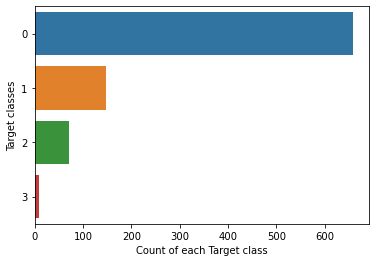

In [16]:
sns.countplot(y=y_train_pagi)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [17]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train_pagi, y_train_pagi)

In [18]:
%%time
y_pred_pagi = modelnb.predict(X_test_pagi)

Wall time: 2 ms


In [19]:
print(classification_report(y_test_pagi, y_pred_pagi))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_pagi, y_pred_pagi)))
print('Precision : {:.4f}'.format(precision_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_pagi, y_pred_pagi, average='weighted')))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       302
           1       0.67      0.85      0.75        46
           2       0.89      0.86      0.87        28
           3       0.56      1.00      0.71         5

    accuracy                           0.92       381
   macro avg       0.77      0.91      0.82       381
weighted avg       0.93      0.92      0.92       381

Accuracy : 0.9186
Precision : 0.9326
Recall : 0.9186
F1-score : 0.9231


In [20]:
nb_pagi = accuracy_score(y_test_pagi, y_pred_pagi)
nb_pagi

0.9186351706036745

In [21]:
ros = RandomOverSampler()
X_train_pagi_ros, y_train_pagi_ros = ros.fit_resample(X_train_pagi, y_train_pagi)
# new class distribution 
print(Counter(y_train_pagi_ros))

Counter({0: 659, 1: 659, 2: 659, 3: 659})


In [22]:
X_train_pagi_ros

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
0         0     4        102        297         65     2.96  4.67     48.75   
1         0     0        627        399         82     0.02  1.07     49.50   
2         0     6        172         93         29     1.53  4.83     40.00   
3         0     4        145        784        128     0.47  6.93     44.50   
4         0     2        384        757         30     0.23  5.13     30.00   
...     ...   ...        ...        ...        ...      ...   ...       ...   
2631      0     1       4232        206        139     0.00  1.71     60.25   
2632      0     2       2672       1823        264     0.01  0.24     42.50   
2633      0     2       2526       2064        291     0.00  0.44     43.00   
2634      0     1       4232        206        139     0.00  1.71     60.25   
2635      0     4       2339       1970        205     0.00  2.51     55.00   

      avgSpeed  lebar_jln  pjg_antrian  
0        34.12       14.0          120  
1        33.75        6.0          410  
2        37.38       12.5           25  
3        28.94       14.0          270  
4        17.59       14.0          400  
...        ...        ...          ...  
2631     11.94       21.0          700  
2632     17.19       21.0          680  
2633     18.88       21.0          680  
2634     11.94       21.0          700  
2635     13.38       21.0          680  

[2636 rows x 11 columns]

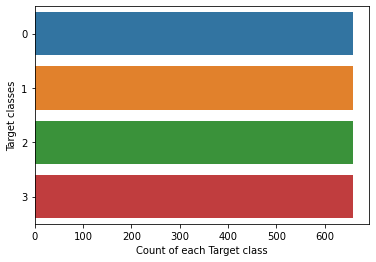

In [23]:
sns.countplot(y=y_train_pagi_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [24]:
modelnb = GaussianNB()
modelnb.fit(X_train_pagi_ros, y_train_pagi_ros)

GaussianNB()

In [25]:
%%time
y_pred_pagi = modelnb.predict(X_test_pagi)

Wall time: 2 ms


In [26]:
print(classification_report(y_test_pagi, y_pred_pagi))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_pagi, y_pred_pagi)))
print('Precision : {:.4f}'.format(precision_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_pagi, y_pred_pagi, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_pagi, y_pred_pagi, average='weighted')))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       302
           1       0.59      0.85      0.70        46
           2       0.89      0.86      0.87        28
           3       0.56      1.00      0.71         5

    accuracy                           0.90       381
   macro avg       0.75      0.90      0.81       381
weighted avg       0.92      0.90      0.91       381

Accuracy : 0.8976
Precision : 0.9224
Recall : 0.8976
F1-score : 0.9052


In [27]:
nb_pagi_ros = accuracy_score(y_test_pagi, y_pred_pagi)
nb_pagi_ros

0.8976377952755905

# SIANG

In [28]:
X_siang = df_siang.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y_siang = df_siang['kemacetan']

In [29]:
X_train_siang, X_test_siang, y_train_siang, y_test_siang = train_test_split(X_siang, y_siang, test_size = 0.30, random_state = 0)

In [30]:
X_train_siang

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
3208      1     4        288        775         67     0.90   2.21     36.25   
1671      1     0        126        895         81     2.24   3.29     64.25   
3592      1     5        253         92        101     3.03   6.30     79.25   
2564      1     6        572        702         66     0.79   2.82     35.00   
1740      1     3        189        470        154     0.58  10.15     49.00   
...     ...   ...        ...        ...        ...      ...    ...       ...   
2369      1     0        546        349         83     0.24   4.05     39.00   
2565      1     2        374        932         52     0.33   2.02     38.75   
3631      1     3        611        279        340     2.01   4.08    124.00   
1801      1     1       1181        857        123     0.03   1.86     52.50   
2144      1     3       1048        883        120     0.17   1.79     40.50   

      avgSpeed  lebar_jln  pjg_antrian  
3208     31.62       14.0          170  
1671     35.19       14.0          410  
3592     57.88        6.0           30  
2564     22.44       12.5          300  
1740     25.44       14.0          400  
...        ...        ...          ...  
2369     31.38       12.5          330  
2565     23.31       14.0          300  
3631    100.88        9.5           30  
1801     29.25       21.0          390  
2144     23.94       14.0          350  

[887 rows x 11 columns]

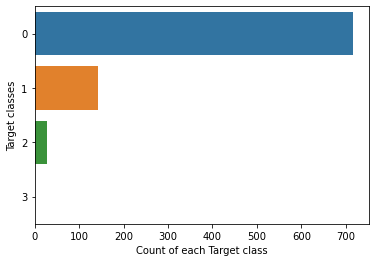

In [31]:
sns.countplot(y=y_train_siang)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [32]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train_siang, y_train_siang)

In [33]:
%%time
y_pred_siang = modelnb.predict(X_test_siang)

Wall time: 2 ms


In [34]:
print(classification_report(y_test_siang, y_pred_siang))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_siang, y_pred_siang)))
print('Precision : {:.4f}'.format(precision_score(y_test_siang, y_pred_siang, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_siang, y_pred_siang, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_siang, y_pred_siang, average='weighted')))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       324
           1       0.58      0.87      0.70        45
           2       0.69      0.75      0.72        12

    accuracy                           0.90       381
   macro avg       0.75      0.84      0.79       381
weighted avg       0.93      0.90      0.91       381

Accuracy : 0.9029
Precision : 0.9268
Recall : 0.9029
F1-score : 0.9104


In [35]:
nb_siang = accuracy_score(y_test_siang, y_pred_siang)
nb_siang

0.9028871391076115

In [36]:
ros = RandomOverSampler()
X_train_siang_ros, y_train_siang_ros = ros.fit_resample(X_train_siang, y_train_siang)
# new class distribution 
print(Counter(y_train_siang_ros))

Counter({0: 717, 1: 717, 2: 717, 3: 717})


In [37]:
X_train_siang_ros

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
0         1     4        288        775         67     0.90   2.21     36.25   
1         1     0        126        895         81     2.24   3.29     64.25   
2         1     5        253         92        101     3.03   6.30     79.25   
3         1     6        572        702         66     0.79   2.82     35.00   
4         1     3        189        470        154     0.58  10.15     49.00   
...     ...   ...        ...        ...        ...      ...    ...       ...   
2863      1     3        436        575        115     0.04   4.80     43.25   
2864      1     3        436        575        115     0.04   4.80     43.25   
2865      1     3        436        575        115     0.04   4.80     43.25   
2866      1     3        436        575        115     0.04   4.80     43.25   
2867      1     3        436        575        115     0.04   4.80     43.25   

      avgSpeed  lebar_jln  pjg_antrian  
0        31.62       14.0          170  
1        35.19       14.0          410  
2        57.88        6.0           30  
3        22.44       12.5          300  
4        25.44       14.0          400  
...        ...        ...          ...  
2863     14.94       22.0          680  
2864     14.94       22.0          680  
2865     14.94       22.0          680  
2866     14.94       22.0          680  
2867     14.94       22.0          680  

[2868 rows x 11 columns]

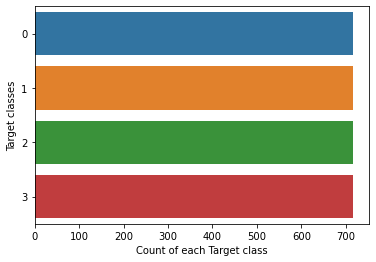

In [38]:
sns.countplot(y=y_train_siang_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [39]:
modelnb = GaussianNB()
modelnb.fit(X_train_siang_ros, y_train_siang_ros)

GaussianNB()

In [40]:
%%time
y_pred_siang = modelnb.predict(X_test_siang)

Wall time: 2 ms


In [41]:
print(classification_report(y_test_siang, y_pred_siang))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_siang, y_pred_siang)))
print('Precision : {:.4f}'.format(precision_score(y_test_siang, y_pred_siang, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_siang, y_pred_siang, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_siang, y_pred_siang, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       324
           1       0.49      0.84      0.62        45
           2       0.69      0.92      0.79        12

    accuracy                           0.88       381
   macro avg       0.72      0.88      0.78       381
weighted avg       0.92      0.88      0.89       381

Accuracy : 0.8766
Precision : 0.9215
Recall : 0.8766
F1-score : 0.8904


In [42]:
nb_siang_ros = accuracy_score(y_test_siang, y_pred_siang)
nb_siang_ros

0.8766404199475065

# SORE

In [43]:
X_sore = df_sore.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y_sore = df_sore['kemacetan']

In [44]:
X_train_sore, X_test_sore, y_train_sore, y_test_sore = train_test_split(X_sore, y_sore, test_size = 0.30, random_state = 0)

In [45]:
X_train_sore

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
3047      2     4        474        226         67     0.73   5.17     36.25   
1322      2     2       1967        660        199     0.30   3.36     37.25   
3571      2     4        510        398        217     0.86   1.87     38.50   
2251      2     0        742        510        135     0.34   2.66     47.50   
1392      2     5        715        824        239     0.69   3.04     39.75   
...     ...   ...        ...        ...        ...      ...    ...       ...   
2022      2     3        832        842        297     0.24   4.63     49.00   
2253      2     1        708        543        155     0.30   1.15     38.25   
3616      2     6        163         77         27     1.90  12.39     40.00   
1443      2     1        342        754         32     0.09   3.82     29.00   
1800      2     0        479       1044        110     0.68   3.22     30.50   

      avgSpeed  lebar_jln  pjg_antrian  
3047     36.44       12.5          210  
1322     22.38        6.0          450  
3571     32.06        9.5           30  
2251     39.94        6.0          340  
1392     20.69       21.0          440  
...        ...        ...          ...  
2022     22.00       21.0          370  
2253     25.94        9.5          340  
3616     35.81       22.0           30  
1443     10.85       14.0          430  
1800     11.38       21.0          390  

[887 rows x 11 columns]

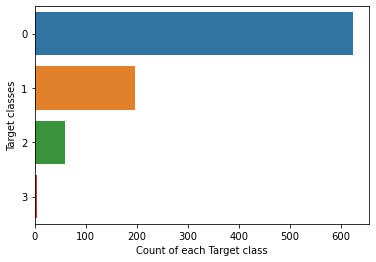

In [46]:
sns.countplot(y=y_train_sore)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [47]:
modelnb = GaussianNB()
nbtrain = modelnb.fit(X_train_sore, y_train_sore)

In [48]:
%%time
y_pred_sore = modelnb.predict(X_test_sore)

Wall time: 1.08 ms


In [49]:
print(classification_report(y_test_sore, y_pred_sore))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_sore, y_pred_sore)))
print('Precision : {:.4f}'.format(precision_score(y_test_sore, y_pred_sore, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_sore, y_pred_sore, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_sore, y_pred_sore, average='weighted')))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       289
           1       0.56      0.80      0.66        65
           2       0.72      0.78      0.75        23
           3       0.00      0.00      0.00         4

    accuracy                           0.84       381
   macro avg       0.56      0.61      0.58       381
weighted avg       0.86      0.84      0.84       381

Accuracy : 0.8373
Precision : 0.8597
Recall : 0.8373
F1-score : 0.8431


In [50]:
nb_sore = accuracy_score(y_test_sore, y_pred_sore)
nb_sore

0.8372703412073491

In [51]:
ros = RandomOverSampler()
X_train_sore_ros, y_train_sore_ros = ros.fit_resample(X_train_sore, y_train_sore)
# new class distribution 
print(Counter(y_train_sore_ros))

Counter({0: 625, 1: 625, 2: 625, 3: 625})


In [52]:
X_train_sore_ros

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
0         2     4        474        226         67     0.73  5.17     36.25   
1         2     2       1967        660        199     0.30  3.36     37.25   
2         2     4        510        398        217     0.86  1.87     38.50   
3         2     0        742        510        135     0.34  2.66     47.50   
4         2     5        715        824        239     0.69  3.04     39.75   
...     ...   ...        ...        ...        ...      ...   ...       ...   
2495      2     1        579        313         89     0.08  6.23     29.25   
2496      2     1        579        313         89     0.08  6.23     29.25   
2497      2     1        579        313         89     0.08  6.23     29.25   
2498      2     3        395        323        157     0.03  6.34     40.75   
2499      2     4        495        434        215     0.25  3.34     43.50   

      avgSpeed  lebar_jln  pjg_antrian  
0        36.44       12.5          210  
1        22.38        6.0          450  
2        32.06        9.5           30  
3        39.94        6.0          340  
4        20.69       21.0          440  
...        ...        ...          ...  
2495     14.34       21.0          680  
2496     14.34       21.0          680  
2497     14.34       21.0          680  
2498     22.50       12.5          680  
2499     22.75       22.0          680  

[2500 rows x 11 columns]

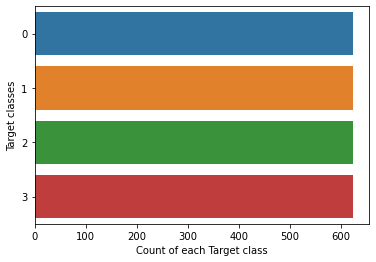

In [53]:
sns.countplot(y=y_train_sore_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [54]:
modelnb = GaussianNB()
modelnb.fit(X_train_sore_ros, y_train_sore_ros)

GaussianNB()

In [55]:
%%time
y_pred_sore = modelnb.predict(X_test_sore)

Wall time: 2 ms


In [56]:
print(classification_report(y_test_sore, y_pred_sore))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test_sore, y_pred_sore)))
print('Precision : {:.4f}'.format(precision_score(y_test_sore, y_pred_sore, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test_sore, y_pred_sore, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test_sore, y_pred_sore, average='weighted')))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       289
           1       0.48      0.78      0.60        65
           2       0.67      0.78      0.72        23
           3       0.00      0.00      0.00         4

    accuracy                           0.80       381
   macro avg       0.53      0.60      0.55       381
weighted avg       0.85      0.80      0.81       381

Accuracy : 0.8005
Precision : 0.8471
Recall : 0.8005
F1-score : 0.8132


In [57]:
nb_sore_ros = accuracy_score(y_test_sore, y_pred_sore)
nb_sore_ros

0.800524934383202

# Combine PAGI SIANG SORE

In [58]:
X_akhir = df.copy()
y_akhir = df['kemacetan']

In [59]:
# melakukan split data menjadi 70% data train : 30% data test
X_train_akhir, X_test_akhir, y_train_akhir, y_test_akhir = train_test_split(X_akhir, y_akhir, test_size = 0.30, random_state = 0)

In [60]:
X = df.drop(['nama_jalan','lajur','Latitude','Longtitude','tanggal','jumlah','occupancy','kemacetan'],axis=1)
y = df['kemacetan']

In [61]:
# melakukan split data menjadi 70% data train : 30% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [62]:
X_train

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
3782      0     2        451        301         78     4.01  4.57    135.50   
529       2     1       1400       2517        208     0.00  0.61     43.75   
2480      2     0        631        204         57     0.43  2.34     39.50   
1888      1     1        541        276         12     0.44  3.12     75.75   
2075      2     3        315        823        303     0.99  4.56     44.00   
...     ...   ...        ...        ...        ...      ...   ...       ...   
835       1     6        418       1085         71     0.23  2.61     49.50   
3264      2     1        475        207         76     1.94  4.44     39.50   
1653      1     6        502        758        184     0.11  4.92     36.50   
2607      0     2        951        818        456     0.19  1.63    127.00   
2732      0     6        221        342         40     2.37  4.78     36.75   

      avgSpeed  lebar_jln  pjg_antrian  
3782    136.81       14.0           10  
529      17.75       14.0          540  
2480     28.94       12.5          310  
1888     53.56       14.0          380  
2075     13.88        7.2          360  
...        ...        ...          ...  
835      25.69       14.0          500  
3264     32.31       12.5          160  
1653     19.75        6.0          410  
2607     59.62        9.5          290  
2732     18.62       14.0          270  

[2662 rows x 11 columns]

In [63]:
X_train_akhir

nama_jalan  Latitude  Longtitude        lajur  waktu  hari  \
3782  SP. PASIR KALIKI -6.900525  107.597353   BELOK KIRI      0     2   
529        SP. PASTEUR -6.892134  107.581117  LURUS KANAN      2     1   
2480        SP. M TOHA -6.948332  107.609386   BELOK KIRI      2     0   
1888  SP. ISTANA PLAZA -6.906442  107.597545   Belok kiri      1     1   
2075     SP. GEDE BAGE -6.937128  107.692583  Lurus kanan      2     3   
...                ...       ...         ...          ...    ...   ...   
835   SP. ISTANA PLAZA -6.906442  107.597545   LURUS KIRI      1     6   
3264        SP. M TOHA -6.948332  107.609386   BELOK KIRI      2     1   
1653  SP. UJUNG BERUNG -6.914068  107.699412  Lurus kanan      1     6   
2607      SP. CIBEREUM -6.917224  107.574382        LURUS      0     2   
2732  SP. PASIR KALIKI -6.900525  107.597353  Lurus kanan      0     6   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
3782  13-04-2022 07:00        451        301         78     830     4.01   
529   05-04-2022 16:00       1400       2517        208    4125     0.00   
2480  18-04-2022 16:00        631        204         57     892     0.43   
1888  19-04-2022 12:00        541        276         12     829     0.44   
2075  21-04-2022 16:00        315        823        303    1441     0.99   
...                ...        ...        ...        ...     ...      ...   
835   17-04-2022 12:00        418       1085         71    1574     0.23   
3264  05-04-2022 16:00        475        207         76     758     1.94   
1653  24-04-2022 07:00        502        758        184    1444     0.11   
2607  27-04-2022 07:00        951        818        456    2225     0.19   
2732  24-04-2022 16:00        221        342         40     603     2.37   

       gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
3782  4.57    135.50    136.81       1.77       14.0           10          0  
529   0.61     43.75     17.75      64.79       14.0          540          1  
2480  2.34     39.50     28.94      41.28       12.5          310          0  
1888  3.12     75.75     53.56      48.72       14.0          380          0  
2075  4.56     44.00     13.88      46.46        7.2          360          0  
...    ...       ...       ...        ...        ...          ...        ...  
835   2.61     49.50     25.69      60.72       14.0          500          1  
3264  4.44     39.50     32.31      26.04       12.5          160          0  
1653  4.92     36.50     19.75      51.31        6.0          410          0  
2607  1.63    127.00     59.62      39.23        9.5          290          0  
2732  4.78     36.75     18.62      37.58       14.0          270          0  

[2662 rows x 19 columns]

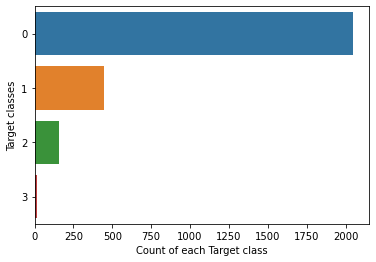

In [64]:
sns.countplot(y=y_train)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [65]:
X_test

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
2808      0     0        873        853        136     0.81   3.94     44.50   
2377      2     5        597        922         97     0.43   1.56     53.75   
796       2     6        525       1066         81     0.14   1.40     42.50   
3414      2     1       1048        270        362     0.56   1.80    108.75   
2356      2     0        611        915         53     0.13   1.98     41.25   
...     ...   ...        ...        ...        ...      ...    ...       ...   
1110      0     4        327        154         29     0.44   7.76     54.25   
3771      1     4        169         60         78     3.96  10.66     79.25   
2373      2     5        697        197         16     0.75   1.68     37.50   
1642      2     4        921        797        181     0.03   2.31     36.75   
1571      1     1        385        867        563     5.24   8.11     31.00   

      avgSpeed  lebar_jln  pjg_antrian  
2808     22.25        7.2          260  
2377     32.19       14.0          320  
796      19.81       21.0          510  
3414     92.50        9.5          100  
2356     26.62       14.0          330  
...        ...        ...          ...  
1110     21.25       21.0          470  
3771     58.62        6.0           15  
2373     31.00       14.0          320  
1642     16.56       12.5          410  
1571     15.75       21.0          420  

[1142 rows x 11 columns]

In [66]:
X_test_akhir

nama_jalan  Latitude  Longtitude        lajur  waktu  hari  \
2808     SP. GEDE BAGE -6.937128  107.692583  LURUS KANAN      0     0   
2377  SP. ISTANA PLAZA -6.906442  107.597545   Lurus kiri      2     5   
796      SP. BUAH BATU -6.947987  107.633434  LURUS KANAN      2     6   
3414      SP. CIBEREUM -6.917224  107.574382   BELOK KIRI      2     1   
2356  SP. PASIR KALIKI -6.900525  107.597353  LURUS KANAN      2     0   
...                ...       ...         ...          ...    ...   ...   
1110     SP. BUAH BATU -6.947987  107.633434  Lurus kanan      0     4   
3771  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI      1     4   
2373  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI      2     5   
1642        SP. M TOHA -6.948332  107.609386  LURUS KANAN      2     4   
1571        SP. SAMSAT -6.945438  107.641889  BELOK KANAN      1     1   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
2808  18-04-2022 07:00        873        853        136    1862     0.81   
2377  23-04-2022 16:00        597        922         97    1616     0.43   
796   17-04-2022 16:00        525       1066         81    1672     0.14   
3414  05-04-2022 16:00       1048        270        362    1680     0.56   
2356  25-04-2022 16:00        611        915         53    1579     0.13   
...                ...        ...        ...        ...     ...      ...   
1110  22-04-2022 07:00        327        154         29     510     0.44   
3771  29-04-2022 12:00        169         60         78     307     3.96   
2373  02-04-2022 16:00        697        197         16     910     0.75   
1642  08-04-2022 16:00        921        797        181    1899     0.03   
1571  12-04-2022 12:00        385        867        563    1815     5.24   

        gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
2808   3.94     44.50     22.25      36.16        7.2          260          0  
2377   1.56     53.75     32.19      42.73       14.0          320          0  
796    1.40     42.50     19.81      61.15       21.0          510          1  
3414   1.80    108.75     92.50      19.98        9.5          100          0  
2356   1.98     41.25     26.62      42.89       14.0          330          0  
...     ...       ...       ...        ...        ...          ...        ...  
1110   7.76     54.25     21.25      57.45       21.0          470          0  
3771  10.66     79.25     58.62       2.65        6.0           15          0  
2373   1.68     37.50     31.00      42.77       14.0          320          0  
1642   2.31     36.75     16.56      51.41       12.5          410          0  
1571   8.11     31.00     15.75      52.42       21.0          420          0  

[1142 rows x 19 columns]

# Naive Bayes Classification

In [67]:
modelnb = GaussianNB()
modelnb.fit(X_train, y_train)

GaussianNB()

In [68]:
%%time
y_pred = modelnb.predict(X_test)

Wall time: 3 ms


In [69]:
print(classification_report(y_test, y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92       866
           1       0.61      0.94      0.74       198
           2       0.92      0.82      0.87        67
           3       0.60      0.82      0.69        11

    accuracy                           0.88      1142
   macro avg       0.78      0.86      0.81      1142
weighted avg       0.91      0.88      0.89      1142

Accuracy : 0.8774
Precision : 0.9130
Recall : 0.8774
F1-score : 0.8861


In [70]:
nb_combine = accuracy_score(y_test, y_pred)
nb_combine

0.8774080560420315

# OverSampling

In [71]:
ros = RandomOverSampler()
X_train_akhir_ros, y_train_akhir_ros = ros.fit_resample(X_train_akhir, y_train_akhir)
# new class distribution 
print(Counter(y_train_akhir_ros))

Counter({0: 2050, 1: 2050, 2: 2050, 3: 2050})


In [72]:
# Inisiasi random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
# new class distribution 
print(Counter(y_train_ros))

Counter({0: 2050, 1: 2050, 2: 2050, 3: 2050})


In [73]:
X_train_ros

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
0         0     2        451        301         78     4.01   4.57    135.50   
1         2     1       1400       2517        208     0.00   0.61     43.75   
2         2     0        631        204         57     0.43   2.34     39.50   
3         1     1        541        276         12     0.44   3.12     75.75   
4         2     3        315        823        303     0.99   4.56     44.00   
...     ...   ...        ...        ...        ...      ...    ...       ...   
8195      2     3        479        292         53     0.37  10.28     47.50   
8196      0     3       2321       2119        178     0.02   1.79     56.50   
8197      2     1        579        313         89     0.08   6.23     29.25   
8198      2     3        395        323        157     0.03   6.34     40.75   
8199      0     3       2191       1885        179     0.00   0.95     44.50   

      avgSpeed  lebar_jln  pjg_antrian  
0       136.81       14.0           10  
1        17.75       14.0          540  
2        28.94       12.5          310  
3        53.56       14.0          380  
4        13.88        7.2          360  
...        ...        ...          ...  
8195     21.31       21.0          700  
8196     15.75       21.0          680  
8197     14.34       21.0          680  
8198     22.50       12.5          680  
8199     15.88       21.0          680  

[8200 rows x 11 columns]

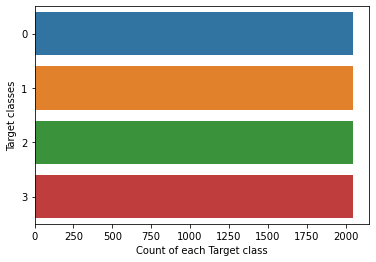

In [74]:
sns.countplot(y=y_train_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [75]:
modelnb = GaussianNB()
modelnb.fit(X_train_ros, y_train_ros)

GaussianNB()

In [76]:
%%time
y_pred = modelnb.predict(X_test)

Wall time: 999 µs


In [77]:
print(classification_report(y_test, y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91       866
           1       0.56      0.94      0.70       198
           2       0.86      0.85      0.86        67
           3       0.62      0.91      0.74        11

    accuracy                           0.85      1142
   macro avg       0.76      0.88      0.80      1142
weighted avg       0.91      0.85      0.87      1142

Accuracy : 0.8546
Precision : 0.9062
Recall : 0.8546
F1-score : 0.8668


In [78]:
nb_combine_oversampling = accuracy_score(y_test, y_pred)
nb_combine_oversampling

0.8546409807355516

# Hyperparameter Tuning

In [79]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [80]:
np.logspace(0,-9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [81]:
# mencari parameter terbaik
gs_NB = GridSearchCV(estimator=modelnb, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=10, 
                     scoring='accuracy')
gs_NB.fit(X_train_ros,y_train_ros)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START var_smoothing=1.0........................................
[CV 1/10; 1/100] END .........var_smoothing=1.0;, score=0.370 total time=   0.0s
[CV 2/10; 1/100] START var_smoothing=1.0........................................
[CV 2/10; 1/100] END .........var_smoothing=1.0;, score=0.376 total time=   0.0s
[CV 3/10; 1/100] START var_smoothing=1.0........................................
[CV 3/10; 1/100] END .........var_smoothing=1.0;, score=0.377 total time=   0.0s
[CV 4/10; 1/100] START var_smoothing=1.0........................................
[CV 4/10; 1/100] END .........var_smoothing=1.0;, score=0.348 total time=   0.0s
[CV 5/10; 1/100] START var_smoothing=1.0........................................
[CV 5/10; 1/100] END .........var_smoothing=1.0;, score=0.348 total time=   0.0s
[CV 6/10; 1/100] START var_smoothing=1.0........................................
[CV 6/10; 1/100] END .........var_smoothing=

[CV 5/10; 6/100] END var_smoothing=0.3511191734215131;, score=0.355 total time=   0.0s
[CV 6/10; 6/100] START var_smoothing=0.3511191734215131.........................
[CV 6/10; 6/100] END var_smoothing=0.3511191734215131;, score=0.360 total time=   0.0s
[CV 7/10; 6/100] START var_smoothing=0.3511191734215131.........................
[CV 7/10; 6/100] END var_smoothing=0.3511191734215131;, score=0.365 total time=   0.0s
[CV 8/10; 6/100] START var_smoothing=0.3511191734215131.........................
[CV 8/10; 6/100] END var_smoothing=0.3511191734215131;, score=0.379 total time=   0.0s
[CV 9/10; 6/100] START var_smoothing=0.3511191734215131.........................
[CV 9/10; 6/100] END var_smoothing=0.3511191734215131;, score=0.382 total time=   0.0s
[CV 10/10; 6/100] START var_smoothing=0.3511191734215131........................
[CV 10/10; 6/100] END var_smoothing=0.3511191734215131;, score=0.380 total time=   0.0s
[CV 1/10; 7/100] START var_smoothing=0.2848035868435802.................

[CV 5/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.549 total time=   0.0s
[CV 6/10; 11/100] START var_smoothing=0.12328467394420659.......................
[CV 6/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.559 total time=   0.0s
[CV 7/10; 11/100] START var_smoothing=0.12328467394420659.......................
[CV 7/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.557 total time=   0.0s
[CV 8/10; 11/100] START var_smoothing=0.12328467394420659.......................
[CV 8/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.551 total time=   0.0s
[CV 9/10; 11/100] START var_smoothing=0.12328467394420659.......................
[CV 9/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.570 total time=   0.0s
[CV 10/10; 11/100] START var_smoothing=0.12328467394420659......................
[CV 10/10; 11/100] END var_smoothing=0.12328467394420659;, score=0.570 total time=   0.0s
[CV 1/10; 12/100] START var_smoothing=0.1...................

[CV 4/10; 17/100] END var_smoothing=0.03511191734215131;, score=0.624 total time=   0.0s
[CV 5/10; 17/100] START var_smoothing=0.03511191734215131.......................
[CV 5/10; 17/100] END var_smoothing=0.03511191734215131;, score=0.632 total time=   0.0s
[CV 6/10; 17/100] START var_smoothing=0.03511191734215131.......................
[CV 6/10; 17/100] END var_smoothing=0.03511191734215131;, score=0.633 total time=   0.0s
[CV 7/10; 17/100] START var_smoothing=0.03511191734215131.......................
[CV 7/10; 17/100] END var_smoothing=0.03511191734215131;, score=0.646 total time=   0.0s
[CV 8/10; 17/100] START var_smoothing=0.03511191734215131.......................
[CV 8/10; 17/100] END var_smoothing=0.03511191734215131;, score=0.632 total time=   0.0s
[CV 9/10; 17/100] START var_smoothing=0.03511191734215131.......................
[CV 9/10; 17/100] END var_smoothing=0.03511191734215131;, score=0.634 total time=   0.0s
[CV 10/10; 17/100] START var_smoothing=0.03511191734215131...

[CV 7/10; 22/100] END var_smoothing=0.012328467394420659;, score=0.685 total time=   0.0s
[CV 8/10; 22/100] START var_smoothing=0.012328467394420659......................
[CV 8/10; 22/100] END var_smoothing=0.012328467394420659;, score=0.654 total time=   0.0s
[CV 9/10; 22/100] START var_smoothing=0.012328467394420659......................
[CV 9/10; 22/100] END var_smoothing=0.012328467394420659;, score=0.661 total time=   0.0s
[CV 10/10; 22/100] START var_smoothing=0.012328467394420659.....................
[CV 10/10; 22/100] END var_smoothing=0.012328467394420659;, score=0.682 total time=   0.0s
[CV 1/10; 23/100] START var_smoothing=0.01......................................
[CV 1/10; 23/100] END .......var_smoothing=0.01;, score=0.661 total time=   0.0s
[CV 2/10; 23/100] START var_smoothing=0.01......................................
[CV 2/10; 23/100] END .......var_smoothing=0.01;, score=0.685 total time=   0.0s
[CV 3/10; 23/100] START var_smoothing=0.01..............................

[CV 6/10; 28/100] END var_smoothing=0.003511191734215131;, score=0.810 total time=   0.0s
[CV 7/10; 28/100] START var_smoothing=0.003511191734215131......................
[CV 7/10; 28/100] END var_smoothing=0.003511191734215131;, score=0.827 total time=   0.0s
[CV 8/10; 28/100] START var_smoothing=0.003511191734215131......................
[CV 8/10; 28/100] END var_smoothing=0.003511191734215131;, score=0.823 total time=   0.0s
[CV 9/10; 28/100] START var_smoothing=0.003511191734215131......................
[CV 9/10; 28/100] END var_smoothing=0.003511191734215131;, score=0.793 total time=   0.0s
[CV 10/10; 28/100] START var_smoothing=0.003511191734215131.....................
[CV 10/10; 28/100] END var_smoothing=0.003511191734215131;, score=0.834 total time=   0.0s
[CV 1/10; 29/100] START var_smoothing=0.002848035868435802......................
[CV 1/10; 29/100] END var_smoothing=0.002848035868435802;, score=0.820 total time=   0.0s
[CV 2/10; 29/100] START var_smoothing=0.00284803586843

[CV 1/10; 34/100] END ......var_smoothing=0.001;, score=0.894 total time=   0.0s
[CV 2/10; 34/100] START var_smoothing=0.001.....................................
[CV 2/10; 34/100] END ......var_smoothing=0.001;, score=0.894 total time=   0.0s
[CV 3/10; 34/100] START var_smoothing=0.001.....................................
[CV 3/10; 34/100] END ......var_smoothing=0.001;, score=0.884 total time=   0.0s
[CV 4/10; 34/100] START var_smoothing=0.001.....................................
[CV 4/10; 34/100] END ......var_smoothing=0.001;, score=0.890 total time=   0.0s
[CV 5/10; 34/100] START var_smoothing=0.001.....................................
[CV 5/10; 34/100] END ......var_smoothing=0.001;, score=0.910 total time=   0.0s
[CV 6/10; 34/100] START var_smoothing=0.001.....................................
[CV 6/10; 34/100] END ......var_smoothing=0.001;, score=0.899 total time=   0.0s
[CV 7/10; 34/100] START var_smoothing=0.001.....................................
[CV 7/10; 34/100] END ......

[CV 4/10; 40/100] END var_smoothing=0.0002848035868435802;, score=0.910 total time=   0.0s
[CV 5/10; 40/100] START var_smoothing=0.0002848035868435802.....................
[CV 5/10; 40/100] END var_smoothing=0.0002848035868435802;, score=0.923 total time=   0.0s
[CV 6/10; 40/100] START var_smoothing=0.0002848035868435802.....................
[CV 6/10; 40/100] END var_smoothing=0.0002848035868435802;, score=0.917 total time=   0.0s
[CV 7/10; 40/100] START var_smoothing=0.0002848035868435802.....................
[CV 7/10; 40/100] END var_smoothing=0.0002848035868435802;, score=0.941 total time=   0.0s
[CV 8/10; 40/100] START var_smoothing=0.0002848035868435802.....................
[CV 8/10; 40/100] END var_smoothing=0.0002848035868435802;, score=0.917 total time=   0.0s
[CV 9/10; 40/100] START var_smoothing=0.0002848035868435802.....................
[CV 9/10; 40/100] END var_smoothing=0.0002848035868435802;, score=0.899 total time=   0.0s
[CV 10/10; 40/100] START var_smoothing=0.00028480

[CV 8/10; 45/100] END .....var_smoothing=0.0001;, score=0.915 total time=   0.0s
[CV 9/10; 45/100] START var_smoothing=0.0001....................................
[CV 9/10; 45/100] END .....var_smoothing=0.0001;, score=0.895 total time=   0.0s
[CV 10/10; 45/100] START var_smoothing=0.0001...................................
[CV 10/10; 45/100] END ....var_smoothing=0.0001;, score=0.916 total time=   0.0s
[CV 1/10; 46/100] START var_smoothing=8.111308307896872e-05.....................
[CV 1/10; 46/100] END var_smoothing=8.111308307896872e-05;, score=0.901 total time=   0.0s
[CV 2/10; 46/100] START var_smoothing=8.111308307896872e-05.....................
[CV 2/10; 46/100] END var_smoothing=8.111308307896872e-05;, score=0.907 total time=   0.0s
[CV 3/10; 46/100] START var_smoothing=8.111308307896872e-05.....................
[CV 3/10; 46/100] END var_smoothing=8.111308307896872e-05;, score=0.896 total time=   0.0s
[CV 4/10; 46/100] START var_smoothing=8.111308307896872e-05....................

[CV 10/10; 51/100] END var_smoothing=2.848035868435799e-05;, score=0.907 total time=   0.0s
[CV 1/10; 52/100] START var_smoothing=2.310129700083158e-05.....................
[CV 1/10; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.901 total time=   0.0s
[CV 2/10; 52/100] START var_smoothing=2.310129700083158e-05.....................
[CV 2/10; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.905 total time=   0.0s
[CV 3/10; 52/100] START var_smoothing=2.310129700083158e-05.....................
[CV 3/10; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.899 total time=   0.0s
[CV 4/10; 52/100] START var_smoothing=2.310129700083158e-05.....................
[CV 4/10; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.907 total time=   0.0s
[CV 5/10; 52/100] START var_smoothing=2.310129700083158e-05.....................
[CV 5/10; 52/100] END var_smoothing=2.310129700083158e-05;, score=0.912 total time=   0.0s
[CV 6/10; 52/100] START var_smoothing=2.31012970

[CV 6/10; 57/100] END var_smoothing=8.111308307896873e-06;, score=0.894 total time=   0.0s
[CV 7/10; 57/100] START var_smoothing=8.111308307896873e-06.....................
[CV 7/10; 57/100] END var_smoothing=8.111308307896873e-06;, score=0.923 total time=   0.0s
[CV 8/10; 57/100] START var_smoothing=8.111308307896873e-06.....................
[CV 8/10; 57/100] END var_smoothing=8.111308307896873e-06;, score=0.883 total time=   0.0s
[CV 9/10; 57/100] START var_smoothing=8.111308307896873e-06.....................
[CV 9/10; 57/100] END var_smoothing=8.111308307896873e-06;, score=0.854 total time=   0.0s
[CV 10/10; 57/100] START var_smoothing=8.111308307896873e-06....................
[CV 10/10; 57/100] END var_smoothing=8.111308307896873e-06;, score=0.888 total time=   0.0s
[CV 1/10; 58/100] START var_smoothing=6.579332246575683e-06.....................
[CV 1/10; 58/100] END var_smoothing=6.579332246575683e-06;, score=0.873 total time=   0.0s
[CV 2/10; 58/100] START var_smoothing=6.57933224

[CV 1/10; 63/100] END var_smoothing=2.310129700083158e-06;, score=0.878 total time=   0.0s
[CV 2/10; 63/100] START var_smoothing=2.310129700083158e-06.....................
[CV 2/10; 63/100] END var_smoothing=2.310129700083158e-06;, score=0.890 total time=   0.0s
[CV 3/10; 63/100] START var_smoothing=2.310129700083158e-06.....................
[CV 3/10; 63/100] END var_smoothing=2.310129700083158e-06;, score=0.888 total time=   0.0s
[CV 4/10; 63/100] START var_smoothing=2.310129700083158e-06.....................
[CV 4/10; 63/100] END var_smoothing=2.310129700083158e-06;, score=0.891 total time=   0.0s
[CV 5/10; 63/100] START var_smoothing=2.310129700083158e-06.....................
[CV 5/10; 63/100] END var_smoothing=2.310129700083158e-06;, score=0.901 total time=   0.0s
[CV 6/10; 63/100] START var_smoothing=2.310129700083158e-06.....................
[CV 6/10; 63/100] END var_smoothing=2.310129700083158e-06;, score=0.895 total time=   0.0s
[CV 7/10; 63/100] START var_smoothing=2.310129700

[CV 2/10; 68/100] END var_smoothing=8.111308307896872e-07;, score=0.889 total time=   0.0s
[CV 3/10; 68/100] START var_smoothing=8.111308307896872e-07.....................
[CV 3/10; 68/100] END var_smoothing=8.111308307896872e-07;, score=0.887 total time=   0.0s
[CV 4/10; 68/100] START var_smoothing=8.111308307896872e-07.....................
[CV 4/10; 68/100] END var_smoothing=8.111308307896872e-07;, score=0.889 total time=   0.0s
[CV 5/10; 68/100] START var_smoothing=8.111308307896872e-07.....................
[CV 5/10; 68/100] END var_smoothing=8.111308307896872e-07;, score=0.899 total time=   0.0s
[CV 6/10; 68/100] START var_smoothing=8.111308307896872e-07.....................
[CV 6/10; 68/100] END var_smoothing=8.111308307896872e-07;, score=0.891 total time=   0.0s
[CV 7/10; 68/100] START var_smoothing=8.111308307896872e-07.....................
[CV 7/10; 68/100] END var_smoothing=8.111308307896872e-07;, score=0.916 total time=   0.0s
[CV 8/10; 68/100] START var_smoothing=8.111308307

[CV 2/10; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.884 total time=   0.0s
[CV 3/10; 74/100] START var_smoothing=2.310129700083158e-07.....................
[CV 3/10; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.879 total time=   0.0s
[CV 4/10; 74/100] START var_smoothing=2.310129700083158e-07.....................
[CV 4/10; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.882 total time=   0.0s
[CV 5/10; 74/100] START var_smoothing=2.310129700083158e-07.....................
[CV 5/10; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.890 total time=   0.0s
[CV 6/10; 74/100] START var_smoothing=2.310129700083158e-07.....................
[CV 6/10; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.883 total time=   0.0s
[CV 7/10; 74/100] START var_smoothing=2.310129700083158e-07.....................
[CV 7/10; 74/100] END var_smoothing=2.310129700083158e-07;, score=0.904 total time=   0.0s
[CV 8/10; 74/100] START var_smoothing=2.310129700

[CV 5/10; 79/100] END var_smoothing=8.111308307896873e-08;, score=0.885 total time=   0.0s
[CV 6/10; 79/100] START var_smoothing=8.111308307896873e-08.....................
[CV 6/10; 79/100] END var_smoothing=8.111308307896873e-08;, score=0.883 total time=   0.0s
[CV 7/10; 79/100] START var_smoothing=8.111308307896873e-08.....................
[CV 7/10; 79/100] END var_smoothing=8.111308307896873e-08;, score=0.904 total time=   0.0s
[CV 8/10; 79/100] START var_smoothing=8.111308307896873e-08.....................
[CV 8/10; 79/100] END var_smoothing=8.111308307896873e-08;, score=0.870 total time=   0.0s
[CV 9/10; 79/100] START var_smoothing=8.111308307896873e-08.....................
[CV 9/10; 79/100] END var_smoothing=8.111308307896873e-08;, score=0.857 total time=   0.0s
[CV 10/10; 79/100] START var_smoothing=8.111308307896873e-08....................
[CV 10/10; 79/100] END var_smoothing=8.111308307896873e-08;, score=0.883 total time=   0.0s
[CV 1/10; 80/100] START var_smoothing=6.57933224

[CV 3/10; 85/100] END var_smoothing=2.310129700083158e-08;, score=0.871 total time=   0.0s
[CV 4/10; 85/100] START var_smoothing=2.310129700083158e-08.....................
[CV 4/10; 85/100] END var_smoothing=2.310129700083158e-08;, score=0.882 total time=   0.0s
[CV 5/10; 85/100] START var_smoothing=2.310129700083158e-08.....................
[CV 5/10; 85/100] END var_smoothing=2.310129700083158e-08;, score=0.885 total time=   0.0s
[CV 6/10; 85/100] START var_smoothing=2.310129700083158e-08.....................
[CV 6/10; 85/100] END var_smoothing=2.310129700083158e-08;, score=0.882 total time=   0.0s
[CV 7/10; 85/100] START var_smoothing=2.310129700083158e-08.....................
[CV 7/10; 85/100] END var_smoothing=2.310129700083158e-08;, score=0.904 total time=   0.0s
[CV 8/10; 85/100] START var_smoothing=2.310129700083158e-08.....................
[CV 8/10; 85/100] END var_smoothing=2.310129700083158e-08;, score=0.868 total time=   0.0s
[CV 9/10; 85/100] START var_smoothing=2.310129700

[CV 5/10; 90/100] END var_smoothing=8.111308307896856e-09;, score=0.888 total time=   0.0s
[CV 6/10; 90/100] START var_smoothing=8.111308307896856e-09.....................
[CV 6/10; 90/100] END var_smoothing=8.111308307896856e-09;, score=0.884 total time=   0.0s
[CV 7/10; 90/100] START var_smoothing=8.111308307896856e-09.....................
[CV 7/10; 90/100] END var_smoothing=8.111308307896856e-09;, score=0.907 total time=   0.0s
[CV 8/10; 90/100] START var_smoothing=8.111308307896856e-09.....................
[CV 8/10; 90/100] END var_smoothing=8.111308307896856e-09;, score=0.870 total time=   0.0s
[CV 9/10; 90/100] START var_smoothing=8.111308307896856e-09.....................
[CV 9/10; 90/100] END var_smoothing=8.111308307896856e-09;, score=0.859 total time=   0.0s
[CV 10/10; 90/100] START var_smoothing=8.111308307896856e-09....................
[CV 10/10; 90/100] END var_smoothing=8.111308307896856e-09;, score=0.884 total time=   0.0s
[CV 1/10; 91/100] START var_smoothing=6.57933224

[CV 1/10; 96/100] END var_smoothing=2.310129700083158e-09;, score=0.872 total time=   0.0s
[CV 2/10; 96/100] START var_smoothing=2.310129700083158e-09.....................
[CV 2/10; 96/100] END var_smoothing=2.310129700083158e-09;, score=0.887 total time=   0.0s
[CV 3/10; 96/100] START var_smoothing=2.310129700083158e-09.....................
[CV 3/10; 96/100] END var_smoothing=2.310129700083158e-09;, score=0.872 total time=   0.0s
[CV 4/10; 96/100] START var_smoothing=2.310129700083158e-09.....................
[CV 4/10; 96/100] END var_smoothing=2.310129700083158e-09;, score=0.884 total time=   0.0s
[CV 5/10; 96/100] START var_smoothing=2.310129700083158e-09.....................
[CV 5/10; 96/100] END var_smoothing=2.310129700083158e-09;, score=0.888 total time=   0.0s
[CV 6/10; 96/100] START var_smoothing=2.310129700083158e-09.....................
[CV 6/10; 96/100] END var_smoothing=2.310129700083158e-09;, score=0.884 total time=   0.0s
[CV 7/10; 96/100] START var_smoothing=2.310129700

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=10)

In [82]:
# melihat parameter terbaik dan skor terbaik
print(gs_NB.best_estimator_)
print(gs_NB.best_score_)

GaussianNB(var_smoothing=0.0002848035868435802)
0.9146341463414634


In [83]:
%%time
y_predht = gs_NB.predict(X_test)

Wall time: 1.96 ms


In [84]:
# hasil pengujian menggunakan data test setelah menggunakan parameter terbaik
print(classification_report(y_test, y_predht))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_predht)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_predht, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_predht, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_predht, average='weighted')))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       866
           1       0.64      0.94      0.76       198
           2       0.85      0.79      0.82        67
           3       0.46      1.00      0.63        11

    accuracy                           0.89      1142
   macro avg       0.74      0.90      0.79      1142
weighted avg       0.92      0.89      0.89      1142

Accuracy : 0.8862
Precision : 0.9216
Recall : 0.8862
F1-score : 0.8948


In [85]:
nb_combine_tune = accuracy_score(y_test, y_predht)
nb_combine_tune

0.8861646234676007

In [86]:
X_test_akhir['kemacetan'] = y_predht
X_test_akhir

nama_jalan  Latitude  Longtitude        lajur  waktu  hari  \
2808     SP. GEDE BAGE -6.937128  107.692583  LURUS KANAN      0     0   
2377  SP. ISTANA PLAZA -6.906442  107.597545   Lurus kiri      2     5   
796      SP. BUAH BATU -6.947987  107.633434  LURUS KANAN      2     6   
3414      SP. CIBEREUM -6.917224  107.574382   BELOK KIRI      2     1   
2356  SP. PASIR KALIKI -6.900525  107.597353  LURUS KANAN      2     0   
...                ...       ...         ...          ...    ...   ...   
1110     SP. BUAH BATU -6.947987  107.633434  Lurus kanan      0     4   
3771  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI      1     4   
2373  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI      2     5   
1642        SP. M TOHA -6.948332  107.609386  LURUS KANAN      2     4   
1571        SP. SAMSAT -6.945438  107.641889  BELOK KANAN      1     1   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
2808  18-04-2022 07:00        873        853        136    1862     0.81   
2377  23-04-2022 16:00        597        922         97    1616     0.43   
796   17-04-2022 16:00        525       1066         81    1672     0.14   
3414  05-04-2022 16:00       1048        270        362    1680     0.56   
2356  25-04-2022 16:00        611        915         53    1579     0.13   
...                ...        ...        ...        ...     ...      ...   
1110  22-04-2022 07:00        327        154         29     510     0.44   
3771  29-04-2022 12:00        169         60         78     307     3.96   
2373  02-04-2022 16:00        697        197         16     910     0.75   
1642  08-04-2022 16:00        921        797        181    1899     0.03   
1571  12-04-2022 12:00        385        867        563    1815     5.24   

        gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
2808   3.94     44.50     22.25      36.16        7.2          260          0  
2377   1.56     53.75     32.19      42.73       14.0          320          0  
796    1.40     42.50     19.81      61.15       21.0          510          1  
3414   1.80    108.75     92.50      19.98        9.5          100          0  
2356   1.98     41.25     26.62      42.89       14.0          330          0  
...     ...       ...       ...        ...        ...          ...        ...  
1110   7.76     54.25     21.25      57.45       21.0          470          1  
3771  10.66     79.25     58.62       2.65        6.0           15          0  
2373   1.68     37.50     31.00      42.77       14.0          320          0  
1642   2.31     36.75     16.56      51.41       12.5          410          0  
1571   8.11     31.00     15.75      52.42       21.0          420          0  

[1142 rows x 19 columns]

In [87]:
# con = np.hstack((nb_pagi,nb_pagi_ros,nb_siang,nb_siang_ros,nb_sore,nb_sore_ros,
#                 nb_combine,nb_combine_oversampling,nb_combine_tune))
# print(con)

# tes = pd.DataFrame(con)
# # tes['acc'] = tes
# tes.rename(columns = {0:'acc'}, inplace = True)
# tes

In [88]:
# sns.countplot(y=con)
# plt.xlabel("Count of each Target class")
# plt.ylabel("Target classes")
# plt.show()

In [ ]:
# X_test_akhir.to_csv("NB baru.csv", index=False)

# Load Data for ANN

In [90]:
data

nama_jalan  Latitude  Longtitude        lajur waktu    hari  \
0        SP. BUAH BATU -6.947987  107.633434  LURUS KANAN  SORE   KAMIS   
1           SP. SAMSAT -6.945438  107.641889  LURUS KANAN  PAGI  SELASA   
2        SP. BUAH BATU -6.947987  107.633434  Lurus kanan  PAGI   KAMIS   
3       SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  SELASA   
4           SP. SAMSAT -6.945438  107.641889  Lurus kanan  PAGI    RABU   
...                ...       ...         ...          ...   ...     ...   
3799  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3800  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3801  SP. ISTANA PLAZA -6.906442  107.597545   Belok kiri  SORE   JUMAT   
3802    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   
3803    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
0     07-04-2022 16:00        479        292         53     824     0.37   
1      12-04-2022 7:00       4232        206        139    4577     0.00   
2     21-04-2022 07:00       1202        746        107    2055     0.00   
3     26-04-2022 16:00        565        535        292    1392     0.12   
4     20-04-2022 07:00       2211       1801        179    4191     0.00   
...                ...        ...        ...        ...     ...      ...   
3799  08-04-2022 16:00         19         12         17      48    30.27   
3800  15-04-2022 16:00         10         17          1      28    10.31   
3801  22-04-2022 16:00          4         36          7      47   154.62   
3802  03-04-2022 16:00          2          5          1       8     2.31   
3803  03-04-2022 16:00          7          7          0      14   161.77   

         gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
0      10.28     47.50     21.31      86.30       21.0          700          3  
1       1.71     60.25     11.94      85.21       21.0          700          3  
2       2.36     39.25     12.62      84.38       21.0          700          3  
3       5.03     42.25     18.19      83.65       22.0          700          3  
4       1.08     44.50     15.50      82.46       21.0          680          3  
...      ...       ...       ...        ...        ...          ...        ...  
3799  158.46     42.50     14.19       0.00       14.0            0          0  
3800   71.82     56.00     46.50       0.00       14.0            0          0  
3801  155.17     56.50     14.56       0.00       14.0            0          0  
3802  295.91     42.50     29.38       0.00       22.0            0          0  
3803  196.09     71.75     35.38       0.00       22.0            0          0  

[3804 rows x 19 columns]

In [91]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset_akhir, test_dataset_akhir =  train_test_split(data, test_size=0.3, random_state = 0)
print( train_dataset_akhir.shape )
print( test_dataset_akhir.shape )

(2662, 19)
(1142, 19)


In [92]:
test_dataset_akhir

nama_jalan  Latitude  Longtitude        lajur  waktu    hari  \
2808     SP. GEDE BAGE -6.937128  107.692583  LURUS KANAN   PAGI   SENIN   
2377  SP. ISTANA PLAZA -6.906442  107.597545   Lurus kiri   SORE   SABTU   
796      SP. BUAH BATU -6.947987  107.633434  LURUS KANAN   SORE  MINGGU   
3414      SP. CIBEREUM -6.917224  107.574382   BELOK KIRI   SORE  SELASA   
2356  SP. PASIR KALIKI -6.900525  107.597353  LURUS KANAN   SORE   SENIN   
...                ...       ...         ...          ...    ...     ...   
1110     SP. BUAH BATU -6.947987  107.633434  Lurus kanan   PAGI   JUMAT   
3771  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI  SIANG   JUMAT   
2373  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI   SORE   SABTU   
1642        SP. M TOHA -6.948332  107.609386  LURUS KANAN   SORE   JUMAT   
1571        SP. SAMSAT -6.945438  107.641889  BELOK KANAN  SIANG  SELASA   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
2808  18-04-2022 07:00        873        853        136    1862     0.81   
2377  23-04-2022 16:00        597        922         97    1616     0.43   
796   17-04-2022 16:00        525       1066         81    1672     0.14   
3414  05-04-2022 16:00       1048        270        362    1680     0.56   
2356  25-04-2022 16:00        611        915         53    1579     0.13   
...                ...        ...        ...        ...     ...      ...   
1110  22-04-2022 07:00        327        154         29     510     0.44   
3771  29-04-2022 12:00        169         60         78     307     3.96   
2373  02-04-2022 16:00        697        197         16     910     0.75   
1642  08-04-2022 16:00        921        797        181    1899     0.03   
1571  12-04-2022 12:00        385        867        563    1815     5.24   

        gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
2808   3.94     44.50     22.25      36.16        7.2          260          0  
2377   1.56     53.75     32.19      42.73       14.0          320          0  
796    1.40     42.50     19.81      61.15       21.0          510          1  
3414   1.80    108.75     92.50      19.98        9.5          100          0  
2356   1.98     41.25     26.62      42.89       14.0          330          0  
...     ...       ...       ...        ...        ...          ...        ...  
1110   7.76     54.25     21.25      57.45       21.0          470          0  
3771  10.66     79.25     58.62       2.65        6.0           15          0  
2373   1.68     37.50     31.00      42.77       14.0          320          0  
1642   2.31     36.75     16.56      51.41       12.5          410          0  
1571   8.11     31.00     15.75      52.42       21.0          420          0  

[1142 rows x 19 columns]

In [93]:
# melakukan Encode Categorical Data berdasarkan occupancy dan MKJI 1997
temp = []
for i in range(len(df)):
  if data.occupancy[i] <= 60:
    temp.append(0) #Arus bebas
  elif data.occupancy[i] < 70 and data.occupancy[i] > 60:
    temp.append(1) #Arus stabil
  elif data.occupancy[i] < 80 and data.occupancy[i] > 70:
    temp.append(2) #Stabil dikontrol
  elif data.occupancy[i] < 90 and data.occupancy[i] >= 80:
    temp.append(3) #Tidak stabil
  elif data.occupancy[i] > 90:
    temp.append(4) #Sangat Padat
  # print(y_pred[i])
temp

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,


In [94]:
# memasukan klasifikasi kemacetan ke Dataframe
data['kemacetan'] = temp
data

nama_jalan  Latitude  Longtitude        lajur waktu    hari  \
0        SP. BUAH BATU -6.947987  107.633434  LURUS KANAN  SORE   KAMIS   
1           SP. SAMSAT -6.945438  107.641889  LURUS KANAN  PAGI  SELASA   
2        SP. BUAH BATU -6.947987  107.633434  Lurus kanan  PAGI   KAMIS   
3       SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  SELASA   
4           SP. SAMSAT -6.945438  107.641889  Lurus kanan  PAGI    RABU   
...                ...       ...         ...          ...   ...     ...   
3799  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3800  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI  SORE   JUMAT   
3801  SP. ISTANA PLAZA -6.906442  107.597545   Belok kiri  SORE   JUMAT   
3802    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   
3803    SP. PASIR KOJA -6.930399  107.576040  LURUS KANAN  SORE  MINGGU   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
0     07-04-2022 16:00        479        292         53     824     0.37   
1      12-04-2022 7:00       4232        206        139    4577     0.00   
2     21-04-2022 07:00       1202        746        107    2055     0.00   
3     26-04-2022 16:00        565        535        292    1392     0.12   
4     20-04-2022 07:00       2211       1801        179    4191     0.00   
...                ...        ...        ...        ...     ...      ...   
3799  08-04-2022 16:00         19         12         17      48    30.27   
3800  15-04-2022 16:00         10         17          1      28    10.31   
3801  22-04-2022 16:00          4         36          7      47   154.62   
3802  03-04-2022 16:00          2          5          1       8     2.31   
3803  03-04-2022 16:00          7          7          0      14   161.77   

         gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
0      10.28     47.50     21.31      86.30       21.0          700          3  
1       1.71     60.25     11.94      85.21       21.0          700          3  
2       2.36     39.25     12.62      84.38       21.0          700          3  
3       5.03     42.25     18.19      83.65       22.0          700          3  
4       1.08     44.50     15.50      82.46       21.0          680          3  
...      ...       ...       ...        ...        ...          ...        ...  
3799  158.46     42.50     14.19       0.00       14.0            0          0  
3800   71.82     56.00     46.50       0.00       14.0            0          0  
3801  155.17     56.50     14.56       0.00       14.0            0          0  
3802  295.91     42.50     29.38       0.00       22.0            0          0  
3803  196.09     71.75     35.38       0.00       22.0            0          0  

[3804 rows x 19 columns]

In [95]:
data = data.replace(to_replace={'hari': {'SENIN': 0,'SELASA':1,'RABU':2,'KAMIS': 3,'JUMAT':4,'SABTU':5,'MINGGU':6}})
data = data.replace(to_replace={'waktu': {'PAGI': 0,'SIANG':1,'SORE':2}})

In [96]:
data_pagi = data[data['waktu'] == 0]
data_siang = data[data['waktu'] == 1]
data_sore = data[data['waktu'] == 2]
data_pagi

nama_jalan  Latitude  Longtitude        lajur  waktu  hari  \
1           SP. SAMSAT -6.945438  107.641889  LURUS KANAN      0     1   
2        SP. BUAH BATU -6.947987  107.633434  Lurus kanan      0     3   
4           SP. SAMSAT -6.945438  107.641889  Lurus kanan      0     2   
5           SP. SAMSAT -6.945438  107.641889  LURUS KANAN      0     2   
7           SP. SAMSAT -6.945438  107.641889  LURUS KANAN      0     0   
...                ...       ...         ...          ...    ...   ...   
3788  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI      0     2   
3790  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI      0     5   
3791  SP. PASIR KALIKI -6.900525  107.597353   BELOK KIRI      0     1   
3794  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI      0     5   
3798  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI      0     4   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
1      12-04-2022 7:00       4232        206        139    4577     0.00   
2     21-04-2022 07:00       1202        746        107    2055     0.00   
4     20-04-2022 07:00       2211       1801        179    4191     0.00   
5     27-04-2022 07:00       2526       2064        291    4881     0.00   
7      11-04-2022 7:00       2515       1986        176    4677     0.00   
...                ...        ...        ...        ...     ...      ...   
3788  13-04-2022 07:00         99         68         44     211     5.00   
3790  30-04-2022 07:00        282         57         73     412     7.59   
3791   05-04-2022 7:00        505        270         64     839     4.57   
3794  16-04-2022 07:00        175         43          9     227     2.22   
3798   01-04-2022 7:00          0          2          0       2    15.32   

         gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
1       1.71     60.25     11.94      85.21       21.0          700          3  
2       2.36     39.25     12.62      84.38       21.0          700          3  
4       1.08     44.50     15.50      82.46       21.0          680          3  
5       0.44     43.00     18.88      82.45       21.0          680          3  
7       0.83     49.75     14.06      82.10       21.0          680          3  
...      ...       ...       ...        ...        ...          ...        ...  
3788   13.63    136.75     81.38       1.14        6.0           10          0  
3790    8.24     67.50     54.62       0.94        6.0           10          0  
3791    5.35    135.75    140.38       0.92       14.0           10          0  
3794    7.68    106.25     48.44       0.59       14.0            8          0  
3798  360.86     76.25     50.38       0.00       14.0            0          0  

[1268 rows x 19 columns]

In [97]:
data = data.drop(['nama_jalan','Longtitude','Latitude','lajur','tanggal','jumlah','occupancy'],axis=1)
data

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway     gap  speed>85  \
0         2     3        479        292         53     0.37   10.28     47.50   
1         0     1       4232        206        139     0.00    1.71     60.25   
2         0     3       1202        746        107     0.00    2.36     39.25   
3         2     1        565        535        292     0.12    5.03     42.25   
4         0     2       2211       1801        179     0.00    1.08     44.50   
...     ...   ...        ...        ...        ...      ...     ...       ...   
3799      2     4         19         12         17    30.27  158.46     42.50   
3800      2     4         10         17          1    10.31   71.82     56.00   
3801      2     4          4         36          7   154.62  155.17     56.50   
3802      2     6          2          5          1     2.31  295.91     42.50   
3803      2     6          7          7          0   161.77  196.09     71.75   

      avgSpeed  lebar_jln  pjg_antrian  kemacetan  
0        21.31       21.0          700          3  
1        11.94       21.0          700          3  
2        12.62       21.0          700          3  
3        18.19       22.0          700          3  
4        15.50       21.0          680          3  
...        ...        ...          ...        ...  
3799     14.19       14.0            0          0  
3800     46.50       14.0            0          0  
3801     14.56       14.0            0          0  
3802     29.38       22.0            0          0  
3803     35.38       22.0            0          0  

[3804 rows x 12 columns]

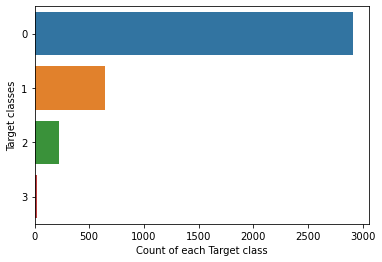

In [98]:
kemacetan_encoded = data

sns.countplot(y=kemacetan_encoded.kemacetan)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [99]:
# melakukan Encode Categorical Data pada atribut kemacetan
labelencoder_kemacetan = LabelEncoder()
kemacetan_encoded.kemacetan = labelencoder_kemacetan.fit_transform(kemacetan_encoded.iloc[:, 11])
kemacetan_encoded

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway     gap  speed>85  \
0         2     3        479        292         53     0.37   10.28     47.50   
1         0     1       4232        206        139     0.00    1.71     60.25   
2         0     3       1202        746        107     0.00    2.36     39.25   
3         2     1        565        535        292     0.12    5.03     42.25   
4         0     2       2211       1801        179     0.00    1.08     44.50   
...     ...   ...        ...        ...        ...      ...     ...       ...   
3799      2     4         19         12         17    30.27  158.46     42.50   
3800      2     4         10         17          1    10.31   71.82     56.00   
3801      2     4          4         36          7   154.62  155.17     56.50   
3802      2     6          2          5          1     2.31  295.91     42.50   
3803      2     6          7          7          0   161.77  196.09     71.75   

      avgSpeed  lebar_jln  pjg_antrian  kemacetan  
0        21.31       21.0          700          3  
1        11.94       21.0          700          3  
2        12.62       21.0          700          3  
3        18.19       22.0          700          3  
4        15.50       21.0          680          3  
...        ...        ...          ...        ...  
3799     14.19       14.0            0          0  
3800     46.50       14.0            0          0  
3801     14.56       14.0            0          0  
3802     29.38       22.0            0          0  
3803     35.38       22.0            0          0  

[3804 rows x 12 columns]

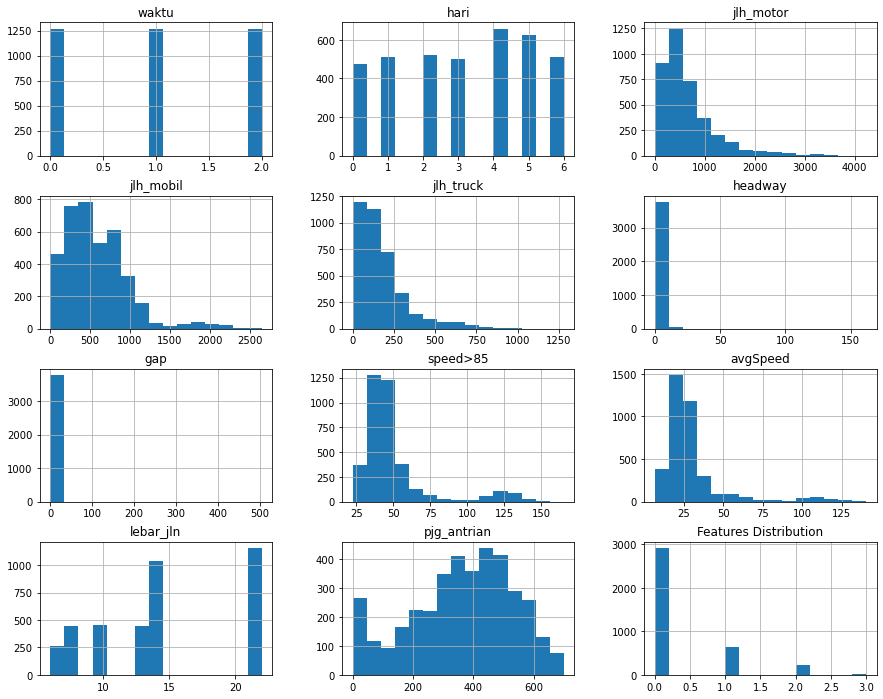

In [100]:
kemacetan_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

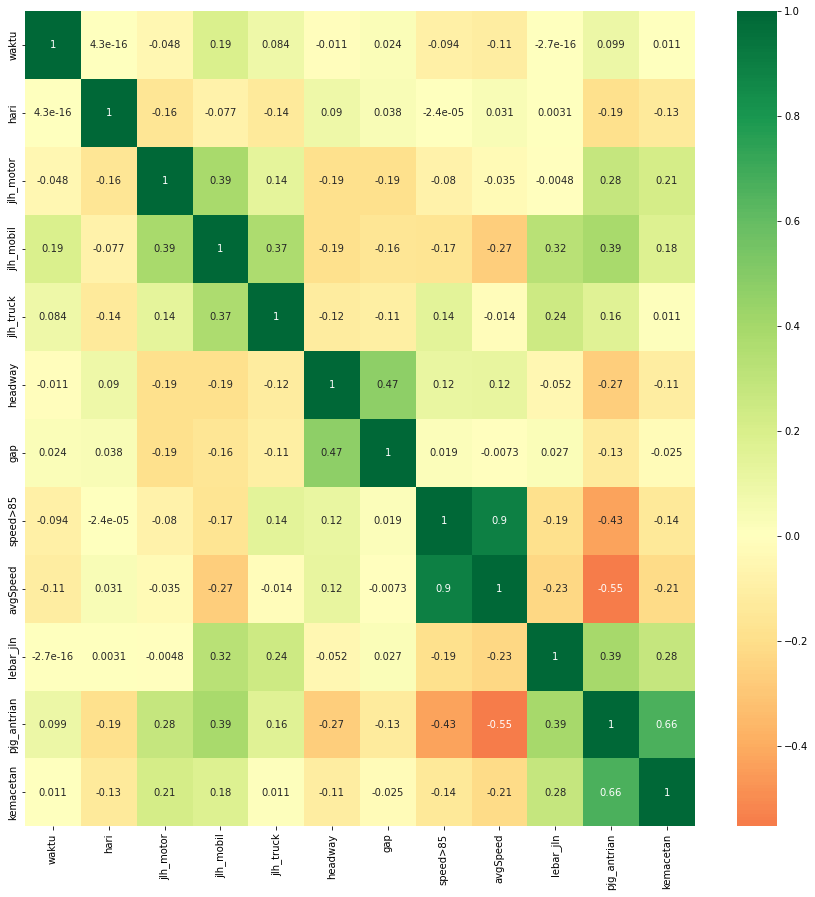

In [101]:
plt.figure(figsize=(15,15))
p=sns.heatmap(kemacetan_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

In [102]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, test_dataset =  train_test_split(kemacetan_encoded, test_size=0.3, random_state = 0)
print( train_dataset.shape )
print( test_dataset.shape )

(2662, 12)
(1142, 12)


In [103]:
test_dataset

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
2808      0     0        873        853        136     0.81   3.94     44.50   
2377      2     5        597        922         97     0.43   1.56     53.75   
796       2     6        525       1066         81     0.14   1.40     42.50   
3414      2     1       1048        270        362     0.56   1.80    108.75   
2356      2     0        611        915         53     0.13   1.98     41.25   
...     ...   ...        ...        ...        ...      ...    ...       ...   
1110      0     4        327        154         29     0.44   7.76     54.25   
3771      1     4        169         60         78     3.96  10.66     79.25   
2373      2     5        697        197         16     0.75   1.68     37.50   
1642      2     4        921        797        181     0.03   2.31     36.75   
1571      1     1        385        867        563     5.24   8.11     31.00   

      avgSpeed  lebar_jln  pjg_antrian  kemacetan  
2808     22.25        7.2          260          0  
2377     32.19       14.0          320          0  
796      19.81       21.0          510          1  
3414     92.50        9.5          100          0  
2356     26.62       14.0          330          0  
...        ...        ...          ...        ...  
1110     21.25       21.0          470          0  
3771     58.62        6.0           15          0  
2373     31.00       14.0          320          0  
1642     16.56       12.5          410          0  
1571     15.75       21.0          420          0  

[1142 rows x 12 columns]

In [104]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (2662, 12)
 Test dataset       : (1142, 12)


In [105]:
train_dataset

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
3782      0     2        451        301         78     4.01  4.57    135.50   
529       2     1       1400       2517        208     0.00  0.61     43.75   
2480      2     0        631        204         57     0.43  2.34     39.50   
1888      1     1        541        276         12     0.44  3.12     75.75   
2075      2     3        315        823        303     0.99  4.56     44.00   
...     ...   ...        ...        ...        ...      ...   ...       ...   
835       1     6        418       1085         71     0.23  2.61     49.50   
3264      2     1        475        207         76     1.94  4.44     39.50   
1653      1     6        502        758        184     0.11  4.92     36.50   
2607      0     2        951        818        456     0.19  1.63    127.00   
2732      0     6        221        342         40     2.37  4.78     36.75   

      avgSpeed  lebar_jln  pjg_antrian  kemacetan  
3782    136.81       14.0           10          0  
529      17.75       14.0          540          1  
2480     28.94       12.5          310          0  
1888     53.56       14.0          380          0  
2075     13.88        7.2          360          0  
...        ...        ...          ...        ...  
835      25.69       14.0          500          1  
3264     32.31       12.5          160          0  
1653     19.75        6.0          410          0  
2607     59.62        9.5          290          0  
2732     18.62       14.0          270          0  

[2662 rows x 12 columns]

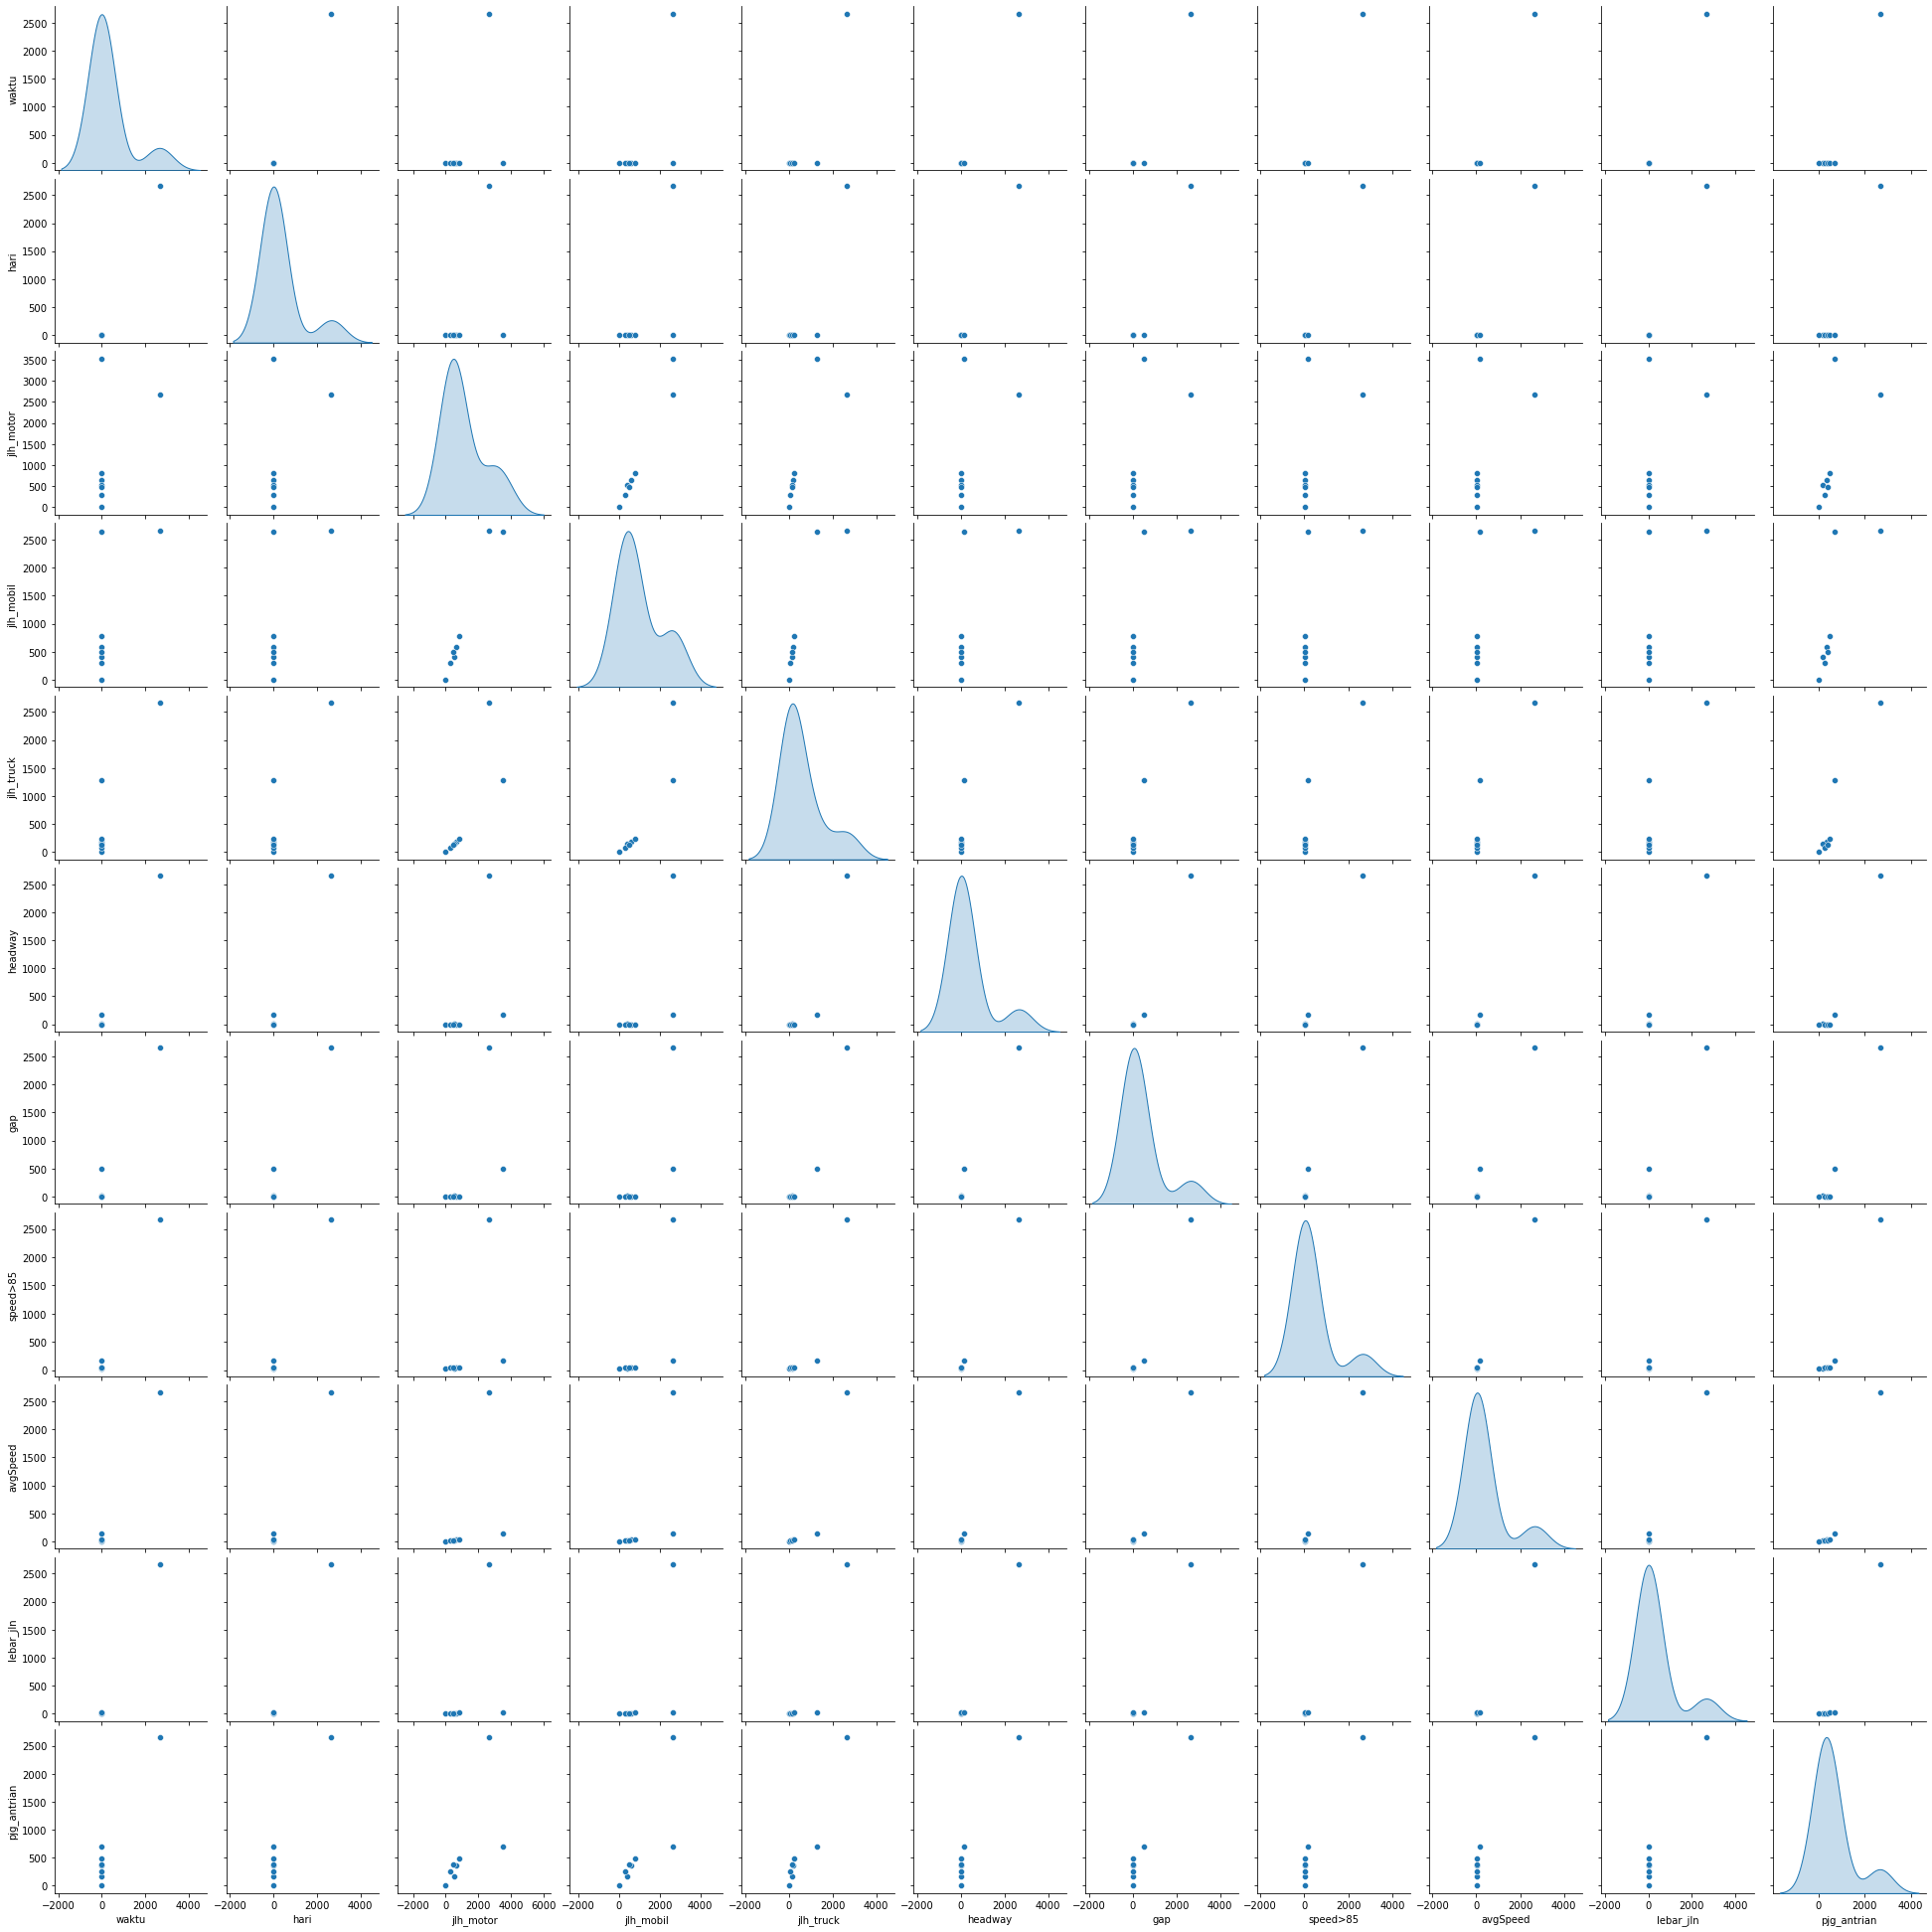

In [106]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("kemacetan")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [107]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("kemacetan")
train_stats = train_stats.transpose()
train_stats

count        mean         std    min     25%      50%     75%  \
waktu        2662.0    1.004132    0.813027   0.00    0.00    1.000    2.00   
hari         2662.0    3.128475    1.950155   0.00    1.00    3.000    5.00   
jlh_motor    2662.0  650.222014  534.190587   0.00  293.00  485.000  817.75   
jlh_mobil    2662.0  578.976709  401.881661   1.00  299.25  495.500  785.75   
jlh_truck    2662.0  173.808039  152.999975   0.00   67.00  135.000  227.00   
headway      2662.0    1.345729    4.889177   0.00    0.13    0.530    1.38   
gap          2662.0    5.439452   15.324588   0.20    2.03    3.485    5.90   
speed>85     2662.0   50.067949   23.781104  22.50   38.25   43.250   50.75   
avgSpeed     2662.0   29.707926   20.130136   6.69   19.50   24.560   31.50   
lebar_jln    2662.0   14.061382    5.373196   6.00    9.50   14.000   21.00   
pjg_antrian  2662.0  363.129226  165.900947   0.00  260.00  380.000  490.00   

                 max  
waktu           2.00  
hari            6.00  
jlh_motor    3530.00  
jlh_mobil    2647.00  
jlh_truck    1280.00  
headway       161.77  
gap           503.57  
speed>85      165.50  
avgSpeed      140.38  
lebar_jln      22.00  
pjg_antrian   700.00

In [108]:
y_train1 = train_dataset.kemacetan
y_test1 = test_dataset.kemacetan
y_train1

3782    0
529     1
2480    0
1888    0
2075    0
       ..
835     1
3264    0
1653    0
2607    0
2732    0
Name: kemacetan, Length: 2662, dtype: int64

In [109]:
test_dataset1 = test_dataset.drop(['kemacetan'], axis = 1)
test_dataset1

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
2808      0     0        873        853        136     0.81   3.94     44.50   
2377      2     5        597        922         97     0.43   1.56     53.75   
796       2     6        525       1066         81     0.14   1.40     42.50   
3414      2     1       1048        270        362     0.56   1.80    108.75   
2356      2     0        611        915         53     0.13   1.98     41.25   
...     ...   ...        ...        ...        ...      ...    ...       ...   
1110      0     4        327        154         29     0.44   7.76     54.25   
3771      1     4        169         60         78     3.96  10.66     79.25   
2373      2     5        697        197         16     0.75   1.68     37.50   
1642      2     4        921        797        181     0.03   2.31     36.75   
1571      1     1        385        867        563     5.24   8.11     31.00   

      avgSpeed  lebar_jln  pjg_antrian  
2808     22.25        7.2          260  
2377     32.19       14.0          320  
796      19.81       21.0          510  
3414     92.50        9.5          100  
2356     26.62       14.0          330  
...        ...        ...          ...  
1110     21.25       21.0          470  
3771     58.62        6.0           15  
2373     31.00       14.0          320  
1642     16.56       12.5          410  
1571     15.75       21.0          420  

[1142 rows x 11 columns]

In [110]:
train_dataset1 = train_dataset.drop(['kemacetan'], axis = 1)
train_dataset1

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
3782      0     2        451        301         78     4.01  4.57    135.50   
529       2     1       1400       2517        208     0.00  0.61     43.75   
2480      2     0        631        204         57     0.43  2.34     39.50   
1888      1     1        541        276         12     0.44  3.12     75.75   
2075      2     3        315        823        303     0.99  4.56     44.00   
...     ...   ...        ...        ...        ...      ...   ...       ...   
835       1     6        418       1085         71     0.23  2.61     49.50   
3264      2     1        475        207         76     1.94  4.44     39.50   
1653      1     6        502        758        184     0.11  4.92     36.50   
2607      0     2        951        818        456     0.19  1.63    127.00   
2732      0     6        221        342         40     2.37  4.78     36.75   

      avgSpeed  lebar_jln  pjg_antrian  
3782    136.81       14.0           10  
529      17.75       14.0          540  
2480     28.94       12.5          310  
1888     53.56       14.0          380  
2075     13.88        7.2          360  
...        ...        ...          ...  
835      25.69       14.0          500  
3264     32.31       12.5          160  
1653     19.75        6.0          410  
2607     59.62        9.5          290  
2732     18.62       14.0          270  

[2662 rows x 11 columns]

In [111]:
# Encode label
y_train_dummy = pd.get_dummies(y_train1, prefix='Label')
y_test_dummy  = pd.get_dummies(y_test1, prefix='Label')

y_train_dummy

Label_0  Label_1  Label_2  Label_3
3782        1        0        0        0
529         0        1        0        0
2480        1        0        0        0
1888        1        0        0        0
2075        1        0        0        0
...       ...      ...      ...      ...
835         0        1        0        0
3264        1        0        0        0
1653        1        0        0        0
2607        1        0        0        0
2732        1        0        0        0

[2662 rows x 4 columns]

# Artificial Neural Network Classification 

In [112]:
# membangun model ANN
def create_model(optimizer='Adam', activation='relu'):
    model = Sequential()
    model.add(Dense(23, activation='relu', input_shape = (train_dataset1.shape[1],)))    # Input layer => input_shape must be explicitly designated       
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax')) 
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [113]:
%%time

EPOCHS = 50
batch_size = 10

model = create_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset1, 
        y_train_dummy,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_dataset1.shape[0] / batch_size) , 
    )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                276       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
266/266 [==============================] - 0s 474us/step - loss: 22.2374 - accuracy: 0.6380
Epoch 2/50
266/266 [==============================] - 0s 496us/step - loss: 12.9509 - accuracy: 0.6953
Epoch 3/50
266/266 [==============================] - 0s 451us/step - loss: 9.0828 - accuracy: 0.7036
Epoch 4/50
266/266 [==========================

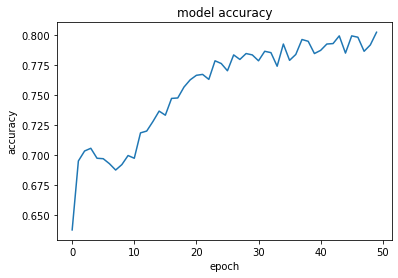

In [114]:
# melihat plot akurasi pada epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

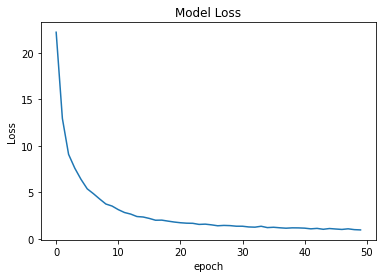

In [115]:
# melihat plot loss pada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

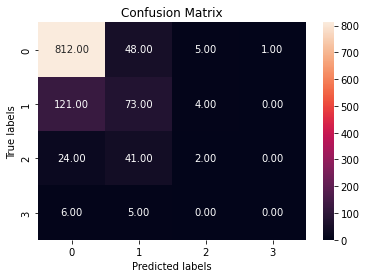

In [116]:
# melihat hasil tabel kebenaran confussion matrix

ax= plt.subplot()
y_pred = model.predict(test_dataset1)
y_pred = y_pred.argmax(axis = 1)
# y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test1, y_pred)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [117]:
# melihat hasil pengujian menggunakan data test
print(classification_report(y_test1,y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test1, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test1, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test1, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test1, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       866
           1       0.44      0.37      0.40       198
           2       0.18      0.03      0.05        67
           3       0.00      0.00      0.00        11

    accuracy                           0.78      1142
   macro avg       0.37      0.33      0.33      1142
weighted avg       0.73      0.78      0.75      1142

Accuracy : 0.7767
Precision : 0.7259
Recall : 0.7767
F1-score : 0.7457


# PAGI

In [118]:
data_pagi = data_pagi.drop(['nama_jalan','Longtitude','Latitude','lajur','tanggal','jumlah','occupancy'],axis=1)
data_pagi

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway     gap  speed>85  \
1         0     1       4232        206        139     0.00    1.71     60.25   
2         0     3       1202        746        107     0.00    2.36     39.25   
4         0     2       2211       1801        179     0.00    1.08     44.50   
5         0     2       2526       2064        291     0.00    0.44     43.00   
7         0     0       2515       1986        176     0.00    0.83     49.75   
...     ...   ...        ...        ...        ...      ...     ...       ...   
3788      0     2         99         68         44     5.00   13.63    136.75   
3790      0     5        282         57         73     7.59    8.24     67.50   
3791      0     1        505        270         64     4.57    5.35    135.75   
3794      0     5        175         43          9     2.22    7.68    106.25   
3798      0     4          0          2          0    15.32  360.86     76.25   

      avgSpeed  lebar_jln  pjg_antrian  kemacetan  
1        11.94       21.0          700          3  
2        12.62       21.0          700          3  
4        15.50       21.0          680          3  
5        18.88       21.0          680          3  
7        14.06       21.0          680          3  
...        ...        ...          ...        ...  
3788     81.38        6.0           10          0  
3790     54.62        6.0           10          0  
3791    140.38       14.0           10          0  
3794     48.44       14.0            8          0  
3798     50.38       14.0            0          0  

[1268 rows x 12 columns]

In [119]:
# Split the data into 70% train and 30% test (later will divide the test to test and validate.)
train_dataset_pagi, test_dataset_pagi =  train_test_split(data_pagi, test_size=0.3, random_state = 0)
print( train_dataset_pagi.shape )
print( test_dataset_pagi.shape )

(887, 12)
(381, 12)


In [120]:
y_train_pagi = train_dataset_pagi.kemacetan
y_test_pagi = test_dataset_pagi.kemacetan
y_train_pagi

3355    0
1662    0
3661    0
2731    0
1755    0
       ..
2499    0
2732    0
3692    0
1808    0
2230    0
Name: kemacetan, Length: 887, dtype: int64

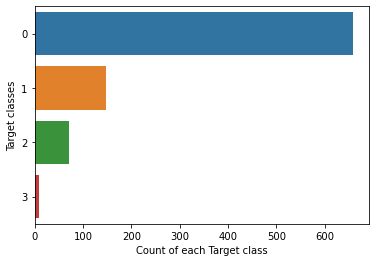

In [121]:
sns.countplot(y=y_train_pagi)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [122]:
test_dataset_pagi = test_dataset_pagi.drop(['kemacetan'], axis = 1)
test_dataset_pagi

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
2602      0     2        621        825        115     0.16  1.83     45.00   
923       0     0        148        921        399     0.00  8.43     61.00   
2462      0     2        616        441        211     1.05  2.91     50.00   
8         0     3       2321       2119        178     0.02  1.79     56.50   
3563      0     1        424         66          2     1.84  7.39     90.50   
...     ...   ...        ...        ...        ...      ...   ...       ...   
691       0     3        588        495        215     0.77  5.43     43.00   
2464      0     4        270        479         61     0.79  4.24     30.00   
238       0     1       2775       1092        167     0.00  1.85     49.75   
3246      0     6        545        453         52     1.13  2.08     43.75   
1599      0     4        344        829        462     1.24  3.82     28.75   

      avgSpeed  lebar_jln  pjg_antrian  
2602     23.25        7.2          290  
923      19.50       22.0          490  
2462     33.25        6.0          310  
8        15.75       21.0          680  
3563     51.75       14.0           30  
...        ...        ...          ...  
691      31.12       22.0          520  
2464     19.41       14.0          310  
238      30.75       21.0          600  
3246     33.12       14.0          160  
1599     13.81       21.0          420  

[381 rows x 11 columns]

In [123]:
train_dataset_pagi = train_dataset_pagi.drop(['kemacetan'], axis = 1)
train_dataset_pagi

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway   gap  speed>85  \
3355      0     4        102        297         65     2.96  4.67     48.75   
1662      0     0        627        399         82     0.02  1.07     49.50   
3661      0     6        172         93         29     1.53  4.83     40.00   
2731      0     4        145        784        128     0.47  6.93     44.50   
1755      0     2        384        757         30     0.23  5.13     30.00   
...     ...   ...        ...        ...        ...      ...   ...       ...   
2499      0     2        832        810        163     1.01  2.31     56.50   
2732      0     6        221        342         40     2.37  4.78     36.75   
3692      0     1        395        101         92     5.69  6.03     74.50   
1808      0     0       1329        751         75     0.02  2.00     43.25   
2230      0     5        295        526        889     1.34  2.58     66.75   

      avgSpeed  lebar_jln  pjg_antrian  
3355     34.12       14.0          120  
1662     33.75        6.0          410  
3661     37.38       12.5           25  
2731     28.94       14.0          270  
1755     17.59       14.0          400  
...        ...        ...          ...  
2499     33.69       14.0          310  
2732     18.62       14.0          270  
3692     57.88        6.0           20  
1808     27.12       14.0          390  
2230     26.88       22.0          340  

[887 rows x 11 columns]

In [124]:
# Encode label
y_train_dummy_pagi = pd.get_dummies(y_train_pagi, prefix='Label')
y_test_dummy_pagi  = pd.get_dummies(y_test_pagi, prefix='Label')

y_train_dummy_pagi

Label_0  Label_1  Label_2  Label_3
3355        1        0        0        0
1662        1        0        0        0
3661        1        0        0        0
2731        1        0        0        0
1755        1        0        0        0
...       ...      ...      ...      ...
2499        1        0        0        0
2732        1        0        0        0
3692        1        0        0        0
1808        1        0        0        0
2230        1        0        0        0

[887 rows x 4 columns]

# Artificial Neural Network Pagi

In [125]:
# membangun model ANN
def create_model(optimizer='Adam', activation='relu'):
    model = Sequential()
    model.add(Dense(23, activation='relu', input_shape = (train_dataset_pagi.shape[1],)))    # Input layer => input_shape must be explicitly designated       
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax')) 
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [126]:
%%time

EPOCHS = 50
batch_size = 10

model = create_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset_pagi, 
        y_train_dummy_pagi,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(train_dataset_pagi.shape[0] / batch_size) , 
    )

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 23)                276       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
88/88 [==============================] - 0s 432us/step - loss: 112.4270 - accuracy: 0.0830
Epoch 2/50
88/88 [==============================] - 0s 443us/step - loss: 83.1242 - accuracy: 0.1482
Epoch 3/50
88/88 [==============================] - 0s 466us/step - loss: 62.8174 - accuracy: 0.2828
Epoch 4/50
88/88 [==============================

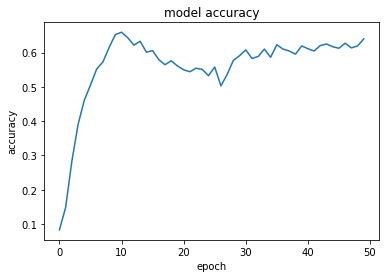

In [127]:
# melihat plot akurasi pada epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

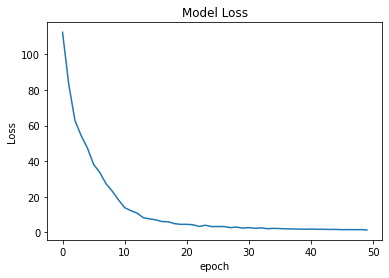

In [128]:
# melihat plot loss pada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

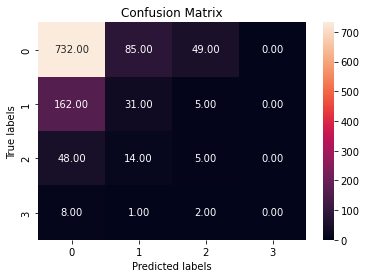

In [129]:
# melihat hasil tabel kebenaran confussion matrix

ax= plt.subplot()
y_pred = model.predict(test_dataset1)
y_pred = y_pred.argmax(axis = 1)
# y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test1, y_pred)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [130]:
# melihat hasil pengujian menggunakan data test
print(classification_report(y_test1,y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test1, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test1, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test1, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test1, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       866
           1       0.24      0.16      0.19       198
           2       0.08      0.07      0.08        67
           3       0.00      0.00      0.00        11

    accuracy                           0.67      1142
   macro avg       0.27      0.27      0.27      1142
weighted avg       0.63      0.67      0.65      1142

Accuracy : 0.6725
Precision : 0.6301
Recall : 0.6725
F1-score : 0.6486


C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adhit\anac

# OverSampling

In [131]:
y_train = train_dataset.pop('kemacetan')
y_test = test_dataset.pop('kemacetan')
y_train

3782    0
529     1
2480    0
1888    0
2075    0
       ..
835     1
3264    0
1653    0
2607    0
2732    0
Name: kemacetan, Length: 2662, dtype: int64

In [132]:
ros = RandomOverSampler()
# resampling X, y
X_train_ANN_ros, y_train_ANN_ros = ros.fit_resample(train_dataset, y_train)
# new class distribution 
print(Counter(y_train_ANN_ros))

Counter({0: 2050, 1: 2050, 2: 2050, 3: 2050})


In [133]:
# resampling X, y
X_train_akhir_ros, y_train_akhir_ros = ros.fit_resample(train_dataset_akhir, y_train)
# new class distribution 
print(Counter(y_train_akhir_ros))

Counter({0: 2050, 1: 2050, 2: 2050, 3: 2050})


In [134]:
# resampling X, y
# X_test_ANN_ros, y_test_ANN_ros = ros.fit_resample(test_dataset, y_test)
# new class distribution 
# print(Counter(y_test_ANN_ros))

In [135]:
# resampling X, y
# X_test_akhir_ros, y_test_akhir_ros = ros.fit_resample(test_dataset_akhir, y_test)
# new class distribution 
# print(Counter(y_test_akhir_ros))

In [136]:
# Encode label
y_train_dummy = pd.get_dummies(y_train_ANN_ros, prefix='Label')
# y_test_dummy  = pd.get_dummies(y_test_ANN_ros, prefix='Label')

y_train_dummy

Label_0  Label_1  Label_2  Label_3
0           1        0        0        0
1           0        1        0        0
2           1        0        0        0
3           1        0        0        0
4           1        0        0        0
...       ...      ...      ...      ...
8195        0        0        0        1
8196        0        0        0        1
8197        0        0        0        1
8198        0        0        0        1
8199        0        0        0        1

[8200 rows x 4 columns]

In [137]:
y_train_ANN_ros

0       0
1       1
2       0
3       0
4       0
       ..
8195    3
8196    3
8197    3
8198    3
8199    3
Name: kemacetan, Length: 8200, dtype: int64

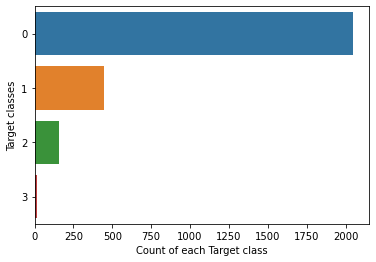

In [138]:
sns.countplot(y=y_train ,data=test_dataset)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

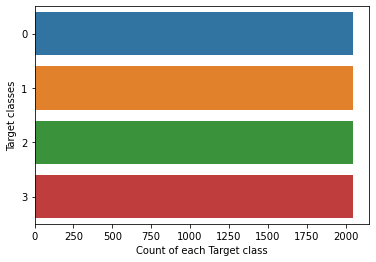

In [139]:
sns.countplot(y=y_train_ANN_ros ,data=X_train_ANN_ros)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# Normalisasi MinMaxScaler

In [140]:
# melakukan normalisasi menggunakan StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
normed_train_data = sc.fit_transform(X_train_ANN_ros)
normed_test_data = sc.fit_transform(X_test)

In [141]:
# melihat data train setelah dinormalisasi
normed_train_data

array([[0.        , 0.33333333, 0.12776204, ..., 0.97329643, 0.5       ,
        0.01428571],
       [1.        , 0.16666667, 0.39660057, ..., 0.0827287 , 0.5       ,
        0.77142857],
       [1.        , 0.        , 0.17875354, ..., 0.1664298 , 0.40625   ,
        0.44285714],
       ...,
       [1.        , 0.5       , 0.16827195, ..., 0.04645074, 0.9375    ,
        0.97142857],
       [1.        , 0.33333333, 0.07620397, ..., 0.13650984, 0.9375    ,
        0.97142857],
       [1.        , 0.16666667, 0.16005666, ..., 0.0860199 , 1.        ,
        1.        ]])

In [142]:
# membangun model ANN setelah tuning
def create_model(optimizer='Adam', activation='relu'):
    model = Sequential()
    model.add(Dense(23, activation='relu', input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated       
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))                         # Output layer => output dimension = 1 since it is a regression problem
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [143]:
%%time

EPOCHS = 50
batch_size = 10

model = create_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/GPU:0'):
    history = model.fit(
        normed_train_data, 
        y_train_dummy,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) , 
    )

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 23)                276       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
820/820 [==============================] - 0s 388us/step - loss: 1.3705 - accuracy: 0.2634
Epoch 2/50
820/820 [==============================] - 0s 529us/step - loss: 1.3175 - accuracy: 0.3746
Epoch 3/50
820/820 [==============================] - 0s 572us/step - loss: 1.2574 - accuracy: 0.4580
Epoch 4/50
820/820 [==========================

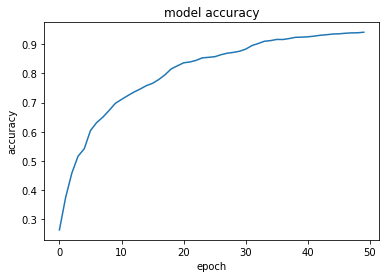

In [144]:
# melihat plot akurasi pada epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

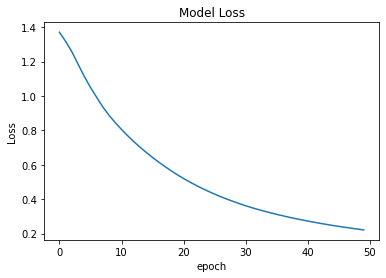

In [145]:
# melihat plot loss pada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

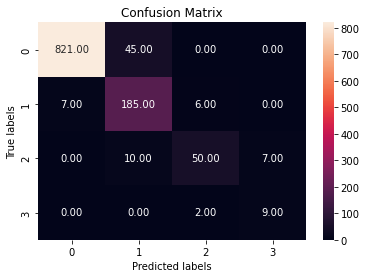

In [146]:
# melihat hasil tabel kebenaran confussion matrix

ax= plt.subplot()
y_pred = model.predict(normed_test_data)

y_pred = y_pred.argmax(axis = 1)
# y_predht = (y_predht > 0.5)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [147]:
# hasil pengujian menggunakan data test setelah menggunakan parameter terbaik
print(classification_report(y_test,y_pred))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_pred, average='weighted')))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       866
           1       0.77      0.93      0.84       198
           2       0.86      0.75      0.80        67
           3       0.56      0.82      0.67        11

    accuracy                           0.93      1142
   macro avg       0.80      0.86      0.82      1142
weighted avg       0.94      0.93      0.93      1142

Accuracy : 0.9326
Precision : 0.9415
Recall : 0.9326
F1-score : 0.9349


# Hyperparameter Tuning

In [92]:
# mencari parameter terbaik menggunakan KerasClassifier
model_baru = KerasClassifier(build_fn=create_model)

In [93]:
batchSize = [4,8,10,50]
epochs = [4,8,10,32,64,128]
optimizer = ['SGD','RMSprop','Adam']
activation = ['relu', 'softmax', 'tanh']

In [94]:
%%time
parameter_grid = dict(batch_size=batchSize, epochs=epochs, optimizer=optimizer, activation=activation)

mygrid = GridSearchCV(estimator=model_baru, param_grid=parameter_grid, cv=3)
grid_result = mygrid.fit(normed_train_data, y_train_dummy)

Epoch 1/4
1367/1367 [==============================] - 1s 521us/step - loss: 1.2816 - accuracy: 0.3465
Epoch 2/4
1367/1367 [==============================] - ETA: 0s - loss: 1.1745 - accuracy: 0.36 - 1s 470us/step - loss: 1.1726 - accuracy: 0.3716
Epoch 3/4
1367/1367 [==============================] - 1s 492us/step - loss: 1.0904 - accuracy: 0.4645
Epoch 4/4
684/684 [==============================] - 0s 414us/step - loss: 2.9337 - accuracy: 0.0443
Epoch 1/4
1367/1367 [==============================] - 1s 620us/step - loss: 1.2847 - accuracy: 0.37790s - loss: 1.3127 - accura
Epoch 2/4
1367/1367 [==============================] - 1s 533us/step - loss: 1.1776 - accuracy: 0.4802
Epoch 3/4
1367/1367 [==============================] - 1s 610us/step - loss: 1.0969 - accuracy: 0.6140
Epoch 4/4
684/684 [==============================] - 0s 434us/step - loss: 2.0794 - accuracy: 0.0000e+00
Epoch 1/4
1367/1367 [==============================] - 1s 607us/step - loss: 1.3183 - accuracy: 0.3746
Epoch

1367/1367 [==============================] - 1s 459us/step - loss: 1.3306 - accuracy: 0.2898
Epoch 2/8
1367/1367 [==============================] - 1s 476us/step - loss: 1.1389 - accuracy: 0.3621
Epoch 3/8
1367/1367 [==============================] - 1s 681us/step - loss: 1.0726 - accuracy: 0.5042
Epoch 4/8
1367/1367 [==============================] - 1s 525us/step - loss: 1.0372 - accuracy: 0.5132
Epoch 5/8
1367/1367 [==============================] - 1s 561us/step - loss: 1.0057 - accuracy: 0.5168
Epoch 6/8
1367/1367 [==============================] - 1s 519us/step - loss: 0.9753 - accuracy: 0.5335
Epoch 7/8
1367/1367 [==============================] - 1s 493us/step - loss: 0.9434 - accuracy: 0.5322
Epoch 8/8
684/684 [==============================] - 0s 389us/step - loss: 5.0498 - accuracy: 0.0435
Epoch 1/8
1367/1367 [==============================] - 1s 549us/step - loss: 1.3022 - accuracy: 0.4556
Epoch 2/8
1367/1367 [==============================] - 1s 497us/step - loss: 1.1285 -

684/684 [==============================] - 0s 417us/step - loss: 1.5957 - accuracy: 0.0743
Epoch 1/10
1367/1367 [==============================] - 1s 611us/step - loss: 1.2960 - accuracy: 0.4315
Epoch 2/10
1367/1367 [==============================] - 1s 690us/step - loss: 1.0963 - accuracy: 0.5306
Epoch 3/10
1367/1367 [==============================] - 1s 732us/step - loss: 0.9986 - accuracy: 0.5628
Epoch 4/10
1367/1367 [==============================] - 1s 729us/step - loss: 0.9457 - accuracy: 0.5837
Epoch 5/10
1367/1367 [==============================] - 1s 697us/step - loss: 0.9011 - accuracy: 0.5969
Epoch 6/10
1367/1367 [==============================] - 1s 572us/step - loss: 0.8615 - accuracy: 0.6161
Epoch 7/10
1367/1367 [==============================] - 1s 675us/step - loss: 0.8242 - accuracy: 0.6289
Epoch 8/10
1367/1367 [==============================] - 1s 594us/step - loss: 0.7887 - accuracy: 0.6439
Epoch 9/10
1367/1367 [==============================] - 1s 644us/step - loss:

1367/1367 [==============================] - 1s 432us/step - loss: 0.6874 - accuracy: 0.7545
Epoch 10/32
1367/1367 [==============================] - 1s 423us/step - loss: 0.6476 - accuracy: 0.7706
Epoch 11/32
1367/1367 [==============================] - 1s 471us/step - loss: 0.6114 - accuracy: 0.7904
Epoch 12/32
1367/1367 [==============================] - 1s 458us/step - loss: 0.5801 - accuracy: 0.7981
Epoch 13/32
1367/1367 [==============================] - 1s 440us/step - loss: 0.5510 - accuracy: 0.8118
Epoch 14/32
1367/1367 [==============================] - 1s 436us/step - loss: 0.5238 - accuracy: 0.8255
Epoch 15/32
1367/1367 [==============================] - 1s 437us/step - loss: 0.4982 - accuracy: 0.8356
Epoch 16/32
1367/1367 [==============================] - 1s 438us/step - loss: 0.4741 - accuracy: 0.8495
Epoch 17/32
1367/1367 [==============================] - 1s 444us/step - loss: 0.4514 - accuracy: 0.8604
Epoch 18/32
1367/1367 [==============================] - 1s 474us/s

1367/1367 [==============================] - 1s 440us/step - loss: 0.3861 - accuracy: 0.8796
Epoch 31/32
1367/1367 [==============================] - 1s 448us/step - loss: 0.3737 - accuracy: 0.8844
Epoch 32/32
684/684 [==============================] - 0s 326us/step - loss: 23.9518 - accuracy: 0.2012
Epoch 1/32
1367/1367 [==============================] - 1s 437us/step - loss: 1.3155 - accuracy: 0.3746
Epoch 2/32
1367/1367 [==============================] - 1s 426us/step - loss: 1.2037 - accuracy: 0.4245
Epoch 3/32
1367/1367 [==============================] - 1s 432us/step - loss: 1.1053 - accuracy: 0.6226
Epoch 4/32
1367/1367 [==============================] - 1s 455us/step - loss: 1.0178 - accuracy: 0.6852
Epoch 5/32
1367/1367 [==============================] - 1s 440us/step - loss: 0.9426 - accuracy: 0.7104
Epoch 6/32
1367/1367 [==============================] - 1s 429us/step - loss: 0.8757 - accuracy: 0.7236
Epoch 7/32
1367/1367 [==============================] - 1s 454us/step - lo

1367/1367 [==============================] - 1s 579us/step - loss: 0.4165 - accuracy: 0.8255
Epoch 22/64
1367/1367 [==============================] - 1s 504us/step - loss: 0.4004 - accuracy: 0.8383
Epoch 23/64
1367/1367 [==============================] - 1s 571us/step - loss: 0.3860 - accuracy: 0.8502
Epoch 24/64
1367/1367 [==============================] - 1s 555us/step - loss: 0.3719 - accuracy: 0.8610
Epoch 25/64
1367/1367 [==============================] - 1s 550us/step - loss: 0.3588 - accuracy: 0.8699
Epoch 26/64
1367/1367 [==============================] - 1s 550us/step - loss: 0.3466 - accuracy: 0.8793
Epoch 27/64
1367/1367 [==============================] - 1s 540us/step - loss: 0.3347 - accuracy: 0.8833
Epoch 28/64
1367/1367 [==============================] - 1s 568us/step - loss: 0.3237 - accuracy: 0.8924
Epoch 29/64
1367/1367 [==============================] - 1s 536us/step - loss: 0.3134 - accuracy: 0.8985
Epoch 30/64
1367/1367 [==============================] - 1s 514us/s

1367/1367 [==============================] - 1s 561us/step - loss: 0.4406 - accuracy: 0.8480
Epoch 47/64
1367/1367 [==============================] - 1s 537us/step - loss: 0.4328 - accuracy: 0.8507
Epoch 48/64
1367/1367 [==============================] - 1s 598us/step - loss: 0.4252 - accuracy: 0.8551
Epoch 49/64
1367/1367 [==============================] - 1s 525us/step - loss: 0.4177 - accuracy: 0.8557
Epoch 50/64
1367/1367 [==============================] - 1s 513us/step - loss: 0.4101 - accuracy: 0.8610
Epoch 51/64
1367/1367 [==============================] - 1s 549us/step - loss: 0.4031 - accuracy: 0.8617
Epoch 52/64
1367/1367 [==============================] - 1s 555us/step - loss: 0.3960 - accuracy: 0.8621
Epoch 53/64
1367/1367 [==============================] - 1s 569us/step - loss: 0.3890 - accuracy: 0.8663
Epoch 54/64
1367/1367 [==============================] - 1s 574us/step - loss: 0.3819 - accuracy: 0.8692
Epoch 55/64
1367/1367 [==============================] - 1s 570us/s

1367/1367 [==============================] - 1s 584us/step - loss: 0.9096 - accuracy: 0.4920
Epoch 8/64
1367/1367 [==============================] - 1s 529us/step - loss: 0.8649 - accuracy: 0.6094
Epoch 9/64
1367/1367 [==============================] - 1s 534us/step - loss: 0.8249 - accuracy: 0.6504
Epoch 10/64
1367/1367 [==============================] - 1s 550us/step - loss: 0.7885 - accuracy: 0.6658
Epoch 11/64
1367/1367 [==============================] - 1s 517us/step - loss: 0.7560 - accuracy: 0.6980
Epoch 12/64
1367/1367 [==============================] - 1s 520us/step - loss: 0.7265 - accuracy: 0.7053
Epoch 13/64
1367/1367 [==============================] - 1s 508us/step - loss: 0.7000 - accuracy: 0.7150
Epoch 14/64
1367/1367 [==============================] - 1s 516us/step - loss: 0.6753 - accuracy: 0.7276
Epoch 15/64
1367/1367 [==============================] - 1s 650us/step - loss: 0.6523 - accuracy: 0.7349
Epoch 16/64
1367/1367 [==============================] - 1s 508us/ste

1367/1367 [==============================] - 1s 544us/step - loss: 0.2712 - accuracy: 0.9373
Epoch 30/64
1367/1367 [==============================] - 1s 567us/step - loss: 0.2621 - accuracy: 0.9402
Epoch 31/64
1367/1367 [==============================] - 1s 578us/step - loss: 0.2525 - accuracy: 0.9449
Epoch 32/64
1367/1367 [==============================] - 1s 625us/step - loss: 0.2447 - accuracy: 0.9457
Epoch 33/64
1367/1367 [==============================] - 1s 571us/step - loss: 0.2364 - accuracy: 0.9470
Epoch 34/64
1367/1367 [==============================] - 1s 552us/step - loss: 0.2290 - accuracy: 0.9488
Epoch 35/64
1367/1367 [==============================] - 1s 575us/step - loss: 0.2216 - accuracy: 0.9519
Epoch 36/64
1367/1367 [==============================] - 1s 584us/step - loss: 0.2151 - accuracy: 0.9521
Epoch 37/64
1367/1367 [==============================] - 1s 563us/step - loss: 0.2088 - accuracy: 0.9532
Epoch 38/64
1367/1367 [==============================] - 1s 551us/s

1367/1367 [==============================] - 1s 508us/step - loss: 0.1149 - accuracy: 0.9676
Epoch 118/128
1367/1367 [==============================] - 1s 536us/step - loss: 0.1135 - accuracy: 0.9694
Epoch 119/128
1367/1367 [==============================] - 1s 583us/step - loss: 0.1124 - accuracy: 0.9685
Epoch 120/128
1367/1367 [==============================] - 1s 566us/step - loss: 0.1117 - accuracy: 0.9687
Epoch 121/128
1367/1367 [==============================] - 1s 604us/step - loss: 0.1103 - accuracy: 0.9674
Epoch 122/128
1367/1367 [==============================] - 1s 601us/step - loss: 0.1091 - accuracy: 0.9682
Epoch 123/128
1367/1367 [==============================] - 1s 564us/step - loss: 0.1083 - accuracy: 0.96890s - loss: 0.1071 - accuracy: 0.
Epoch 124/128
1367/1367 [==============================] - 1s 548us/step - loss: 0.1069 - accuracy: 0.9696
Epoch 125/128
1367/1367 [==============================] - 1s 583us/step - loss: 0.1061 - accuracy: 0.9689
Epoch 126/128
1367/

1367/1367 [==============================] - 1s 565us/step - loss: 0.5639 - accuracy: 0.8089
Epoch 12/128
1367/1367 [==============================] - 1s 510us/step - loss: 0.5372 - accuracy: 0.8211
Epoch 13/128
1367/1367 [==============================] - 1s 530us/step - loss: 0.5122 - accuracy: 0.8392
Epoch 14/128
1367/1367 [==============================] - 1s 533us/step - loss: 0.4882 - accuracy: 0.8467
Epoch 15/128
1367/1367 [==============================] - 1s 544us/step - loss: 0.4652 - accuracy: 0.8597
Epoch 16/128
1367/1367 [==============================] - 1s 609us/step - loss: 0.4446 - accuracy: 0.8674
Epoch 17/128
1367/1367 [==============================] - 1s 538us/step - loss: 0.4245 - accuracy: 0.8762
Epoch 18/128
1367/1367 [==============================] - 1s 560us/step - loss: 0.4057 - accuracy: 0.8824
Epoch 19/128
1367/1367 [==============================] - 1s 572us/step - loss: 0.3880 - accuracy: 0.8901
Epoch 20/128
1367/1367 [==============================] - 1

Epoch 88/128
1367/1367 [==============================] - 1s 635us/step - loss: 0.0855 - accuracy: 0.9846
Epoch 89/128
1367/1367 [==============================] - 1s 563us/step - loss: 0.0845 - accuracy: 0.9854
Epoch 90/128
1367/1367 [==============================] - 1s 587us/step - loss: 0.0839 - accuracy: 0.9846
Epoch 91/128
1367/1367 [==============================] - 1s 532us/step - loss: 0.0829 - accuracy: 0.9859
Epoch 92/128
1367/1367 [==============================] - 1s 508us/step - loss: 0.0825 - accuracy: 0.9837
Epoch 93/128
1367/1367 [==============================] - 1s 567us/step - loss: 0.0812 - accuracy: 0.9848
Epoch 94/128
1367/1367 [==============================] - 1s 540us/step - loss: 0.0806 - accuracy: 0.98540s - loss: 0.0819 - accuracy
Epoch 95/128
1367/1367 [==============================] - 1s 564us/step - loss: 0.0799 - accuracy: 0.9848
Epoch 96/128
1367/1367 [==============================] - 1s 556us/step - loss: 0.0790 - accuracy: 0.9859
Epoch 97/128
1367/

1367/1367 [==============================] - 1s 598us/step - loss: 0.1112 - accuracy: 0.9645
Epoch 112/128
1367/1367 [==============================] - 1s 566us/step - loss: 0.1093 - accuracy: 0.9647
Epoch 113/128
1367/1367 [==============================] - 1s 612us/step - loss: 0.1082 - accuracy: 0.9662
Epoch 114/128
1367/1367 [==============================] - 1s 607us/step - loss: 0.1064 - accuracy: 0.9671
Epoch 115/128
1367/1367 [==============================] - 1s 529us/step - loss: 0.1054 - accuracy: 0.9676
Epoch 116/128
1367/1367 [==============================] - 1s 514us/step - loss: 0.1039 - accuracy: 0.9674
Epoch 117/128
1367/1367 [==============================] - 1s 526us/step - loss: 0.1025 - accuracy: 0.9685
Epoch 118/128
1367/1367 [==============================] - 1s 527us/step - loss: 0.1012 - accuracy: 0.9696
Epoch 119/128
1367/1367 [==============================] - 1s 562us/step - loss: 0.0996 - accuracy: 0.9705
Epoch 120/128
1367/1367 [==========================

1367/1367 [==============================] - 1s 531us/step - loss: 1.0912 - accuracy: 0.4544
Epoch 4/128
1367/1367 [==============================] - 1s 542us/step - loss: 1.0475 - accuracy: 0.5286
Epoch 5/128
1367/1367 [==============================] - 1s 615us/step - loss: 0.9917 - accuracy: 0.5680
Epoch 6/128
1367/1367 [==============================] - 1s 526us/step - loss: 0.9260 - accuracy: 0.6131
Epoch 7/128
1367/1367 [==============================] - 1s 576us/step - loss: 0.8577 - accuracy: 0.6483
Epoch 8/128
1367/1367 [==============================] - 1s 553us/step - loss: 0.7911 - accuracy: 0.6737
Epoch 9/128
1367/1367 [==============================] - 1s 552us/step - loss: 0.7377 - accuracy: 0.6956
Epoch 10/128
1367/1367 [==============================] - 1s 562us/step - loss: 0.6918 - accuracy: 0.7099
Epoch 11/128
1367/1367 [==============================] - 1s 522us/step - loss: 0.6498 - accuracy: 0.7262
Epoch 12/128
1367/1367 [==============================] - 1s 587u

1367/1367 [==============================] - 1s 522us/step - loss: 0.5128 - accuracy: 0.8103
Epoch 29/128
1367/1367 [==============================] - 1s 597us/step - loss: 0.4986 - accuracy: 0.8273
Epoch 30/128
1367/1367 [==============================] - 1s 546us/step - loss: 0.4846 - accuracy: 0.8374
Epoch 31/128
1367/1367 [==============================] - 1s 564us/step - loss: 0.4710 - accuracy: 0.8472
Epoch 32/128
1367/1367 [==============================] - 1s 512us/step - loss: 0.4581 - accuracy: 0.8535
Epoch 33/128
1367/1367 [==============================] - 1s 543us/step - loss: 0.4454 - accuracy: 0.8630
Epoch 34/128
1367/1367 [==============================] - 1s 569us/step - loss: 0.4332 - accuracy: 0.8674
Epoch 35/128
1367/1367 [==============================] - 1s 562us/step - loss: 0.4209 - accuracy: 0.8761
Epoch 36/128
1367/1367 [==============================] - 1s 550us/step - loss: 0.4091 - accuracy: 0.8809
Epoch 37/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 545us/step - loss: 0.1883 - accuracy: 0.9462
Epoch 53/128
1367/1367 [==============================] - 1s 658us/step - loss: 0.1852 - accuracy: 0.94710s - loss: 0.1764 
Epoch 54/128
1367/1367 [==============================] - 1s 578us/step - loss: 0.1821 - accuracy: 0.9491
Epoch 55/128
1367/1367 [==============================] - 1s 593us/step - loss: 0.1798 - accuracy: 0.9491
Epoch 56/128
1367/1367 [==============================] - 1s 539us/step - loss: 0.1770 - accuracy: 0.9508
Epoch 57/128
1367/1367 [==============================] - 1s 505us/step - loss: 0.1744 - accuracy: 0.9519
Epoch 58/128
1367/1367 [==============================] - 1s 545us/step - loss: 0.1719 - accuracy: 0.9526
Epoch 59/128
1367/1367 [==============================] - 1s 543us/step - loss: 0.1691 - accuracy: 0.9537
Epoch 60/128
1367/1367 [==============================] - 1s 509us/step - loss: 0.1672 - accuracy: 0.9524
Epoch 61/128
1367/1367 [=================

684/684 [==============================] - 0s 499us/step - loss: 0.2486 - accuracy: 0.9232
Epoch 1/128
1367/1367 [==============================] - 1s 578us/step - loss: 1.3174 - accuracy: 0.3905
Epoch 2/128
1367/1367 [==============================] - 1s 546us/step - loss: 1.0887 - accuracy: 0.5092
Epoch 3/128
1367/1367 [==============================] - 1s 543us/step - loss: 0.9665 - accuracy: 0.6188
Epoch 4/128
1367/1367 [==============================] - 1s 529us/step - loss: 0.8691 - accuracy: 0.6642
Epoch 5/128
1367/1367 [==============================] - 1s 535us/step - loss: 0.8007 - accuracy: 0.6870
Epoch 6/128
1367/1367 [==============================] - 1s 565us/step - loss: 0.7460 - accuracy: 0.7136
Epoch 7/128
1367/1367 [==============================] - 1s 587us/step - loss: 0.6998 - accuracy: 0.7339
Epoch 8/128
1367/1367 [==============================] - 1s 529us/step - loss: 0.6594 - accuracy: 0.7587
Epoch 9/128
1367/1367 [==============================] - 1s 544us/ste

684/684 [==============================] - 0s 535us/step - loss: 1.3090 - accuracy: 0.4209
Epoch 2/4
684/684 [==============================] - 0s 526us/step - loss: 1.2196 - accuracy: 0.4888
Epoch 3/4
684/684 [==============================] - 0s 501us/step - loss: 1.1622 - accuracy: 0.5749
Epoch 4/4
342/342 [==============================] - 0s 412us/step - loss: 2.1023 - accuracy: 0.0000e+00
Epoch 1/4
684/684 [==============================] - 0s 542us/step - loss: 1.4044 - accuracy: 0.3646
Epoch 2/4
684/684 [==============================] - 0s 507us/step - loss: 1.2697 - accuracy: 0.4425
Epoch 3/4
684/684 [==============================] - 0s 500us/step - loss: 1.1360 - accuracy: 0.4139
Epoch 4/4
342/342 [==============================] - 0s 427us/step - loss: 2.5506 - accuracy: 0.0604
Epoch 1/4
684/684 [==============================] - 0s 557us/step - loss: 1.2762 - accuracy: 0.3524
Epoch 2/4
684/684 [==============================] - 0s 520us/step - loss: 1.1509 - accuracy: 0.3

684/684 [==============================] - 0s 705us/step - loss: 1.1164 - accuracy: 0.6495
Epoch 6/10
684/684 [==============================] - 0s 687us/step - loss: 1.0496 - accuracy: 0.6923
Epoch 7/10
684/684 [==============================] - 0s 730us/step - loss: 0.9704 - accuracy: 0.6894
Epoch 8/10
684/684 [==============================] - 1s 776us/step - loss: 0.8985 - accuracy: 0.7143
Epoch 9/10
684/684 [==============================] - 1s 768us/step - loss: 0.8428 - accuracy: 0.7187
Epoch 10/10
342/342 [==============================] - 0s 436us/step - loss: 1.8968 - accuracy: 0.0000e+00
Epoch 1/10
684/684 [==============================] - 0s 608us/step - loss: 1.3108 - accuracy: 0.3940
Epoch 2/10
684/684 [==============================] - 0s 567us/step - loss: 1.1742 - accuracy: 0.4586
Epoch 3/10
684/684 [==============================] - 0s 538us/step - loss: 1.0853 - accuracy: 0.5231
Epoch 4/10
684/684 [==============================] - 0s 564us/step - loss: 1.0230 - acc

Epoch 8/32
684/684 [==============================] - 0s 624us/step - loss: 1.0135 - accuracy: 0.5037
Epoch 9/32
684/684 [==============================] - 0s 563us/step - loss: 0.9955 - accuracy: 0.5154
Epoch 10/32
684/684 [==============================] - 0s 538us/step - loss: 0.9786 - accuracy: 0.5274
Epoch 11/32
684/684 [==============================] - 0s 531us/step - loss: 0.9626 - accuracy: 0.5311
Epoch 12/32
684/684 [==============================] - 0s 548us/step - loss: 0.9461 - accuracy: 0.5377
Epoch 13/32
684/684 [==============================] - 0s 621us/step - loss: 0.9302 - accuracy: 0.5538
Epoch 14/32
684/684 [==============================] - 0s 556us/step - loss: 0.9147 - accuracy: 0.5602
Epoch 15/32
684/684 [==============================] - 0s 541us/step - loss: 0.8995 - accuracy: 0.5776
Epoch 16/32
684/684 [==============================] - 0s 570us/step - loss: 0.8839 - accuracy: 0.5805
Epoch 17/32
684/684 [==============================] - 0s 537us/step - loss

Epoch 22/32
684/684 [==============================] - 0s 627us/step - loss: 0.5087 - accuracy: 0.8328
Epoch 23/32
684/684 [==============================] - 0s 554us/step - loss: 0.4932 - accuracy: 0.8431
Epoch 24/32
684/684 [==============================] - 0s 535us/step - loss: 0.4780 - accuracy: 0.8496
Epoch 25/32
684/684 [==============================] - 0s 567us/step - loss: 0.4633 - accuracy: 0.8549
Epoch 26/32
684/684 [==============================] - 0s 556us/step - loss: 0.4487 - accuracy: 0.8632
Epoch 27/32
684/684 [==============================] - 0s 572us/step - loss: 0.4347 - accuracy: 0.8721
Epoch 28/32
684/684 [==============================] - 0s 560us/step - loss: 0.4206 - accuracy: 0.8793
Epoch 29/32
684/684 [==============================] - 0s 542us/step - loss: 0.4072 - accuracy: 0.8864
Epoch 30/32
684/684 [==============================] - 0s 513us/step - loss: 0.3945 - accuracy: 0.8939
Epoch 31/32
684/684 [==============================] - 0s 602us/step - lo

684/684 [==============================] - 0s 532us/step - loss: 0.4928 - accuracy: 0.8189
Epoch 49/64
684/684 [==============================] - 0s 516us/step - loss: 0.4850 - accuracy: 0.8192
Epoch 50/64
684/684 [==============================] - 0s 572us/step - loss: 0.4779 - accuracy: 0.8246
Epoch 51/64
684/684 [==============================] - 0s 572us/step - loss: 0.4709 - accuracy: 0.8282
Epoch 52/64
684/684 [==============================] - 0s 602us/step - loss: 0.4637 - accuracy: 0.8306
Epoch 53/64
684/684 [==============================] - 0s 519us/step - loss: 0.4569 - accuracy: 0.8319
Epoch 54/64
684/684 [==============================] - 0s 564us/step - loss: 0.4500 - accuracy: 0.8361
Epoch 55/64
684/684 [==============================] - 0s 649us/step - loss: 0.4432 - accuracy: 0.8381
Epoch 56/64
684/684 [==============================] - 0s 576us/step - loss: 0.4363 - accuracy: 0.8417
Epoch 57/64
684/684 [==============================] - 0s 575us/step - loss: 0.4296 -

684/684 [==============================] - 0s 542us/step - loss: 0.9663 - accuracy: 0.5970
Epoch 10/64
684/684 [==============================] - 0s 560us/step - loss: 0.9466 - accuracy: 0.6151
Epoch 11/64
684/684 [==============================] - 0s 636us/step - loss: 0.9244 - accuracy: 0.6306
Epoch 12/64
684/684 [==============================] - 0s 550us/step - loss: 0.9025 - accuracy: 0.6403
Epoch 13/64
684/684 [==============================] - 0s 523us/step - loss: 0.8814 - accuracy: 0.6423
Epoch 14/64
684/684 [==============================] - 0s 507us/step - loss: 0.8610 - accuracy: 0.6623
Epoch 15/64
684/684 [==============================] - 0s 560us/step - loss: 0.8412 - accuracy: 0.6703
Epoch 16/64
684/684 [==============================] - 0s 588us/step - loss: 0.8218 - accuracy: 0.6709
Epoch 17/64
684/684 [==============================] - 0s 585us/step - loss: 0.8034 - accuracy: 0.6753
Epoch 18/64
684/684 [==============================] - 0s 550us/step - loss: 0.7855 -

684/684 [==============================] - 0s 515us/step - loss: 0.3080 - accuracy: 0.9290
Epoch 38/64
684/684 [==============================] - 0s 539us/step - loss: 0.2989 - accuracy: 0.9292
Epoch 39/64
684/684 [==============================] - 0s 515us/step - loss: 0.2906 - accuracy: 0.93210s - loss: 0.2935 - accuracy: 0.93
Epoch 40/64
684/684 [==============================] - 0s 572us/step - loss: 0.2829 - accuracy: 0.9365
Epoch 41/64
684/684 [==============================] - 0s 639us/step - loss: 0.2751 - accuracy: 0.9376
Epoch 42/64
684/684 [==============================] - 0s 588us/step - loss: 0.2679 - accuracy: 0.9437
Epoch 43/64
684/684 [==============================] - 0s 601us/step - loss: 0.2609 - accuracy: 0.9451
Epoch 44/64
684/684 [==============================] - 0s 563us/step - loss: 0.2539 - accuracy: 0.9459
Epoch 45/64
684/684 [==============================] - 0s 615us/step - loss: 0.2477 - accuracy: 0.9497
Epoch 46/64
684/684 [==============================

342/342 [==============================] - 0s 643us/step - loss: 0.5333 - accuracy: 0.7966
Epoch 1/64
684/684 [==============================] - 0s 556us/step - loss: 1.2851 - accuracy: 0.4597
Epoch 2/64
684/684 [==============================] - 0s 528us/step - loss: 1.1329 - accuracy: 0.5359
Epoch 3/64
684/684 [==============================] - 0s 566us/step - loss: 1.0459 - accuracy: 0.5954
Epoch 4/64
684/684 [==============================] - 0s 611us/step - loss: 0.9814 - accuracy: 0.6265
Epoch 5/64
684/684 [==============================] - 0s 547us/step - loss: 0.9272 - accuracy: 0.6356
Epoch 6/64
684/684 [==============================] - 0s 604us/step - loss: 0.8787 - accuracy: 0.6402
Epoch 7/64
684/684 [==============================] - 0s 551us/step - loss: 0.8356 - accuracy: 0.6455
Epoch 8/64
684/684 [==============================] - 0s 577us/step - loss: 0.7972 - accuracy: 0.6508
Epoch 9/64
684/684 [==============================] - 0s 585us/step - loss: 0.7626 - accuracy

684/684 [==============================] - 0s 566us/step - loss: 0.2269 - accuracy: 0.9376
Epoch 93/128
684/684 [==============================] - 0s 542us/step - loss: 0.2238 - accuracy: 0.9385
Epoch 94/128
684/684 [==============================] - 0s 560us/step - loss: 0.2200 - accuracy: 0.9426
Epoch 95/128
684/684 [==============================] - 0s 630us/step - loss: 0.2169 - accuracy: 0.9409
Epoch 96/128
684/684 [==============================] - 0s 579us/step - loss: 0.2139 - accuracy: 0.9431
Epoch 97/128
684/684 [==============================] - 0s 526us/step - loss: 0.2106 - accuracy: 0.9453
Epoch 98/128
684/684 [==============================] - 0s 518us/step - loss: 0.2072 - accuracy: 0.9471
Epoch 99/128
684/684 [==============================] - 0s 561us/step - loss: 0.2042 - accuracy: 0.9471
Epoch 100/128
684/684 [==============================] - 0s 553us/step - loss: 0.2012 - accuracy: 0.9484
Epoch 101/128
684/684 [==============================] - 0s 580us/step - los

684/684 [==============================] - 0s 553us/step - loss: 0.1042 - accuracy: 0.9696
Epoch 120/128
684/684 [==============================] - 0s 551us/step - loss: 0.1036 - accuracy: 0.9711
Epoch 121/128
684/684 [==============================] - 0s 537us/step - loss: 0.1024 - accuracy: 0.9707
Epoch 122/128
684/684 [==============================] - 0s 560us/step - loss: 0.1018 - accuracy: 0.9718
Epoch 123/128
684/684 [==============================] - 0s 577us/step - loss: 0.1009 - accuracy: 0.9716
Epoch 124/128
684/684 [==============================] - 0s 579us/step - loss: 0.1000 - accuracy: 0.9707
Epoch 125/128
684/684 [==============================] - 0s 554us/step - loss: 0.0988 - accuracy: 0.9718
Epoch 126/128
684/684 [==============================] - 0s 589us/step - loss: 0.0984 - accuracy: 0.9722
Epoch 127/128
684/684 [==============================] - 0s 585us/step - loss: 0.0971 - accuracy: 0.9731
Epoch 128/128
342/342 [==============================] - 0s 430us/ste

684/684 [==============================] - 0s 554us/step - loss: 0.9254 - accuracy: 0.6010
Epoch 18/128
684/684 [==============================] - 0s 560us/step - loss: 0.9103 - accuracy: 0.6101
Epoch 19/128
684/684 [==============================] - 0s 602us/step - loss: 0.8958 - accuracy: 0.6175
Epoch 20/128
684/684 [==============================] - 0s 614us/step - loss: 0.8811 - accuracy: 0.6306
Epoch 21/128
684/684 [==============================] - 0s 547us/step - loss: 0.8668 - accuracy: 0.6361
Epoch 22/128
684/684 [==============================] - 0s 541us/step - loss: 0.8534 - accuracy: 0.6445
Epoch 23/128
684/684 [==============================] - 0s 572us/step - loss: 0.8397 - accuracy: 0.6475
Epoch 24/128
684/684 [==============================] - 0s 615us/step - loss: 0.8255 - accuracy: 0.6487
Epoch 25/128
684/684 [==============================] - 0s 684us/step - loss: 0.8124 - accuracy: 0.6526
Epoch 26/128
684/684 [==============================] - 0s 561us/step - loss:

684/684 [==============================] - 0s 526us/step - loss: 0.2757 - accuracy: 0.9120
Epoch 45/128
684/684 [==============================] - 0s 611us/step - loss: 0.2701 - accuracy: 0.9127
Epoch 46/128
684/684 [==============================] - 0s 599us/step - loss: 0.2648 - accuracy: 0.9151
Epoch 47/128
684/684 [==============================] - 1s 735us/step - loss: 0.2602 - accuracy: 0.9166
Epoch 48/128
684/684 [==============================] - 0s 620us/step - loss: 0.2551 - accuracy: 0.9215
Epoch 49/128
684/684 [==============================] - 0s 569us/step - loss: 0.2507 - accuracy: 0.9235
Epoch 50/128
684/684 [==============================] - 0s 575us/step - loss: 0.2463 - accuracy: 0.9210
Epoch 51/128
684/684 [==============================] - 0s 554us/step - loss: 0.2422 - accuracy: 0.92570s - loss: 0.2423 - accuracy: 0.92
Epoch 52/128
684/684 [==============================] - 0s 553us/step - loss: 0.2380 - accuracy: 0.9246
Epoch 53/128
684/684 [=====================

684/684 [==============================] - 0s 554us/step - loss: 0.1568 - accuracy: 0.9684
Epoch 72/128
684/684 [==============================] - 0s 550us/step - loss: 0.1547 - accuracy: 0.9691
Epoch 73/128
684/684 [==============================] - 0s 554us/step - loss: 0.1525 - accuracy: 0.9698
Epoch 74/128
684/684 [==============================] - 0s 558us/step - loss: 0.1505 - accuracy: 0.9698
Epoch 75/128
684/684 [==============================] - 0s 602us/step - loss: 0.1482 - accuracy: 0.9702
Epoch 76/128
684/684 [==============================] - 0s 648us/step - loss: 0.1464 - accuracy: 0.9702
Epoch 77/128
684/684 [==============================] - 0s 713us/step - loss: 0.1443 - accuracy: 0.9706
Epoch 78/128
684/684 [==============================] - 1s 778us/step - loss: 0.1422 - accuracy: 0.9702
Epoch 79/128
684/684 [==============================] - 0s 554us/step - loss: 0.1403 - accuracy: 0.9706
Epoch 80/128
684/684 [==============================] - 0s 662us/step - loss:

684/684 [==============================] - 0s 513us/step - loss: 0.1753 - accuracy: 0.9572
Epoch 99/128
684/684 [==============================] - 0s 627us/step - loss: 0.1724 - accuracy: 0.9583
Epoch 100/128
684/684 [==============================] - 0s 589us/step - loss: 0.1695 - accuracy: 0.9594
Epoch 101/128
684/684 [==============================] - 0s 579us/step - loss: 0.1663 - accuracy: 0.9610
Epoch 102/128
684/684 [==============================] - 0s 556us/step - loss: 0.1640 - accuracy: 0.9616
Epoch 103/128
684/684 [==============================] - 0s 534us/step - loss: 0.1608 - accuracy: 0.9619
Epoch 104/128
684/684 [==============================] - 0s 522us/step - loss: 0.1582 - accuracy: 0.9630
Epoch 105/128
684/684 [==============================] - 0s 572us/step - loss: 0.1557 - accuracy: 0.9627
Epoch 106/128
684/684 [==============================] - 0s 563us/step - loss: 0.1529 - accuracy: 0.9652
Epoch 107/128
684/684 [==============================] - 0s 541us/step

684/684 [==============================] - 0s 583us/step - loss: 0.0820 - accuracy: 0.9802
Epoch 126/128
684/684 [==============================] - 0s 553us/step - loss: 0.0815 - accuracy: 0.9808
Epoch 127/128
684/684 [==============================] - 0s 605us/step - loss: 0.0809 - accuracy: 0.9823
Epoch 128/128
342/342 [==============================] - 0s 412us/step - loss: 0.2432 - accuracy: 0.9363
Epoch 1/128
684/684 [==============================] - 0s 572us/step - loss: 1.3711 - accuracy: 0.3757
Epoch 2/128
684/684 [==============================] - 0s 563us/step - loss: 1.2234 - accuracy: 0.5217
Epoch 3/128
684/684 [==============================] - 0s 570us/step - loss: 1.0901 - accuracy: 0.5654
Epoch 4/128
684/684 [==============================] - 0s 528us/step - loss: 0.9806 - accuracy: 0.5937
Epoch 5/128
684/684 [==============================] - 0s 519us/step - loss: 0.9047 - accuracy: 0.6093
Epoch 6/128
684/684 [==============================] - 0s 528us/step - loss: 0.

547/547 [==============================] - 0s 539us/step - loss: 1.3439 - accuracy: 0.3285
Epoch 2/4
547/547 [==============================] - 0s 550us/step - loss: 1.2570 - accuracy: 0.3920
Epoch 3/4
547/547 [==============================] - 0s 552us/step - loss: 1.2109 - accuracy: 0.4697
Epoch 4/4
274/274 [==============================] - 0s 420us/step - loss: 2.0774 - accuracy: 0.0000e+00
Epoch 1/4
547/547 [==============================] - 0s 601us/step - loss: 1.3885 - accuracy: 0.2521
Epoch 2/4
547/547 [==============================] - 0s 536us/step - loss: 1.2892 - accuracy: 0.4116
Epoch 3/4
547/547 [==============================] - 0s 585us/step - loss: 1.1605 - accuracy: 0.5412
Epoch 4/4
274/274 [==============================] - 0s 409us/step - loss: 2.8752 - accuracy: 0.0490
Epoch 1/4
547/547 [==============================] - 0s 536us/step - loss: 1.3063 - accuracy: 0.3599
Epoch 2/4
547/547 [==============================] - 0s 556us/step - loss: 1.2280 - accuracy: 0.4

547/547 [==============================] - 0s 558us/step - loss: 0.9497 - accuracy: 0.6801
Epoch 9/10
547/547 [==============================] - 0s 539us/step - loss: 0.9048 - accuracy: 0.6852
Epoch 10/10
274/274 [==============================] - 0s 449us/step - loss: 1.9998 - accuracy: 0.0000e+00
Epoch 1/10
547/547 [==============================] - 0s 558us/step - loss: 1.3680 - accuracy: 0.3291
Epoch 2/10
547/547 [==============================] - 0s 534us/step - loss: 1.2992 - accuracy: 0.3847
Epoch 3/10
547/547 [==============================] - 0s 503us/step - loss: 1.2233 - accuracy: 0.4121
Epoch 4/10
547/547 [==============================] - 0s 501us/step - loss: 1.1453 - accuracy: 0.4866
Epoch 5/10
547/547 [==============================] - 0s 525us/step - loss: 1.0659 - accuracy: 0.5605
Epoch 6/10
547/547 [==============================] - 0s 530us/step - loss: 0.9924 - accuracy: 0.5970
Epoch 7/10
547/547 [==============================] - 0s 519us/step - loss: 0.9326 - acc

547/547 [==============================] - 0s 525us/step - loss: 0.8312 - accuracy: 0.6292
Epoch 15/32
547/547 [==============================] - 0s 523us/step - loss: 0.8100 - accuracy: 0.6500
Epoch 16/32
547/547 [==============================] - 0s 534us/step - loss: 0.7910 - accuracy: 0.6625
Epoch 17/32
547/547 [==============================] - 0s 528us/step - loss: 0.7730 - accuracy: 0.6756
Epoch 18/32
547/547 [==============================] - 0s 598us/step - loss: 0.7556 - accuracy: 0.6749
Epoch 19/32
547/547 [==============================] - 0s 537us/step - loss: 0.7390 - accuracy: 0.6862
Epoch 20/32
547/547 [==============================] - 0s 525us/step - loss: 0.7230 - accuracy: 0.6914
Epoch 21/32
547/547 [==============================] - 0s 530us/step - loss: 0.7078 - accuracy: 0.7033
Epoch 22/32
547/547 [==============================] - 0s 556us/step - loss: 0.6926 - accuracy: 0.7128
Epoch 23/32
547/547 [==============================] - 0s 616us/step - loss: 0.6781 -

547/547 [==============================] - 0s 656us/step - loss: 0.4578 - accuracy: 0.8606
Epoch 29/32
547/547 [==============================] - 0s 578us/step - loss: 0.4447 - accuracy: 0.8685
Epoch 30/32
547/547 [==============================] - 0s 587us/step - loss: 0.4313 - accuracy: 0.8725
Epoch 31/32
547/547 [==============================] - 0s 523us/step - loss: 0.4185 - accuracy: 0.8800
Epoch 32/32
274/274 [==============================] - 0s 456us/step - loss: 5.4069 - accuracy: 0.1969
Epoch 1/32
547/547 [==============================] - 0s 568us/step - loss: 1.3137 - accuracy: 0.2905
Epoch 2/32
547/547 [==============================] - 0s 512us/step - loss: 1.2145 - accuracy: 0.3813
Epoch 3/32
547/547 [==============================] - 0s 514us/step - loss: 1.1503 - accuracy: 0.3922
Epoch 4/32
547/547 [==============================] - 0s 545us/step - loss: 1.0853 - accuracy: 0.4283
Epoch 5/32
547/547 [==============================] - 0s 541us/step - loss: 1.0359 - accu

Epoch 9/32
547/547 [==============================] - 0s 592us/step - loss: 0.7691 - accuracy: 0.7298
Epoch 10/32
547/547 [==============================] - 0s 570us/step - loss: 0.7295 - accuracy: 0.7432
Epoch 11/32
547/547 [==============================] - 0s 554us/step - loss: 0.6950 - accuracy: 0.7624
Epoch 12/32
547/547 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.77 - 0s 543us/step - loss: 0.6635 - accuracy: 0.7768
Epoch 13/32
547/547 [==============================] - 0s 574us/step - loss: 0.6349 - accuracy: 0.7982
Epoch 14/32
547/547 [==============================] - 0s 590us/step - loss: 0.6085 - accuracy: 0.8153
Epoch 15/32
547/547 [==============================] - 0s 622us/step - loss: 0.5835 - accuracy: 0.8297
Epoch 16/32
547/547 [==============================] - 0s 644us/step - loss: 0.5602 - accuracy: 0.8392
Epoch 17/32
547/547 [==============================] - 0s 605us/step - loss: 0.5384 - accuracy: 0.8432
Epoch 18/32
547/547 [===========

547/547 [==============================] - 0s 578us/step - loss: 1.3714 - accuracy: 0.2736
Epoch 2/64
547/547 [==============================] - 0s 545us/step - loss: 1.2917 - accuracy: 0.3060
Epoch 3/64
547/547 [==============================] - 0s 539us/step - loss: 1.2148 - accuracy: 0.3719
Epoch 4/64
547/547 [==============================] - 0s 537us/step - loss: 1.1345 - accuracy: 0.4834
Epoch 5/64
547/547 [==============================] - 0s 578us/step - loss: 1.0366 - accuracy: 0.5996
Epoch 6/64
547/547 [==============================] - 0s 503us/step - loss: 0.9496 - accuracy: 0.6153
Epoch 7/64
547/547 [==============================] - 0s 543us/step - loss: 0.8863 - accuracy: 0.6201
Epoch 8/64
547/547 [==============================] - 0s 556us/step - loss: 0.8359 - accuracy: 0.6250
Epoch 9/64
547/547 [==============================] - 0s 527us/step - loss: 0.7918 - accuracy: 0.6362
Epoch 10/64
547/547 [==============================] - 0s 547us/step - loss: 0.7530 - accurac

547/547 [==============================] - 0s 598us/step - loss: 0.4491 - accuracy: 0.8202
Epoch 30/64
547/547 [==============================] - 0s 658us/step - loss: 0.4373 - accuracy: 0.8275
Epoch 31/64
547/547 [==============================] - 0s 581us/step - loss: 0.4259 - accuracy: 0.8343
Epoch 32/64
547/547 [==============================] - 0s 565us/step - loss: 0.4156 - accuracy: 0.8421
Epoch 33/64
547/547 [==============================] - 0s 658us/step - loss: 0.4059 - accuracy: 0.8496
Epoch 34/64
547/547 [==============================] - 0s 581us/step - loss: 0.3965 - accuracy: 0.8535
Epoch 35/64
547/547 [==============================] - 0s 548us/step - loss: 0.3876 - accuracy: 0.8581
Epoch 36/64
547/547 [==============================] - 0s 611us/step - loss: 0.3788 - accuracy: 0.8628
Epoch 37/64
547/547 [==============================] - 0s 636us/step - loss: 0.3706 - accuracy: 0.8661
Epoch 38/64
547/547 [==============================] - 0s 581us/step - loss: 0.3625 -

547/547 [==============================] - 0s 594us/step - loss: 0.4214 - accuracy: 0.8782
Epoch 58/64
547/547 [==============================] - 0s 627us/step - loss: 0.4146 - accuracy: 0.8798
Epoch 59/64
547/547 [==============================] - 0s 590us/step - loss: 0.4079 - accuracy: 0.8814
Epoch 60/64
547/547 [==============================] - 0s 600us/step - loss: 0.4012 - accuracy: 0.8844
Epoch 61/64
547/547 [==============================] - 0s 622us/step - loss: 0.3953 - accuracy: 0.8893
Epoch 62/64
547/547 [==============================] - 0s 574us/step - loss: 0.3894 - accuracy: 0.8888
Epoch 63/64
547/547 [==============================] - 0s 620us/step - loss: 0.3831 - accuracy: 0.8930
Epoch 64/64
274/274 [==============================] - 0s 442us/step - loss: 14.9291 - accuracy: 0.2140
Epoch 1/64
547/547 [==============================] - 0s 578us/step - loss: 1.2517 - accuracy: 0.4170
Epoch 2/64
547/547 [==============================] - 0s 547us/step - loss: 1.1743 - 

547/547 [==============================] - 0s 578us/step - loss: 0.9020 - accuracy: 0.6164
Epoch 8/64
547/547 [==============================] - 0s 601us/step - loss: 0.8556 - accuracy: 0.6633
Epoch 9/64
547/547 [==============================] - 0s 583us/step - loss: 0.8142 - accuracy: 0.6885
Epoch 10/64
547/547 [==============================] - 0s 532us/step - loss: 0.7780 - accuracy: 0.7075
Epoch 11/64
547/547 [==============================] - 0s 541us/step - loss: 0.7452 - accuracy: 0.7306
Epoch 12/64
547/547 [==============================] - 0s 539us/step - loss: 0.7148 - accuracy: 0.7483
Epoch 13/64
547/547 [==============================] - 0s 574us/step - loss: 0.6868 - accuracy: 0.7631
Epoch 14/64
547/547 [==============================] - 0s 654us/step - loss: 0.6613 - accuracy: 0.7752
Epoch 15/64
547/547 [==============================] - 0s 565us/step - loss: 0.6378 - accuracy: 0.7898
Epoch 16/64
547/547 [==============================] - 0s 543us/step - loss: 0.6158 - a

547/547 [==============================] - 0s 589us/step - loss: 0.8136 - accuracy: 0.6533
Epoch 22/128
547/547 [==============================] - 0s 574us/step - loss: 0.7986 - accuracy: 0.6557
Epoch 23/128
547/547 [==============================] - 0s 519us/step - loss: 0.7839 - accuracy: 0.6551
Epoch 24/128
547/547 [==============================] - 0s 565us/step - loss: 0.7696 - accuracy: 0.6679
Epoch 25/128
547/547 [==============================] - 0s 536us/step - loss: 0.7557 - accuracy: 0.6687
Epoch 26/128
547/547 [==============================] - 0s 505us/step - loss: 0.7419 - accuracy: 0.6769
Epoch 27/128
547/547 [==============================] - 0s 516us/step - loss: 0.7279 - accuracy: 0.6828
Epoch 28/128
547/547 [==============================] - 0s 516us/step - loss: 0.7149 - accuracy: 0.6870
Epoch 29/128
547/547 [==============================] - 0s 545us/step - loss: 0.7029 - accuracy: 0.6886
Epoch 30/128
547/547 [==============================] - 0s 574us/step - loss:

547/547 [==============================] - 0s 620us/step - loss: 0.2653 - accuracy: 0.9122
Epoch 49/128
547/547 [==============================] - 0s 598us/step - loss: 0.2607 - accuracy: 0.9148
Epoch 50/128
547/547 [==============================] - 0s 603us/step - loss: 0.2559 - accuracy: 0.9181
Epoch 51/128
547/547 [==============================] - 0s 609us/step - loss: 0.2512 - accuracy: 0.9188
Epoch 52/128
547/547 [==============================] - 0s 594us/step - loss: 0.2468 - accuracy: 0.9210
Epoch 53/128
547/547 [==============================] - 0s 552us/step - loss: 0.2421 - accuracy: 0.9235
Epoch 54/128
547/547 [==============================] - 0s 576us/step - loss: 0.2383 - accuracy: 0.9265
Epoch 55/128
547/547 [==============================] - 0s 590us/step - loss: 0.2341 - accuracy: 0.9274
Epoch 56/128
547/547 [==============================] - 0s 583us/step - loss: 0.2303 - accuracy: 0.9283
Epoch 57/128
547/547 [==============================] - 0s 569us/step - loss:

547/547 [==============================] - 0s 616us/step - loss: 0.1537 - accuracy: 0.9689
Epoch 74/128
547/547 [==============================] - 0s 559us/step - loss: 0.1513 - accuracy: 0.9687
Epoch 75/128
547/547 [==============================] - 0s 543us/step - loss: 0.1502 - accuracy: 0.9684
Epoch 76/128
547/547 [==============================] - 0s 570us/step - loss: 0.1482 - accuracy: 0.9698
Epoch 77/128
547/547 [==============================] - 0s 561us/step - loss: 0.1465 - accuracy: 0.9695
Epoch 78/128
547/547 [==============================] - 0s 578us/step - loss: 0.1448 - accuracy: 0.9698
Epoch 79/128
547/547 [==============================] - 0s 558us/step - loss: 0.1430 - accuracy: 0.9700
Epoch 80/128
547/547 [==============================] - 0s 587us/step - loss: 0.1417 - accuracy: 0.9716
Epoch 81/128
547/547 [==============================] - 0s 614us/step - loss: 0.1403 - accuracy: 0.9702
Epoch 82/128
547/547 [==============================] - 0s 589us/step - loss:

547/547 [==============================] - 0s 530us/step - loss: 0.2135 - accuracy: 0.9426
Epoch 101/128
547/547 [==============================] - 0s 569us/step - loss: 0.2100 - accuracy: 0.9462
Epoch 102/128
547/547 [==============================] - 0s 578us/step - loss: 0.2068 - accuracy: 0.9475
Epoch 103/128
547/547 [==============================] - 0s 590us/step - loss: 0.2034 - accuracy: 0.9495
Epoch 104/128
547/547 [==============================] - 0s 665us/step - loss: 0.2002 - accuracy: 0.9495
Epoch 105/128
547/547 [==============================] - 0s 559us/step - loss: 0.1973 - accuracy: 0.9537
Epoch 106/128
547/547 [==============================] - 0s 505us/step - loss: 0.1945 - accuracy: 0.9517
Epoch 107/128
547/547 [==============================] - 0s 514us/step - loss: 0.1912 - accuracy: 0.9544
Epoch 108/128
547/547 [==============================] - 0s 516us/step - loss: 0.1886 - accuracy: 0.9555
Epoch 109/128
547/547 [==============================] - 0s 548us/ste

547/547 [==============================] - 0s 519us/step - loss: 0.1097 - accuracy: 0.9676
Epoch 128/128
274/274 [==============================] - 0s 405us/step - loss: 0.3293 - accuracy: 0.8804
Epoch 1/128
547/547 [==============================] - 0s 514us/step - loss: 1.3118 - accuracy: 0.3400
Epoch 2/128
547/547 [==============================] - 0s 508us/step - loss: 1.2267 - accuracy: 0.3982
Epoch 3/128
547/547 [==============================] - 0s 530us/step - loss: 1.1588 - accuracy: 0.4759
Epoch 4/128
547/547 [==============================] - 0s 550us/step - loss: 1.1024 - accuracy: 0.5557
Epoch 5/128
547/547 [==============================] - 0s 541us/step - loss: 1.0360 - accuracy: 0.6113
Epoch 6/128
547/547 [==============================] - 0s 561us/step - loss: 0.9619 - accuracy: 0.6234
Epoch 7/128
547/547 [==============================] - 0s 536us/step - loss: 0.8990 - accuracy: 0.6278
Epoch 8/128
547/547 [==============================] - 0s 514us/step - loss: 0.8463

547/547 [==============================] - 0s 541us/step - loss: 0.1396 - accuracy: 0.9704
Epoch 78/128
547/547 [==============================] - 0s 548us/step - loss: 0.1378 - accuracy: 0.9693
Epoch 79/128
547/547 [==============================] - 0s 567us/step - loss: 0.1362 - accuracy: 0.9718
Epoch 80/128
547/547 [==============================] - 0s 539us/step - loss: 0.1345 - accuracy: 0.9718
Epoch 81/128
547/547 [==============================] - 0s 578us/step - loss: 0.1326 - accuracy: 0.9715
Epoch 82/128
547/547 [==============================] - 0s 580us/step - loss: 0.1311 - accuracy: 0.9707
Epoch 83/128
547/547 [==============================] - 0s 563us/step - loss: 0.1296 - accuracy: 0.9715
Epoch 84/128
547/547 [==============================] - 0s 576us/step - loss: 0.1280 - accuracy: 0.9716
Epoch 85/128
547/547 [==============================] - 0s 534us/step - loss: 0.1261 - accuracy: 0.9720
Epoch 86/128
547/547 [==============================] - 0s 561us/step - loss:

547/547 [==============================] - 0s 532us/step - loss: 0.3185 - accuracy: 0.8952
Epoch 105/128
547/547 [==============================] - 0s 570us/step - loss: 0.3143 - accuracy: 0.8974
Epoch 106/128
547/547 [==============================] - 0s 536us/step - loss: 0.3103 - accuracy: 0.8963
Epoch 107/128
547/547 [==============================] - 0s 519us/step - loss: 0.3055 - accuracy: 0.9014
Epoch 108/128
547/547 [==============================] - 0s 589us/step - loss: 0.3021 - accuracy: 0.9034
Epoch 109/128
547/547 [==============================] - 0s 545us/step - loss: 0.2980 - accuracy: 0.9043
Epoch 110/128
547/547 [==============================] - 0s 552us/step - loss: 0.2940 - accuracy: 0.9074
Epoch 111/128
547/547 [==============================] - 0s 528us/step - loss: 0.2900 - accuracy: 0.9093
Epoch 112/128
547/547 [==============================] - 0s 536us/step - loss: 0.2865 - accuracy: 0.9127
Epoch 113/128
547/547 [==============================] - 0s 543us/ste

547/547 [==============================] - 0s 603us/step - loss: 1.2017 - accuracy: 0.3605
Epoch 3/128
547/547 [==============================] - 0s 543us/step - loss: 1.0908 - accuracy: 0.5319
Epoch 4/128
547/547 [==============================] - 0s 552us/step - loss: 1.0100 - accuracy: 0.6067
Epoch 5/128
547/547 [==============================] - 0s 525us/step - loss: 0.9534 - accuracy: 0.6102
Epoch 6/128
547/547 [==============================] - 0s 574us/step - loss: 0.9098 - accuracy: 0.6150
Epoch 7/128
547/547 [==============================] - 0s 567us/step - loss: 0.8721 - accuracy: 0.6197
Epoch 8/128
547/547 [==============================] - 0s 587us/step - loss: 0.8358 - accuracy: 0.6290
Epoch 9/128
547/547 [==============================] - 0s 596us/step - loss: 0.8024 - accuracy: 0.6325
Epoch 10/128
547/547 [==============================] - 0s 583us/step - loss: 0.7727 - accuracy: 0.6417
Epoch 11/128
547/547 [==============================] - 0s 603us/step - loss: 0.7454

547/547 [==============================] - 0s 534us/step - loss: 0.1392 - accuracy: 0.9748
Epoch 82/128
547/547 [==============================] - 0s 517us/step - loss: 0.1372 - accuracy: 0.9748
Epoch 83/128
547/547 [==============================] - 0s 567us/step - loss: 0.1356 - accuracy: 0.9744
Epoch 84/128
547/547 [==============================] - 0s 565us/step - loss: 0.1340 - accuracy: 0.9748
Epoch 85/128
547/547 [==============================] - 0s 543us/step - loss: 0.1328 - accuracy: 0.9742
Epoch 86/128
547/547 [==============================] - 0s 532us/step - loss: 0.1313 - accuracy: 0.9746
Epoch 87/128
547/547 [==============================] - 0s 506us/step - loss: 0.1295 - accuracy: 0.9757
Epoch 88/128
547/547 [==============================] - 0s 528us/step - loss: 0.1280 - accuracy: 0.9738
Epoch 89/128
547/547 [==============================] - 0s 527us/step - loss: 0.1270 - accuracy: 0.9762
Epoch 90/128
547/547 [==============================] - 0s 581us/step - loss:

55/55 [==============================] - 0s 764us/step - loss: 1.8689 - accuracy: 0.0172
Epoch 1/8
110/110 [==============================] - 0s 585us/step - loss: 1.4108 - accuracy: 0.2475
Epoch 2/8
110/110 [==============================] - 0s 518us/step - loss: 1.3849 - accuracy: 0.3816
Epoch 3/8
110/110 [==============================] - 0s 564us/step - loss: 1.3684 - accuracy: 0.4090
Epoch 4/8
110/110 [==============================] - 0s 636us/step - loss: 1.3476 - accuracy: 0.3955
Epoch 5/8
110/110 [==============================] - 0s 564us/step - loss: 1.3173 - accuracy: 0.3759
Epoch 6/8
110/110 [==============================] - 0s 536us/step - loss: 1.2875 - accuracy: 0.3766
Epoch 7/8
110/110 [==============================] - 0s 545us/step - loss: 1.2589 - accuracy: 0.4395
Epoch 8/8
55/55 [==============================] - 0s 527us/step - loss: 1.6229 - accuracy: 0.0487
Epoch 1/8
110/110 [==============================] - 0s 618us/step - loss: 1.4784 - accuracy: 0.0033
Epoc

110/110 [==============================] - 0s 573us/step - loss: 1.2558 - accuracy: 0.3750
Epoch 5/32
110/110 [==============================] - 0s 636us/step - loss: 1.2421 - accuracy: 0.3750
Epoch 6/32
110/110 [==============================] - 0s 636us/step - loss: 1.2321 - accuracy: 0.3750
Epoch 7/32
110/110 [==============================] - 0s 600us/step - loss: 1.2235 - accuracy: 0.3750
Epoch 8/32
110/110 [==============================] - 0s 736us/step - loss: 1.2156 - accuracy: 0.3750
Epoch 9/32
110/110 [==============================] - 0s 600us/step - loss: 1.2072 - accuracy: 0.3763
Epoch 10/32
110/110 [==============================] - 0s 582us/step - loss: 1.1986 - accuracy: 0.3788
Epoch 11/32
110/110 [==============================] - 0s 582us/step - loss: 1.1893 - accuracy: 0.4103
Epoch 12/32
110/110 [==============================] - 0s 545us/step - loss: 1.1798 - accuracy: 0.4659
Epoch 13/32
110/110 [==============================] - 0s 573us/step - loss: 1.1697 - accu

110/110 [==============================] - 0s 555us/step - loss: 0.8279 - accuracy: 0.6252
Epoch 29/32
110/110 [==============================] - 0s 555us/step - loss: 0.8183 - accuracy: 0.6283
Epoch 30/32
110/110 [==============================] - 0s 518us/step - loss: 0.8091 - accuracy: 0.6316
Epoch 31/32
110/110 [==============================] - 0s 545us/step - loss: 0.7999 - accuracy: 0.6333
Epoch 32/32
55/55 [==============================] - 0s 509us/step - loss: 4.2916 - accuracy: 0.0000e+00
Epoch 1/32
110/110 [==============================] - 0s 618us/step - loss: 1.3336 - accuracy: 0.3449
Epoch 2/32
110/110 [==============================] - 0s 564us/step - loss: 1.3004 - accuracy: 0.3450
Epoch 3/32
110/110 [==============================] - 0s 536us/step - loss: 1.2678 - accuracy: 0.3399
Epoch 4/32
110/110 [==============================] - 0s 600us/step - loss: 1.2376 - accuracy: 0.3580
Epoch 5/32
110/110 [==============================] - 0s 564us/step - loss: 1.2104 - ac

110/110 [==============================] - 0s 600us/step - loss: 0.8816 - accuracy: 0.6035
Epoch 51/64
110/110 [==============================] - 0s 536us/step - loss: 0.8760 - accuracy: 0.6207
Epoch 52/64
110/110 [==============================] - 0s 491us/step - loss: 0.8700 - accuracy: 0.6196
Epoch 53/64
110/110 [==============================] - 0s 509us/step - loss: 0.8644 - accuracy: 0.6237
Epoch 54/64
110/110 [==============================] - 0s 618us/step - loss: 0.8587 - accuracy: 0.6253
Epoch 55/64
110/110 [==============================] - 0s 709us/step - loss: 0.8528 - accuracy: 0.6301
Epoch 56/64
110/110 [==============================] - 0s 645us/step - loss: 0.8470 - accuracy: 0.6273
Epoch 57/64
110/110 [==============================] - 0s 700us/step - loss: 0.8410 - accuracy: 0.6326
Epoch 58/64
110/110 [==============================] - 0s 591us/step - loss: 0.8351 - accuracy: 0.6367
Epoch 59/64
110/110 [==============================] - 0s 582us/step - loss: 0.8291 -

110/110 [==============================] - 0s 900us/step - loss: 1.0760 - accuracy: 0.5112
Epoch 15/64
110/110 [==============================] - 0s 636us/step - loss: 1.0602 - accuracy: 0.5163
Epoch 16/64
110/110 [==============================] - 0s 645us/step - loss: 1.0454 - accuracy: 0.5212
Epoch 17/64
110/110 [==============================] - 0s 600us/step - loss: 1.0314 - accuracy: 0.5106
Epoch 18/64
110/110 [==============================] - 0s 627us/step - loss: 1.0182 - accuracy: 0.5057
Epoch 19/64
110/110 [==============================] - 0s 591us/step - loss: 1.0054 - accuracy: 0.5199
Epoch 20/64
110/110 [==============================] - 0s 1ms/step - loss: 0.9926 - accuracy: 0.5168
Epoch 21/64
110/110 [==============================] - 0s 1ms/step - loss: 0.9798 - accuracy: 0.5483
Epoch 22/64
110/110 [==============================] - 0s 4ms/step - loss: 0.9654 - accuracy: 0.5628
Epoch 23/64
110/110 [==============================] - 0s 3ms/step - loss: 0.9486 - accurac

110/110 [==============================] - 0s 418us/step - loss: 0.5448 - accuracy: 0.8334
Epoch 42/64
110/110 [==============================] - 0s 455us/step - loss: 0.5365 - accuracy: 0.8367
Epoch 43/64
110/110 [==============================] - 0s 455us/step - loss: 0.5284 - accuracy: 0.8414
Epoch 44/64
110/110 [==============================] - 0s 491us/step - loss: 0.5207 - accuracy: 0.8462
Epoch 45/64
110/110 [==============================] - 0s 882us/step - loss: 0.5130 - accuracy: 0.8464
Epoch 46/64
110/110 [==============================] - 0s 1ms/step - loss: 0.5056 - accuracy: 0.8480
Epoch 47/64
110/110 [==============================] - 0s 955us/step - loss: 0.4980 - accuracy: 0.8504
Epoch 48/64
110/110 [==============================] - 0s 473us/step - loss: 0.4910 - accuracy: 0.8568
Epoch 49/64
110/110 [==============================] - 0s 509us/step - loss: 0.4839 - accuracy: 0.8560
Epoch 50/64
110/110 [==============================] - 0s 455us/step - loss: 0.4772 - a

Epoch 56/64
110/110 [==============================] - 0s 491us/step - loss: 0.7482 - accuracy: 0.6786
Epoch 57/64
110/110 [==============================] - 0s 455us/step - loss: 0.7427 - accuracy: 0.6842
Epoch 58/64
110/110 [==============================] - 0s 482us/step - loss: 0.7370 - accuracy: 0.6861
Epoch 59/64
110/110 [==============================] - 0s 491us/step - loss: 0.7316 - accuracy: 0.6866
Epoch 60/64
110/110 [==============================] - 0s 500us/step - loss: 0.7261 - accuracy: 0.6808
Epoch 61/64
110/110 [==============================] - 0s 473us/step - loss: 0.7205 - accuracy: 0.6877
Epoch 62/64
110/110 [==============================] - 0s 536us/step - loss: 0.7151 - accuracy: 0.6884
Epoch 63/64
110/110 [==============================] - 0s 491us/step - loss: 0.7097 - accuracy: 0.6897
Epoch 64/64
55/55 [==============================] - 0s 400us/step - loss: 7.6645 - accuracy: 0.1353
Epoch 1/64
110/110 [==============================] - 0s 455us/step - loss:

Epoch 6/64
110/110 [==============================] - 0s 1ms/step - loss: 1.1194 - accuracy: 0.4750
Epoch 7/64
110/110 [==============================] - 0s 1ms/step - loss: 1.0932 - accuracy: 0.5414
Epoch 8/64
110/110 [==============================] - 0s 836us/step - loss: 1.0691 - accuracy: 0.5687
Epoch 9/64
110/110 [==============================] - 0s 1ms/step - loss: 1.0464 - accuracy: 0.5782
Epoch 10/64
110/110 [==============================] - 0s 1ms/step - loss: 1.0247 - accuracy: 0.5819
Epoch 11/64
110/110 [==============================] - 0s 518us/step - loss: 1.0037 - accuracy: 0.5883
Epoch 12/64
110/110 [==============================] - 0s 455us/step - loss: 0.9833 - accuracy: 0.5914
Epoch 13/64
110/110 [==============================] - 0s 455us/step - loss: 0.9636 - accuracy: 0.5996
Epoch 14/64
110/110 [==============================] - 0s 464us/step - loss: 0.9447 - accuracy: 0.6056
Epoch 15/64
110/110 [==============================] - 0s 455us/step - loss: 0.9267 -

110/110 [==============================] - 0s 673us/step - loss: 0.5309 - accuracy: 0.7887
Epoch 99/128
110/110 [==============================] - 0s 664us/step - loss: 0.5267 - accuracy: 0.8002
Epoch 100/128
110/110 [==============================] - 0s 700us/step - loss: 0.5228 - accuracy: 0.8090
Epoch 101/128
110/110 [==============================] - 0s 582us/step - loss: 0.5188 - accuracy: 0.7975
Epoch 102/128
110/110 [==============================] - 0s 655us/step - loss: 0.5149 - accuracy: 0.8079
Epoch 103/128
110/110 [==============================] - 0s 600us/step - loss: 0.5110 - accuracy: 0.8139
Epoch 104/128
110/110 [==============================] - 0s 618us/step - loss: 0.5076 - accuracy: 0.8114
Epoch 105/128
110/110 [==============================] - 0s 782us/step - loss: 0.5035 - accuracy: 0.8112
Epoch 106/128
110/110 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.8127
Epoch 107/128
110/110 [==============================] - 0s 2ms/step - l

Epoch 48/128
110/110 [==============================] - 0s 636us/step - loss: 0.5186 - accuracy: 0.7741
Epoch 49/128
110/110 [==============================] - 0s 609us/step - loss: 0.5120 - accuracy: 0.7759
Epoch 50/128
110/110 [==============================] - 0s 618us/step - loss: 0.5055 - accuracy: 0.7816
Epoch 51/128
110/110 [==============================] - 0s 664us/step - loss: 0.4991 - accuracy: 0.7854
Epoch 52/128
110/110 [==============================] - 0s 600us/step - loss: 0.4926 - accuracy: 0.7882
Epoch 53/128
110/110 [==============================] - 0s 582us/step - loss: 0.4867 - accuracy: 0.7909
Epoch 54/128
110/110 [==============================] - 0s 545us/step - loss: 0.4806 - accuracy: 0.7939
Epoch 55/128
110/110 [==============================] - 0s 527us/step - loss: 0.4748 - accuracy: 0.7971
Epoch 56/128
110/110 [==============================] - 0s 555us/step - loss: 0.4689 - accuracy: 0.7992
Epoch 57/128
110/110 [==============================] - 0s 536us

110/110 [==============================] - 0s 618us/step - loss: 0.4873 - accuracy: 0.8535
Epoch 77/128
110/110 [==============================] - 0s 527us/step - loss: 0.4817 - accuracy: 0.8546
Epoch 78/128
110/110 [==============================] - 0s 591us/step - loss: 0.4763 - accuracy: 0.8581
Epoch 79/128
110/110 [==============================] - 0s 573us/step - loss: 0.4710 - accuracy: 0.8612
Epoch 80/128
110/110 [==============================] - 0s 564us/step - loss: 0.4657 - accuracy: 0.8632
Epoch 81/128
110/110 [==============================] - 0s 591us/step - loss: 0.4604 - accuracy: 0.8672
Epoch 82/128
110/110 [==============================] - 0s 555us/step - loss: 0.4552 - accuracy: 0.8721
Epoch 83/128
110/110 [==============================] - 0s 564us/step - loss: 0.4501 - accuracy: 0.8732
Epoch 84/128
110/110 [==============================] - 0s 555us/step - loss: 0.4449 - accuracy: 0.8773
Epoch 85/128
110/110 [==============================] - 0s 536us/step - loss:

110/110 [==============================] - 0s 518us/step - loss: 0.4773 - accuracy: 0.8255
Epoch 104/128
110/110 [==============================] - 0s 600us/step - loss: 0.4735 - accuracy: 0.8310
Epoch 105/128
110/110 [==============================] - 0s 573us/step - loss: 0.4697 - accuracy: 0.8284
Epoch 106/128
110/110 [==============================] - 0s 600us/step - loss: 0.4662 - accuracy: 0.8322
Epoch 107/128
110/110 [==============================] - 0s 573us/step - loss: 0.4630 - accuracy: 0.8377
Epoch 108/128
110/110 [==============================] - 0s 564us/step - loss: 0.4591 - accuracy: 0.8403
Epoch 109/128
110/110 [==============================] - 0s 573us/step - loss: 0.4556 - accuracy: 0.8492
Epoch 110/128
110/110 [==============================] - 0s 600us/step - loss: 0.4524 - accuracy: 0.8480
Epoch 111/128
110/110 [==============================] - 0s 564us/step - loss: 0.4490 - accuracy: 0.8600
Epoch 112/128
110/110 [==============================] - 0s 609us/ste

110/110 [==============================] - 0s 690us/step - loss: 1.3834 - accuracy: 0.3700
Epoch 2/128
110/110 [==============================] - 0s 555us/step - loss: 1.3373 - accuracy: 0.3752
Epoch 3/128
110/110 [==============================] - 0s 591us/step - loss: 1.2966 - accuracy: 0.3878
Epoch 4/128
110/110 [==============================] - 0s 582us/step - loss: 1.2593 - accuracy: 0.4196
Epoch 5/128
110/110 [==============================] - 0s 600us/step - loss: 1.2258 - accuracy: 0.4716
Epoch 6/128
110/110 [==============================] - 0s 564us/step - loss: 1.1964 - accuracy: 0.4895
Epoch 7/128
110/110 [==============================] - 0s 582us/step - loss: 1.1703 - accuracy: 0.5096
Epoch 8/128
110/110 [==============================] - 0s 582us/step - loss: 1.1473 - accuracy: 0.5235
Epoch 9/128
110/110 [==============================] - 0s 555us/step - loss: 1.1266 - accuracy: 0.5370
Epoch 10/128
110/110 [==============================] - 0s 545us/step - loss: 1.1075 

Epoch 80/128
110/110 [==============================] - 0s 609us/step - loss: 0.4445 - accuracy: 0.8866
Epoch 81/128
110/110 [==============================] - 0s 682us/step - loss: 0.4396 - accuracy: 0.8871
Epoch 82/128
110/110 [==============================] - 0s 609us/step - loss: 0.4346 - accuracy: 0.8899
Epoch 83/128
110/110 [==============================] - 0s 591us/step - loss: 0.4297 - accuracy: 0.8906
Epoch 84/128
110/110 [==============================] - 0s 555us/step - loss: 0.4246 - accuracy: 0.8924
Epoch 85/128
110/110 [==============================] - 0s 600us/step - loss: 0.4199 - accuracy: 0.8952
Epoch 86/128
110/110 [==============================] - 0s 682us/step - loss: 0.4152 - accuracy: 0.8981
Epoch 87/128
110/110 [==============================] - 0s 545us/step - loss: 0.4106 - accuracy: 0.8976
Epoch 88/128
110/110 [==============================] - 0s 600us/step - loss: 0.4059 - accuracy: 0.8988
Epoch 89/128
110/110 [==============================] - 0s 636us

110/110 [==============================] - 0s 609us/step - loss: 0.6101 - accuracy: 0.7274
Epoch 108/128
110/110 [==============================] - 0s 555us/step - loss: 0.6064 - accuracy: 0.7261
Epoch 109/128
110/110 [==============================] - 0s 609us/step - loss: 0.6027 - accuracy: 0.7276
Epoch 110/128
110/110 [==============================] - 0s 536us/step - loss: 0.5990 - accuracy: 0.7287
Epoch 111/128
110/110 [==============================] - 0s 509us/step - loss: 0.5955 - accuracy: 0.7292
Epoch 112/128
110/110 [==============================] - 0s 536us/step - loss: 0.5920 - accuracy: 0.7307
Epoch 113/128
110/110 [==============================] - 0s 627us/step - loss: 0.5881 - accuracy: 0.7338
Epoch 114/128
110/110 [==============================] - 0s 555us/step - loss: 0.5846 - accuracy: 0.7353
Epoch 115/128
110/110 [==============================] - 0s 564us/step - loss: 0.5809 - accuracy: 0.7362
Epoch 116/128
110/110 [==============================] - 0s 555us/ste

110/110 [==============================] - 0s 582us/step - loss: 1.3486 - accuracy: 0.3757
Epoch 6/128
110/110 [==============================] - 0s 555us/step - loss: 1.3368 - accuracy: 0.3750
Epoch 7/128
110/110 [==============================] - 0s 573us/step - loss: 1.3199 - accuracy: 0.3750
Epoch 8/128
110/110 [==============================] - 0s 555us/step - loss: 1.2993 - accuracy: 0.3750
Epoch 9/128
110/110 [==============================] - 0s 545us/step - loss: 1.2820 - accuracy: 0.3750
Epoch 10/128
110/110 [==============================] - 0s 555us/step - loss: 1.2670 - accuracy: 0.3750
Epoch 11/128
110/110 [==============================] - 0s 518us/step - loss: 1.2528 - accuracy: 0.3750
Epoch 12/128
110/110 [==============================] - 0s 691us/step - loss: 1.2392 - accuracy: 0.3750
Epoch 13/128
110/110 [==============================] - 0s 555us/step - loss: 1.2258 - accuracy: 0.3750
Epoch 14/128
110/110 [==============================] - 0s 509us/step - loss: 1.2

Epoch 84/128
110/110 [==============================] - 0s 518us/step - loss: 0.5792 - accuracy: 0.7917
Epoch 85/128
110/110 [==============================] - 0s 545us/step - loss: 0.5740 - accuracy: 0.7950
Epoch 86/128
110/110 [==============================] - 0s 555us/step - loss: 0.5690 - accuracy: 0.8012
Epoch 87/128
110/110 [==============================] - 0s 555us/step - loss: 0.5640 - accuracy: 0.8041
Epoch 88/128
110/110 [==============================] - 0s 591us/step - loss: 0.5589 - accuracy: 0.8054
Epoch 89/128
110/110 [==============================] - 0s 636us/step - loss: 0.5542 - accuracy: 0.8125
Epoch 90/128
110/110 [==============================] - 0s 636us/step - loss: 0.5492 - accuracy: 0.8136
Epoch 91/128
110/110 [==============================] - 0s 664us/step - loss: 0.5445 - accuracy: 0.8176
Epoch 92/128
110/110 [==============================] - 0s 673us/step - loss: 0.5398 - accuracy: 0.8191
Epoch 93/128
110/110 [==============================] - 0s 600us

1367/1367 [==============================] - 1s 542us/step - loss: 0.7929 - accuracy: 0.7256
Epoch 7/8
1367/1367 [==============================] - 1s 579us/step - loss: 0.7373 - accuracy: 0.7322
Epoch 8/8
684/684 [==============================] - 0s 389us/step - loss: 1.8652 - accuracy: 0.0000e+00
Epoch 1/8
1367/1367 [==============================] - 1s 560us/step - loss: 1.3016 - accuracy: 0.5182
Epoch 2/8
1367/1367 [==============================] - 1s 604us/step - loss: 1.0842 - accuracy: 0.5546
Epoch 3/8
1367/1367 [==============================] - 1s 665us/step - loss: 0.9533 - accuracy: 0.6151
Epoch 4/8
1367/1367 [==============================] - 1s 731us/step - loss: 0.8576 - accuracy: 0.6461
Epoch 5/8
1367/1367 [==============================] - 1s 607us/step - loss: 0.7814 - accuracy: 0.6671
Epoch 6/8
1367/1367 [==============================] - 1s 625us/step - loss: 0.7243 - accuracy: 0.6742
Epoch 7/8
1367/1367 [==============================] - 1s 544us/step - loss: 0.67

1367/1367 [==============================] - 1s 578us/step - loss: 0.8524 - accuracy: 0.7114
Epoch 6/32
1367/1367 [==============================] - 1s 541us/step - loss: 0.7736 - accuracy: 0.7256
Epoch 7/32
1367/1367 [==============================] - 1s 582us/step - loss: 0.7111 - accuracy: 0.7350
Epoch 8/32
1367/1367 [==============================] - 1s 574us/step - loss: 0.6601 - accuracy: 0.7461
Epoch 9/32
1367/1367 [==============================] - 1s 546us/step - loss: 0.6167 - accuracy: 0.7657
Epoch 10/32
1367/1367 [==============================] - 1s 602us/step - loss: 0.5792 - accuracy: 0.7825
Epoch 11/32
1367/1367 [==============================] - 1s 602us/step - loss: 0.5462 - accuracy: 0.7990
Epoch 12/32
1367/1367 [==============================] - 1s 608us/step - loss: 0.5168 - accuracy: 0.8076
Epoch 13/32
1367/1367 [==============================] - 1s 623us/step - loss: 0.4907 - accuracy: 0.8207
Epoch 14/32
1367/1367 [==============================] - 1s 568us/step 

1367/1367 [==============================] - 1s 568us/step - loss: 0.4590 - accuracy: 0.8571
Epoch 22/32
1367/1367 [==============================] - 1s 571us/step - loss: 0.4391 - accuracy: 0.8632
Epoch 23/32
1367/1367 [==============================] - 1s 592us/step - loss: 0.4198 - accuracy: 0.8705
Epoch 24/32
1367/1367 [==============================] - 1s 553us/step - loss: 0.4019 - accuracy: 0.8895
Epoch 25/32
1367/1367 [==============================] - 1s 568us/step - loss: 0.3842 - accuracy: 0.8994
Epoch 26/32
1367/1367 [==============================] - 1s 517us/step - loss: 0.3677 - accuracy: 0.9049
Epoch 27/32
1367/1367 [==============================] - 1s 536us/step - loss: 0.3523 - accuracy: 0.9085
Epoch 28/32
1367/1367 [==============================] - 1s 554us/step - loss: 0.3379 - accuracy: 0.9160
Epoch 29/32
1367/1367 [==============================] - 1s 528us/step - loss: 0.3238 - accuracy: 0.9197
Epoch 30/32
1367/1367 [==============================] - 1s 652us/s

Epoch 43/64
1367/1367 [==============================] - 1s 563us/step - loss: 0.3038 - accuracy: 0.91260s - loss: 0
Epoch 44/64
1367/1367 [==============================] - 1s 639us/step - loss: 0.2963 - accuracy: 0.9142
Epoch 45/64
1367/1367 [==============================] - 1s 557us/step - loss: 0.2889 - accuracy: 0.9160
Epoch 46/64
1367/1367 [==============================] - 1s 576us/step - loss: 0.2824 - accuracy: 0.9146
Epoch 47/64
1367/1367 [==============================] - 1s 578us/step - loss: 0.2759 - accuracy: 0.9204
Epoch 48/64
1367/1367 [==============================] - 1s 552us/step - loss: 0.2693 - accuracy: 0.9202
Epoch 49/64
1367/1367 [==============================] - 1s 583us/step - loss: 0.2627 - accuracy: 0.9237
Epoch 50/64
1367/1367 [==============================] - 1s 582us/step - loss: 0.2566 - accuracy: 0.9243
Epoch 51/64
1367/1367 [==============================] - 1s 567us/step - loss: 0.2505 - accuracy: 0.9272
Epoch 52/64
1367/1367 [====================

Epoch 56/64
1367/1367 [==============================] - 1s 574us/step - loss: 0.1952 - accuracy: 0.9382
Epoch 57/64
1367/1367 [==============================] - 1s 594us/step - loss: 0.1921 - accuracy: 0.9382
Epoch 58/64
1367/1367 [==============================] - 1s 560us/step - loss: 0.1895 - accuracy: 0.9398
Epoch 59/64
1367/1367 [==============================] - 1s 572us/step - loss: 0.1863 - accuracy: 0.9422
Epoch 60/64
1367/1367 [==============================] - 1s 565us/step - loss: 0.1840 - accuracy: 0.9433
Epoch 61/64
1367/1367 [==============================] - 1s 535us/step - loss: 0.1811 - accuracy: 0.9446
Epoch 62/64
1367/1367 [==============================] - 1s 508us/step - loss: 0.1786 - accuracy: 0.9431
Epoch 63/64
1367/1367 [==============================] - 1s 552us/step - loss: 0.1760 - accuracy: 0.9462
Epoch 64/64
684/684 [==============================] - 0s 391us/step - loss: 0.5282 - accuracy: 0.7845
Epoch 1/64
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 629us/step - loss: 0.4506 - accuracy: 0.8121
Epoch 17/64
1367/1367 [==============================] - 1s 584us/step - loss: 0.4322 - accuracy: 0.82280s - loss: 0.421
Epoch 18/64
1367/1367 [==============================] - 1s 557us/step - loss: 0.4145 - accuracy: 0.8314
Epoch 19/64
1367/1367 [==============================] - 1s 602us/step - loss: 0.3986 - accuracy: 0.8390
Epoch 20/64
1367/1367 [==============================] - 1s 591us/step - loss: 0.3833 - accuracy: 0.8511
Epoch 21/64
1367/1367 [==============================] - 1s 610us/step - loss: 0.3683 - accuracy: 0.8590
Epoch 22/64
1367/1367 [==============================] - 1s 563us/step - loss: 0.3544 - accuracy: 0.8751
Epoch 23/64
1367/1367 [==============================] - 1s 517us/step - loss: 0.3418 - accuracy: 0.8793
Epoch 24/64
1367/1367 [==============================] - 1s 568us/step - loss: 0.3303 - accuracy: 0.8860
Epoch 25/64
1367/1367 [============================

Epoch 29/64
1367/1367 [==============================] - 1s 657us/step - loss: 0.3154 - accuracy: 0.92960s - loss: 0.3171 - accuracy: 0.92
Epoch 30/64
1367/1367 [==============================] - 1s 801us/step - loss: 0.3044 - accuracy: 0.9294
Epoch 31/64
1367/1367 [==============================] - 1s 682us/step - loss: 0.2937 - accuracy: 0.93470s - loss: 0.2950 - accu
Epoch 32/64
1367/1367 [==============================] - 1s 632us/step - loss: 0.2842 - accuracy: 0.9387
Epoch 33/64
1367/1367 [==============================] - 1s 560us/step - loss: 0.2746 - accuracy: 0.9395
Epoch 34/64
1367/1367 [==============================] - 1s 584us/step - loss: 0.2658 - accuracy: 0.94180s - loss: 0.2702 - accura
Epoch 35/64
1367/1367 [==============================] - 1s 580us/step - loss: 0.2577 - accuracy: 0.9437
Epoch 36/64
1367/1367 [==============================] - 1s 571us/step - loss: 0.2499 - accuracy: 0.9455
Epoch 37/64
1367/1367 [==============================] - 1s 573us/step - los

Epoch 54/64
1367/1367 [==============================] - 1s 533us/step - loss: 0.1529 - accuracy: 0.9493
Epoch 55/64
1367/1367 [==============================] - 1s 538us/step - loss: 0.1502 - accuracy: 0.9502
Epoch 56/64
1367/1367 [==============================] - 1s 580us/step - loss: 0.1469 - accuracy: 0.9517
Epoch 57/64
1367/1367 [==============================] - 1s 549us/step - loss: 0.1449 - accuracy: 0.9534
Epoch 58/64
1367/1367 [==============================] - 1s 574us/step - loss: 0.1428 - accuracy: 0.9535
Epoch 59/64
1367/1367 [==============================] - 1s 584us/step - loss: 0.1399 - accuracy: 0.9554
Epoch 60/64
1367/1367 [==============================] - 1s 563us/step - loss: 0.1379 - accuracy: 0.9572
Epoch 61/64
1367/1367 [==============================] - 1s 577us/step - loss: 0.1356 - accuracy: 0.9568
Epoch 62/64
1367/1367 [==============================] - 1s 538us/step - loss: 0.1337 - accuracy: 0.9568
Epoch 63/64
1367/1367 [==============================] 

1367/1367 [==============================] - 1s 530us/step - loss: 0.1357 - accuracy: 0.9598
Epoch 79/128
1367/1367 [==============================] - 1s 564us/step - loss: 0.1338 - accuracy: 0.9587
Epoch 80/128
1367/1367 [==============================] - 1s 551us/step - loss: 0.1315 - accuracy: 0.9608
Epoch 81/128
1367/1367 [==============================] - 1s 571us/step - loss: 0.1296 - accuracy: 0.9607
Epoch 82/128
1367/1367 [==============================] - 1s 593us/step - loss: 0.1277 - accuracy: 0.9608
Epoch 83/128
1367/1367 [==============================] - 1s 598us/step - loss: 0.1257 - accuracy: 0.9619
Epoch 84/128
1367/1367 [==============================] - 1s 591us/step - loss: 0.1242 - accuracy: 0.9619
Epoch 85/128
1367/1367 [==============================] - 1s 565us/step - loss: 0.1219 - accuracy: 0.9616
Epoch 86/128
1367/1367 [==============================] - 1s 621us/step - loss: 0.1202 - accuracy: 0.9630
Epoch 87/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 525us/step - loss: 0.1119 - accuracy: 0.9669
Epoch 103/128
1367/1367 [==============================] - 1s 521us/step - loss: 0.1109 - accuracy: 0.9680
Epoch 104/128
1367/1367 [==============================] - 1s 572us/step - loss: 0.1100 - accuracy: 0.9669
Epoch 105/128
1367/1367 [==============================] - 1s 522us/step - loss: 0.1091 - accuracy: 0.9665
Epoch 106/128
1367/1367 [==============================] - 1s 539us/step - loss: 0.1081 - accuracy: 0.9687
Epoch 107/128
1367/1367 [==============================] - 1s 576us/step - loss: 0.1074 - accuracy: 0.9689
Epoch 108/128
1367/1367 [==============================] - 1s 586us/step - loss: 0.1062 - accuracy: 0.9685
Epoch 109/128
1367/1367 [==============================] - 1s 611us/step - loss: 0.1054 - accuracy: 0.9669
Epoch 110/128
1367/1367 [==============================] - 1s 565us/step - loss: 0.1042 - accuracy: 0.9687
Epoch 111/128
1367/1367 [==========================

1367/1367 [==============================] - 1s 614us/step - loss: 0.0640 - accuracy: 0.9907
Epoch 126/128
1367/1367 [==============================] - 1s 575us/step - loss: 0.0635 - accuracy: 0.99140s - loss: 0.0633 - accuracy: 0.99
Epoch 127/128
1367/1367 [==============================] - 1s 554us/step - loss: 0.0629 - accuracy: 0.9899
Epoch 128/128
684/684 [==============================] - 0s 399us/step - loss: 3.5598 - accuracy: 0.2532
Epoch 1/128
1367/1367 [==============================] - 1s 599us/step - loss: 1.2401 - accuracy: 0.3483
Epoch 2/128
1367/1367 [==============================] - 1s 516us/step - loss: 1.1092 - accuracy: 0.3919
Epoch 3/128
1367/1367 [==============================] - 1s 519us/step - loss: 1.0448 - accuracy: 0.4742
Epoch 4/128
1367/1367 [==============================] - 1s 522us/step - loss: 1.0017 - accuracy: 0.5113
Epoch 5/128
1367/1367 [==============================] - 1s 511us/step - loss: 0.9663 - accuracy: 0.5662
Epoch 6/128
1367/1367 [======

1367/1367 [==============================] - 1s 554us/step - loss: 0.4229 - accuracy: 0.8337
Epoch 20/128
1367/1367 [==============================] - 1s 570us/step - loss: 0.4058 - accuracy: 0.8407
Epoch 21/128
1367/1367 [==============================] - 1s 566us/step - loss: 0.3909 - accuracy: 0.8489
Epoch 22/128
1367/1367 [==============================] - 1s 584us/step - loss: 0.3763 - accuracy: 0.8546
Epoch 23/128
1367/1367 [==============================] - 1s 584us/step - loss: 0.3628 - accuracy: 0.8597
Epoch 24/128
1367/1367 [==============================] - 1s 582us/step - loss: 0.3499 - accuracy: 0.8650
Epoch 25/128
1367/1367 [==============================] - 1s 560us/step - loss: 0.3374 - accuracy: 0.8743
Epoch 26/128
1367/1367 [==============================] - 1s 584us/step - loss: 0.3249 - accuracy: 0.8835
Epoch 27/128
1367/1367 [==============================] - 1s 524us/step - loss: 0.3137 - accuracy: 0.8913
Epoch 28/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 522us/step - loss: 0.1614 - accuracy: 0.9645
Epoch 45/128
1367/1367 [==============================] - 1s 576us/step - loss: 0.1576 - accuracy: 0.9640
Epoch 46/128
1367/1367 [==============================] - 1s 571us/step - loss: 0.1541 - accuracy: 0.9656
Epoch 47/128
1367/1367 [==============================] - 1s 544us/step - loss: 0.1510 - accuracy: 0.9678
Epoch 48/128
1367/1367 [==============================] - 1s 552us/step - loss: 0.1479 - accuracy: 0.9676
Epoch 49/128
1367/1367 [==============================] - 1s 541us/step - loss: 0.1452 - accuracy: 0.9691
Epoch 50/128
1367/1367 [==============================] - 1s 557us/step - loss: 0.1423 - accuracy: 0.9687
Epoch 51/128
1367/1367 [==============================] - 1s 558us/step - loss: 0.1397 - accuracy: 0.9691
Epoch 52/128
1367/1367 [==============================] - 1s 564us/step - loss: 0.1371 - accuracy: 0.9700
Epoch 53/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 620us/step - loss: 0.1769 - accuracy: 0.9517
Epoch 70/128
1367/1367 [==============================] - 1s 532us/step - loss: 0.1736 - accuracy: 0.9559
Epoch 71/128
1367/1367 [==============================] - 1s 569us/step - loss: 0.1701 - accuracy: 0.9544
Epoch 72/128
1367/1367 [==============================] - 1s 532us/step - loss: 0.1670 - accuracy: 0.9537
Epoch 73/128
1367/1367 [==============================] - 1s 542us/step - loss: 0.1637 - accuracy: 0.9570
Epoch 74/128
1367/1367 [==============================] - 1s 557us/step - loss: 0.1609 - accuracy: 0.9583
Epoch 75/128
1367/1367 [==============================] - 1s 532us/step - loss: 0.1579 - accuracy: 0.9583
Epoch 76/128
1367/1367 [==============================] - 1s 604us/step - loss: 0.1553 - accuracy: 0.9601
Epoch 77/128
1367/1367 [==============================] - 1s 620us/step - loss: 0.1526 - accuracy: 0.9594
Epoch 78/128
1367/1367 [==============================] - 1

Epoch 93/128
1367/1367 [==============================] - 1s 548us/step - loss: 0.0733 - accuracy: 0.9810
Epoch 94/128
1367/1367 [==============================] - 1s 699us/step - loss: 0.0724 - accuracy: 0.9817
Epoch 95/128
1367/1367 [==============================] - 1s 540us/step - loss: 0.0716 - accuracy: 0.9813
Epoch 96/128
1367/1367 [==============================] - 1s 534us/step - loss: 0.0705 - accuracy: 0.9837
Epoch 97/128
1367/1367 [==============================] - 1s 564us/step - loss: 0.0703 - accuracy: 0.9824
Epoch 98/128
1367/1367 [==============================] - 1s 546us/step - loss: 0.0687 - accuracy: 0.9845
Epoch 99/128
1367/1367 [==============================] - 1s 533us/step - loss: 0.0681 - accuracy: 0.9832
Epoch 100/128
1367/1367 [==============================] - 1s 534us/step - loss: 0.0676 - accuracy: 0.9832
Epoch 101/128
1367/1367 [==============================] - 1s 518us/step - loss: 0.0666 - accuracy: 0.9837
Epoch 102/128
1367/1367 [===================

1367/1367 [==============================] - 1s 557us/step - loss: 0.0718 - accuracy: 0.9854
Epoch 117/128
1367/1367 [==============================] - 1s 594us/step - loss: 0.0716 - accuracy: 0.9850
Epoch 118/128
1367/1367 [==============================] - 1s 578us/step - loss: 0.0712 - accuracy: 0.9832
Epoch 119/128
1367/1367 [==============================] - 1s 647us/step - loss: 0.0709 - accuracy: 0.9854
Epoch 120/128
1367/1367 [==============================] - 1s 578us/step - loss: 0.0698 - accuracy: 0.9848
Epoch 121/128
1367/1367 [==============================] - 1s 546us/step - loss: 0.0696 - accuracy: 0.9865
Epoch 122/128
1367/1367 [==============================] - 1s 567us/step - loss: 0.0693 - accuracy: 0.9848
Epoch 123/128
1367/1367 [==============================] - 1s 544us/step - loss: 0.0690 - accuracy: 0.9859
Epoch 124/128
1367/1367 [==============================] - 1s 533us/step - loss: 0.0685 - accuracy: 0.9863
Epoch 125/128
1367/1367 [==========================

684/684 [==============================] - 0s 560us/step - loss: 1.1880 - accuracy: 0.5857
Epoch 3/10
684/684 [==============================] - 0s 529us/step - loss: 1.1019 - accuracy: 0.6283
Epoch 4/10
684/684 [==============================] - 0s 535us/step - loss: 1.0198 - accuracy: 0.6479
Epoch 5/10
684/684 [==============================] - 0s 545us/step - loss: 0.9438 - accuracy: 0.6643
Epoch 6/10
684/684 [==============================] - 0s 563us/step - loss: 0.8727 - accuracy: 0.6900
Epoch 7/10
684/684 [==============================] - 0s 602us/step - loss: 0.8111 - accuracy: 0.7222
Epoch 8/10
684/684 [==============================] - 0s 658us/step - loss: 0.7606 - accuracy: 0.7273
Epoch 9/10
684/684 [==============================] - 0s 567us/step - loss: 0.7167 - accuracy: 0.7326
Epoch 10/10
342/342 [==============================] - 0s 424us/step - loss: 1.7332 - accuracy: 0.0048
Epoch 1/10
684/684 [==============================] - 0s 621us/step - loss: 1.3165 - accurac

684/684 [==============================] - 0s 554us/step - loss: 1.0624 - accuracy: 0.5252
Epoch 4/32
684/684 [==============================] - 0s 607us/step - loss: 0.9864 - accuracy: 0.5936
Epoch 5/32
684/684 [==============================] - 0s 588us/step - loss: 0.9216 - accuracy: 0.6144
Epoch 6/32
684/684 [==============================] - 0s 611us/step - loss: 0.8665 - accuracy: 0.6389
Epoch 7/32
684/684 [==============================] - 0s 599us/step - loss: 0.8207 - accuracy: 0.6512
Epoch 8/32
684/684 [==============================] - 0s 586us/step - loss: 0.7821 - accuracy: 0.6693
Epoch 9/32
684/684 [==============================] - 0s 599us/step - loss: 0.7471 - accuracy: 0.6911
Epoch 10/32
684/684 [==============================] - 0s 576us/step - loss: 0.7157 - accuracy: 0.7123
Epoch 11/32
684/684 [==============================] - 0s 630us/step - loss: 0.6869 - accuracy: 0.7350
Epoch 12/32
684/684 [==============================] - 0s 642us/step - loss: 0.6594 - accur

684/684 [==============================] - 0s 547us/step - loss: 0.5730 - accuracy: 0.7940
Epoch 30/32
684/684 [==============================] - 0s 557us/step - loss: 0.5600 - accuracy: 0.8055
Epoch 31/32
684/684 [==============================] - 0s 522us/step - loss: 0.5471 - accuracy: 0.8134
Epoch 32/32
342/342 [==============================] - 0s 409us/step - loss: 11.9553 - accuracy: 0.1807
Epoch 1/32
684/684 [==============================] - 0s 570us/step - loss: 1.3134 - accuracy: 0.3763
Epoch 2/32
684/684 [==============================] - 0s 523us/step - loss: 1.2415 - accuracy: 0.4260
Epoch 3/32
684/684 [==============================] - 0s 554us/step - loss: 1.1616 - accuracy: 0.5749
Epoch 4/32
684/684 [==============================] - 0s 538us/step - loss: 1.0654 - accuracy: 0.6536
Epoch 5/32
684/684 [==============================] - 0s 577us/step - loss: 0.9765 - accuracy: 0.6836
Epoch 6/32
684/684 [==============================] - 0s 558us/step - loss: 0.9014 - accu

684/684 [==============================] - 0s 560us/step - loss: 0.3615 - accuracy: 0.8652
Epoch 25/64
684/684 [==============================] - 0s 500us/step - loss: 0.3503 - accuracy: 0.8705
Epoch 26/64
684/684 [==============================] - 0s 528us/step - loss: 0.3398 - accuracy: 0.8734
Epoch 27/64
684/684 [==============================] - 0s 532us/step - loss: 0.3302 - accuracy: 0.8753
Epoch 28/64
684/684 [==============================] - 0s 573us/step - loss: 0.3213 - accuracy: 0.8802
Epoch 29/64
684/684 [==============================] - 0s 602us/step - loss: 0.3124 - accuracy: 0.8864
Epoch 30/64
684/684 [==============================] - 0s 572us/step - loss: 0.3042 - accuracy: 0.8910
Epoch 31/64
684/684 [==============================] - 0s 621us/step - loss: 0.2959 - accuracy: 0.8937
Epoch 32/64
684/684 [==============================] - 0s 551us/step - loss: 0.2865 - accuracy: 0.8996
Epoch 33/64
684/684 [==============================] - 0s 579us/step - loss: 0.2765 -

684/684 [==============================] - 0s 556us/step - loss: 0.3415 - accuracy: 0.8994
Epoch 39/64
684/684 [==============================] - 0s 561us/step - loss: 0.3322 - accuracy: 0.9005
Epoch 40/64
684/684 [==============================] - 0s 585us/step - loss: 0.3227 - accuracy: 0.9069
Epoch 41/64
684/684 [==============================] - 0s 569us/step - loss: 0.3139 - accuracy: 0.9085
Epoch 42/64
684/684 [==============================] - 0s 558us/step - loss: 0.3052 - accuracy: 0.9159
Epoch 43/64
684/684 [==============================] - 0s 626us/step - loss: 0.2969 - accuracy: 0.9257
Epoch 44/64
684/684 [==============================] - 0s 686us/step - loss: 0.2895 - accuracy: 0.9265
Epoch 45/64
684/684 [==============================] - 0s 580us/step - loss: 0.2815 - accuracy: 0.9351
Epoch 46/64
684/684 [==============================] - 0s 570us/step - loss: 0.2744 - accuracy: 0.93510s - loss: 0.2903 - accu
Epoch 47/64
684/684 [==============================] - 0s 583

342/342 [==============================] - 0s 550us/step - loss: 0.6107 - accuracy: 0.7281
Epoch 1/64
684/684 [==============================] - 0s 686us/step - loss: 1.3413 - accuracy: 0.3459
Epoch 2/64
684/684 [==============================] - 0s 576us/step - loss: 1.2229 - accuracy: 0.4123
Epoch 3/64
684/684 [==============================] - 0s 608us/step - loss: 1.1107 - accuracy: 0.4990
Epoch 4/64
684/684 [==============================] - 0s 728us/step - loss: 1.0203 - accuracy: 0.5438
Epoch 5/64
684/684 [==============================] - 0s 673us/step - loss: 0.9518 - accuracy: 0.5760
Epoch 6/64
684/684 [==============================] - 0s 633us/step - loss: 0.9005 - accuracy: 0.5947
Epoch 7/64
684/684 [==============================] - 0s 645us/step - loss: 0.8592 - accuracy: 0.6140
Epoch 8/64
684/684 [==============================] - 1s 1ms/step - loss: 0.8239 - accuracy: 0.6234
Epoch 9/64
684/684 [==============================] - 0s 632us/step - loss: 0.7926 - accuracy: 

684/684 [==============================] - 0s 560us/step - loss: 0.3538 - accuracy: 0.8804
Epoch 28/64
684/684 [==============================] - 0s 566us/step - loss: 0.3437 - accuracy: 0.8866
Epoch 29/64
684/684 [==============================] - 0s 526us/step - loss: 0.3340 - accuracy: 0.8886
Epoch 30/64
684/684 [==============================] - 0s 519us/step - loss: 0.3247 - accuracy: 0.8919
Epoch 31/64
684/684 [==============================] - 0s 566us/step - loss: 0.3159 - accuracy: 0.8956
Epoch 32/64
684/684 [==============================] - 0s 560us/step - loss: 0.3073 - accuracy: 0.9003
Epoch 33/64
684/684 [==============================] - 0s 551us/step - loss: 0.2995 - accuracy: 0.9034
Epoch 34/64
684/684 [==============================] - 0s 537us/step - loss: 0.2917 - accuracy: 0.9058
Epoch 35/64
684/684 [==============================] - 0s 561us/step - loss: 0.2842 - accuracy: 0.9106
Epoch 36/64
684/684 [==============================] - 0s 509us/step - loss: 0.2773 -

684/684 [==============================] - 0s 602us/step - loss: 0.3442 - accuracy: 0.8944
Epoch 56/128
684/684 [==============================] - 0s 554us/step - loss: 0.3383 - accuracy: 0.8910
Epoch 57/128
684/684 [==============================] - 0s 512us/step - loss: 0.3322 - accuracy: 0.8944
Epoch 58/128
684/684 [==============================] - 0s 539us/step - loss: 0.3259 - accuracy: 0.8992
Epoch 59/128
684/684 [==============================] - 0s 547us/step - loss: 0.3202 - accuracy: 0.9007
Epoch 60/128
684/684 [==============================] - 0s 509us/step - loss: 0.3147 - accuracy: 0.9016
Epoch 61/128
684/684 [==============================] - 0s 567us/step - loss: 0.3090 - accuracy: 0.9040
Epoch 62/128
684/684 [==============================] - 0s 503us/step - loss: 0.3036 - accuracy: 0.9067
Epoch 63/128
684/684 [==============================] - 0s 526us/step - loss: 0.2979 - accuracy: 0.9069
Epoch 64/128
684/684 [==============================] - 0s 518us/step - loss:

684/684 [==============================] - 0s 510us/step - loss: 0.1794 - accuracy: 0.9502
Epoch 83/128
684/684 [==============================] - 0s 526us/step - loss: 0.1773 - accuracy: 0.9521
Epoch 84/128
684/684 [==============================] - 0s 506us/step - loss: 0.1749 - accuracy: 0.9561
Epoch 85/128
684/684 [==============================] - 0s 541us/step - loss: 0.1727 - accuracy: 0.9548
Epoch 86/128
684/684 [==============================] - 0s 545us/step - loss: 0.1704 - accuracy: 0.9561
Epoch 87/128
684/684 [==============================] - 0s 528us/step - loss: 0.1686 - accuracy: 0.9579
Epoch 88/128
684/684 [==============================] - 0s 519us/step - loss: 0.1666 - accuracy: 0.9572
Epoch 89/128
684/684 [==============================] - 0s 509us/step - loss: 0.1641 - accuracy: 0.95830s - loss: 0.1653 - accuracy: 0.95
Epoch 90/128
684/684 [==============================] - 0s 575us/step - loss: 0.1627 - accuracy: 0.9579
Epoch 91/128
684/684 [=====================

684/684 [==============================] - 0s 516us/step - loss: 0.1034 - accuracy: 0.9828
Epoch 110/128
684/684 [==============================] - 0s 558us/step - loss: 0.1022 - accuracy: 0.9799
Epoch 111/128
684/684 [==============================] - 0s 598us/step - loss: 0.1014 - accuracy: 0.9823
Epoch 112/128
684/684 [==============================] - 0s 569us/step - loss: 0.1002 - accuracy: 0.9828
Epoch 113/128
684/684 [==============================] - 0s 534us/step - loss: 0.0998 - accuracy: 0.9834
Epoch 114/128
684/684 [==============================] - 0s 558us/step - loss: 0.0987 - accuracy: 0.9834
Epoch 115/128
684/684 [==============================] - 0s 564us/step - loss: 0.0981 - accuracy: 0.9821
Epoch 116/128
684/684 [==============================] - 0s 566us/step - loss: 0.0971 - accuracy: 0.9834
Epoch 117/128
684/684 [==============================] - 0s 532us/step - loss: 0.0960 - accuracy: 0.9834
Epoch 118/128
684/684 [==============================] - 0s 547us/ste

684/684 [==============================] - 0s 574us/step - loss: 0.8799 - accuracy: 0.6773
Epoch 6/128
684/684 [==============================] - 0s 551us/step - loss: 0.8337 - accuracy: 0.6865
Epoch 7/128
684/684 [==============================] - 0s 560us/step - loss: 0.7905 - accuracy: 0.7134
Epoch 8/128
684/684 [==============================] - 0s 564us/step - loss: 0.7474 - accuracy: 0.7298
Epoch 9/128
684/684 [==============================] - 0s 559us/step - loss: 0.7099 - accuracy: 0.7362
Epoch 10/128
684/684 [==============================] - 0s 550us/step - loss: 0.6750 - accuracy: 0.7393
Epoch 11/128
684/684 [==============================] - 0s 557us/step - loss: 0.6436 - accuracy: 0.7452
Epoch 12/128
684/684 [==============================] - 0s 559us/step - loss: 0.6168 - accuracy: 0.7534
Epoch 13/128
684/684 [==============================] - 0s 556us/step - loss: 0.5915 - accuracy: 0.7670
Epoch 14/128
684/684 [==============================] - 0s 545us/step - loss: 0.5

Epoch 83/128
684/684 [==============================] - 0s 591us/step - loss: 0.1378 - accuracy: 0.9598
Epoch 84/128
684/684 [==============================] - 0s 566us/step - loss: 0.1357 - accuracy: 0.9614
Epoch 85/128
684/684 [==============================] - 0s 599us/step - loss: 0.1339 - accuracy: 0.9631
Epoch 86/128
684/684 [==============================] - 0s 595us/step - loss: 0.1325 - accuracy: 0.9641
Epoch 87/128
684/684 [==============================] - 0s 605us/step - loss: 0.1308 - accuracy: 0.9640
Epoch 88/128
684/684 [==============================] - 0s 567us/step - loss: 0.1294 - accuracy: 0.9634
Epoch 89/128
684/684 [==============================] - 0s 618us/step - loss: 0.1280 - accuracy: 0.9649
Epoch 90/128
684/684 [==============================] - 0s 636us/step - loss: 0.1262 - accuracy: 0.9660
Epoch 91/128
684/684 [==============================] - 0s 610us/step - loss: 0.1243 - accuracy: 0.9652
Epoch 92/128
684/684 [==============================] - 0s 566us

Epoch 27/128
684/684 [==============================] - 0s 604us/step - loss: 0.3224 - accuracy: 0.9157
Epoch 28/128
684/684 [==============================] - 0s 595us/step - loss: 0.3119 - accuracy: 0.9177
Epoch 29/128
684/684 [==============================] - 0s 620us/step - loss: 0.3015 - accuracy: 0.9256
Epoch 30/128
684/684 [==============================] - 0s 614us/step - loss: 0.2920 - accuracy: 0.9292
Epoch 31/128
684/684 [==============================] - 0s 654us/step - loss: 0.2827 - accuracy: 0.9320
Epoch 32/128
684/684 [==============================] - 0s 725us/step - loss: 0.2743 - accuracy: 0.9374
Epoch 33/128
684/684 [==============================] - 0s 693us/step - loss: 0.2657 - accuracy: 0.9409
Epoch 34/128
684/684 [==============================] - 0s 686us/step - loss: 0.2586 - accuracy: 0.9422
Epoch 35/128
684/684 [==============================] - 1s 811us/step - loss: 0.2513 - accuracy: 0.9446
Epoch 36/128
684/684 [==============================] - 0s 702us

684/684 [==============================] - 0s 623us/step - loss: 0.0883 - accuracy: 0.9837
Epoch 106/128
684/684 [==============================] - 0s 583us/step - loss: 0.0875 - accuracy: 0.9848
Epoch 107/128
684/684 [==============================] - 0s 608us/step - loss: 0.0864 - accuracy: 0.9855
Epoch 108/128
684/684 [==============================] - 0s 618us/step - loss: 0.0863 - accuracy: 0.9843
Epoch 109/128
684/684 [==============================] - 0s 658us/step - loss: 0.0850 - accuracy: 0.9837
Epoch 110/128
684/684 [==============================] - 0s 538us/step - loss: 0.0844 - accuracy: 0.9834
Epoch 111/128
684/684 [==============================] - 0s 541us/step - loss: 0.0838 - accuracy: 0.9848
Epoch 112/128
684/684 [==============================] - 0s 575us/step - loss: 0.0828 - accuracy: 0.9859
Epoch 113/128
684/684 [==============================] - 0s 538us/step - loss: 0.0821 - accuracy: 0.9846
Epoch 114/128
684/684 [==============================] - 0s 534us/ste

684/684 [==============================] - 0s 526us/step - loss: 1.0131 - accuracy: 0.6896
Epoch 4/128
684/684 [==============================] - 0s 526us/step - loss: 0.9177 - accuracy: 0.7028
Epoch 5/128
684/684 [==============================] - 0s 551us/step - loss: 0.8435 - accuracy: 0.7117
Epoch 6/128
684/684 [==============================] - 0s 575us/step - loss: 0.7847 - accuracy: 0.7232
Epoch 7/128
684/684 [==============================] - 0s 570us/step - loss: 0.7344 - accuracy: 0.7329
Epoch 8/128
684/684 [==============================] - 0s 547us/step - loss: 0.6920 - accuracy: 0.7467
Epoch 9/128
684/684 [==============================] - 0s 547us/step - loss: 0.6549 - accuracy: 0.7600
Epoch 10/128
684/684 [==============================] - 0s 531us/step - loss: 0.6215 - accuracy: 0.7648
Epoch 11/128
684/684 [==============================] - 0s 548us/step - loss: 0.5921 - accuracy: 0.7717
Epoch 12/128
684/684 [==============================] - 0s 542us/step - loss: 0.565

684/684 [==============================] - 0s 504us/step - loss: 0.3689 - accuracy: 0.9091
Epoch 31/128
684/684 [==============================] - 0s 529us/step - loss: 0.3573 - accuracy: 0.9162
Epoch 32/128
684/684 [==============================] - 0s 573us/step - loss: 0.3466 - accuracy: 0.9190
Epoch 33/128
684/684 [==============================] - 0s 583us/step - loss: 0.3360 - accuracy: 0.9261
Epoch 34/128
684/684 [==============================] - 0s 563us/step - loss: 0.3259 - accuracy: 0.9277
Epoch 35/128
684/684 [==============================] - 0s 564us/step - loss: 0.3165 - accuracy: 0.9320
Epoch 36/128
684/684 [==============================] - 0s 575us/step - loss: 0.3075 - accuracy: 0.9351
Epoch 37/128
684/684 [==============================] - 0s 665us/step - loss: 0.2988 - accuracy: 0.9378
Epoch 38/128
684/684 [==============================] - 0s 611us/step - loss: 0.2910 - accuracy: 0.9385
Epoch 39/128
684/684 [==============================] - 0s 614us/step - loss:

547/547 [==============================] - 0s 554us/step - loss: 1.2473 - accuracy: 0.5873
Epoch 4/8
547/547 [==============================] - 0s 552us/step - loss: 1.1663 - accuracy: 0.6773
Epoch 5/8
547/547 [==============================] - 0s 589us/step - loss: 1.0889 - accuracy: 0.6989
Epoch 6/8
547/547 [==============================] - 0s 598us/step - loss: 1.0175 - accuracy: 0.7106
Epoch 7/8
547/547 [==============================] - 0s 627us/step - loss: 0.9506 - accuracy: 0.7165
Epoch 8/8
274/274 [==============================] - 0s 577us/step - loss: 2.0122 - accuracy: 0.0000e+00
Epoch 1/8
547/547 [==============================] - 0s 603us/step - loss: 1.3152 - accuracy: 0.4743
Epoch 2/8
547/547 [==============================] - 0s 578us/step - loss: 1.1863 - accuracy: 0.5365
Epoch 3/8
547/547 [==============================] - 0s 570us/step - loss: 1.0416 - accuracy: 0.5817
Epoch 4/8
547/547 [==============================] - 0s 565us/step - loss: 0.9387 - accuracy: 0.6

547/547 [==============================] - 0s 572us/step - loss: 0.8415 - accuracy: 0.7176
Epoch 8/10
547/547 [==============================] - 0s 645us/step - loss: 0.7973 - accuracy: 0.7236
Epoch 9/10
547/547 [==============================] - 0s 600us/step - loss: 0.7615 - accuracy: 0.7318
Epoch 10/10
274/274 [==============================] - 0s 489us/step - loss: 1.9254 - accuracy: 0.0000e+00
Epoch 1/10
547/547 [==============================] - 0s 559us/step - loss: 1.3682 - accuracy: 0.2555
Epoch 2/10
547/547 [==============================] - 0s 587us/step - loss: 1.2242 - accuracy: 0.3753
Epoch 3/10
547/547 [==============================] - 0s 590us/step - loss: 1.0946 - accuracy: 0.5736
Epoch 4/10
547/547 [==============================] - 0s 574us/step - loss: 1.0042 - accuracy: 0.6303
Epoch 5/10
547/547 [==============================] - 0s 578us/step - loss: 0.9364 - accuracy: 0.6417
Epoch 6/10
547/547 [==============================] - 0s 554us/step - loss: 0.8784 - acc

274/274 [==============================] - 0s 498us/step - loss: 1.0322 - accuracy: 0.4372
Epoch 1/32
547/547 [==============================] - 0s 691us/step - loss: 1.3787 - accuracy: 0.3166
Epoch 2/32
547/547 [==============================] - 0s 644us/step - loss: 1.3213 - accuracy: 0.3750
Epoch 3/32
547/547 [==============================] - 0s 671us/step - loss: 1.2549 - accuracy: 0.3750
Epoch 4/32
547/547 [==============================] - 0s 735us/step - loss: 1.1881 - accuracy: 0.3750
Epoch 5/32
547/547 [==============================] - 0s 711us/step - loss: 1.1378 - accuracy: 0.3750
Epoch 6/32
547/547 [==============================] - 0s 700us/step - loss: 1.0794 - accuracy: 0.4253
Epoch 7/32
547/547 [==============================] - 0s 633us/step - loss: 1.0134 - accuracy: 0.5791
Epoch 8/32
547/547 [==============================] - 0s 697us/step - loss: 0.9543 - accuracy: 0.6173
Epoch 9/32
547/547 [==============================] - 1s 1ms/step - loss: 0.9013 - accuracy: 

547/547 [==============================] - 1s 952us/step - loss: 0.6630 - accuracy: 0.7624
Epoch 14/32
547/547 [==============================] - 0s 863us/step - loss: 0.6395 - accuracy: 0.7706
Epoch 15/32
547/547 [==============================] - 0s 770us/step - loss: 0.6175 - accuracy: 0.7734
Epoch 16/32
547/547 [==============================] - 0s 665us/step - loss: 0.5973 - accuracy: 0.7759
Epoch 17/32
547/547 [==============================] - 0s 786us/step - loss: 0.5787 - accuracy: 0.7840
Epoch 18/32
547/547 [==============================] - 1s 1ms/step - loss: 0.5614 - accuracy: 0.7893
Epoch 19/32
547/547 [==============================] - 0s 757us/step - loss: 0.5455 - accuracy: 0.7950
Epoch 20/32
547/547 [==============================] - 0s 660us/step - loss: 0.5304 - accuracy: 0.7999
Epoch 21/32
547/547 [==============================] - 0s 675us/step - loss: 0.5159 - accuracy: 0.8048
Epoch 22/32
547/547 [==============================] - 0s 706us/step - loss: 0.5024 - a

547/547 [==============================] - 0s 667us/step - loss: 1.0768 - accuracy: 0.4254
Epoch 5/64
547/547 [==============================] - 0s 693us/step - loss: 1.0516 - accuracy: 0.4528
Epoch 6/64
547/547 [==============================] - 0s 587us/step - loss: 1.0338 - accuracy: 0.5016
Epoch 7/64
547/547 [==============================] - 0s 784us/step - loss: 1.0186 - accuracy: 0.5161
Epoch 8/64
547/547 [==============================] - 0s 729us/step - loss: 1.0044 - accuracy: 0.5450
Epoch 9/64
547/547 [==============================] - 0s 638us/step - loss: 0.9904 - accuracy: 0.5496
Epoch 10/64
547/547 [==============================] - 0s 689us/step - loss: 0.9770 - accuracy: 0.5618
Epoch 11/64
547/547 [==============================] - 0s 662us/step - loss: 0.9642 - accuracy: 0.5695
Epoch 12/64
547/547 [==============================] - 0s 664us/step - loss: 0.9521 - accuracy: 0.5783
Epoch 13/64
547/547 [==============================] - 0s 695us/step - loss: 0.9395 - accu

547/547 [==============================] - 0s 700us/step - loss: 0.3798 - accuracy: 0.8974
Epoch 33/64
547/547 [==============================] - 0s 664us/step - loss: 0.3698 - accuracy: 0.9020
Epoch 34/64
547/547 [==============================] - 0s 762us/step - loss: 0.3597 - accuracy: 0.9106
Epoch 35/64
547/547 [==============================] - 0s 722us/step - loss: 0.3502 - accuracy: 0.9107
Epoch 36/64
547/547 [==============================] - 0s 678us/step - loss: 0.3412 - accuracy: 0.9122
Epoch 37/64
547/547 [==============================] - 0s 665us/step - loss: 0.3324 - accuracy: 0.9170
Epoch 38/64
547/547 [==============================] - 0s 600us/step - loss: 0.3238 - accuracy: 0.9201
Epoch 39/64
547/547 [==============================] - 0s 601us/step - loss: 0.3155 - accuracy: 0.9215
Epoch 40/64
547/547 [==============================] - 0s 720us/step - loss: 0.3073 - accuracy: 0.9256
Epoch 41/64
547/547 [==============================] - 0s 638us/step - loss: 0.3002 -

547/547 [==============================] - 0s 653us/step - loss: 0.2245 - accuracy: 0.9307
Epoch 58/64
547/547 [==============================] - 0s 618us/step - loss: 0.2207 - accuracy: 0.9309
Epoch 59/64
547/547 [==============================] - 0s 618us/step - loss: 0.2174 - accuracy: 0.9338
Epoch 60/64
547/547 [==============================] - 0s 693us/step - loss: 0.2140 - accuracy: 0.9327
Epoch 61/64
547/547 [==============================] - 0s 640us/step - loss: 0.2108 - accuracy: 0.9354
Epoch 62/64
547/547 [==============================] - 0s 702us/step - loss: 0.2078 - accuracy: 0.9362
Epoch 63/64
547/547 [==============================] - 0s 686us/step - loss: 0.2047 - accuracy: 0.9365
Epoch 64/64
274/274 [==============================] - 0s 493us/step - loss: 0.6108 - accuracy: 0.7545
Epoch 1/64
547/547 [==============================] - 0s 665us/step - loss: 1.2971 - accuracy: 0.3874
Epoch 2/64
547/547 [==============================] - 0s 658us/step - loss: 1.1488 - a

547/547 [==============================] - 0s 631us/step - loss: 0.4816 - accuracy: 0.8281
Epoch 20/64
547/547 [==============================] - 0s 671us/step - loss: 0.4654 - accuracy: 0.8323
Epoch 21/64
547/547 [==============================] - 0s 653us/step - loss: 0.4505 - accuracy: 0.8368
Epoch 22/64
547/547 [==============================] - 0s 611us/step - loss: 0.4360 - accuracy: 0.8414
Epoch 23/64
547/547 [==============================] - 0s 609us/step - loss: 0.4225 - accuracy: 0.8471
Epoch 24/64
547/547 [==============================] - 0s 629us/step - loss: 0.4099 - accuracy: 0.8498
Epoch 25/64
547/547 [==============================] - 0s 689us/step - loss: 0.3981 - accuracy: 0.8537
Epoch 26/64
547/547 [==============================] - 0s 735us/step - loss: 0.3871 - accuracy: 0.8601
Epoch 27/64
547/547 [==============================] - 0s 711us/step - loss: 0.3765 - accuracy: 0.8650
Epoch 28/64
547/547 [==============================] - 0s 665us/step - loss: 0.3664 -

547/547 [==============================] - 0s 675us/step - loss: 0.6231 - accuracy: 0.7159
Epoch 46/128
547/547 [==============================] - 0s 625us/step - loss: 0.6158 - accuracy: 0.7269
Epoch 47/128
547/547 [==============================] - 0s 627us/step - loss: 0.6084 - accuracy: 0.7300
Epoch 48/128
547/547 [==============================] - 0s 675us/step - loss: 0.6012 - accuracy: 0.7300
Epoch 49/128
547/547 [==============================] - 0s 660us/step - loss: 0.5940 - accuracy: 0.7389
Epoch 50/128
547/547 [==============================] - 0s 764us/step - loss: 0.5876 - accuracy: 0.7387
Epoch 51/128
547/547 [==============================] - 0s 636us/step - loss: 0.5808 - accuracy: 0.7497
Epoch 52/128
547/547 [==============================] - 0s 680us/step - loss: 0.5744 - accuracy: 0.7514
Epoch 53/128
547/547 [==============================] - 0s 680us/step - loss: 0.5679 - accuracy: 0.7580
Epoch 54/128
547/547 [==============================] - 0s 698us/step - loss:

547/547 [==============================] - 0s 634us/step - loss: 0.2422 - accuracy: 0.9274
Epoch 124/128
547/547 [==============================] - 0s 673us/step - loss: 0.2394 - accuracy: 0.9266
Epoch 125/128
547/547 [==============================] - 0s 634us/step - loss: 0.2367 - accuracy: 0.9296
Epoch 126/128
547/547 [==============================] - 0s 609us/step - loss: 0.2344 - accuracy: 0.9286
Epoch 127/128
547/547 [==============================] - 0s 585us/step - loss: 0.2315 - accuracy: 0.9285
Epoch 128/128
274/274 [==============================] - 0s 493us/step - loss: 26.2054 - accuracy: 0.2249
Epoch 1/128
547/547 [==============================] - 0s 697us/step - loss: 1.3707 - accuracy: 0.3715
Epoch 2/128
547/547 [==============================] - 0s 642us/step - loss: 1.2729 - accuracy: 0.4262
Epoch 3/128
547/547 [==============================] - 0s 623us/step - loss: 1.1962 - accuracy: 0.4950
Epoch 4/128
547/547 [==============================] - 0s 711us/step - los

547/547 [==============================] - 0s 647us/step - loss: 0.5891 - accuracy: 0.78490s - loss: 0.5889 - accuracy
Epoch 22/128
547/547 [==============================] - 0s 665us/step - loss: 0.5717 - accuracy: 0.7977
Epoch 23/128
547/547 [==============================] - 0s 605us/step - loss: 0.5549 - accuracy: 0.8076
Epoch 24/128
547/547 [==============================] - 0s 622us/step - loss: 0.5384 - accuracy: 0.8149
Epoch 25/128
547/547 [==============================] - 0s 707us/step - loss: 0.5229 - accuracy: 0.8211
Epoch 26/128
547/547 [==============================] - 0s 656us/step - loss: 0.5078 - accuracy: 0.8293
Epoch 27/128
547/547 [==============================] - 0s 609us/step - loss: 0.4932 - accuracy: 0.8368
Epoch 28/128
547/547 [==============================] - 0s 600us/step - loss: 0.4792 - accuracy: 0.8405
Epoch 29/128
547/547 [==============================] - 0s 592us/step - loss: 0.4653 - accuracy: 0.8526
Epoch 30/128
547/547 [===========================

547/547 [==============================] - 0s 572us/step - loss: 0.1258 - accuracy: 0.9698
Epoch 100/128
547/547 [==============================] - 0s 590us/step - loss: 0.1241 - accuracy: 0.9706
Epoch 101/128
547/547 [==============================] - 0s 600us/step - loss: 0.1226 - accuracy: 0.9720
Epoch 102/128
547/547 [==============================] - 0s 623us/step - loss: 0.1215 - accuracy: 0.9709
Epoch 103/128
547/547 [==============================] - 0s 559us/step - loss: 0.1200 - accuracy: 0.9715
Epoch 104/128
547/547 [==============================] - 0s 620us/step - loss: 0.1190 - accuracy: 0.9711
Epoch 105/128
547/547 [==============================] - 0s 589us/step - loss: 0.1177 - accuracy: 0.9716
Epoch 106/128
547/547 [==============================] - 0s 631us/step - loss: 0.1166 - accuracy: 0.9715
Epoch 107/128
547/547 [==============================] - 0s 611us/step - loss: 0.1153 - accuracy: 0.9726
Epoch 108/128
547/547 [==============================] - 0s 631us/ste

547/547 [==============================] - 0s 700us/step - loss: 0.1848 - accuracy: 0.9466
Epoch 124/128
547/547 [==============================] - 0s 698us/step - loss: 0.1826 - accuracy: 0.9451
Epoch 125/128
547/547 [==============================] - 0s 662us/step - loss: 0.1799 - accuracy: 0.9464
Epoch 126/128
547/547 [==============================] - 0s 678us/step - loss: 0.1784 - accuracy: 0.9477
Epoch 127/128
547/547 [==============================] - 0s 742us/step - loss: 0.1758 - accuracy: 0.9482
Epoch 128/128
274/274 [==============================] - 0s 489us/step - loss: 31.4811 - accuracy: 0.2297
Epoch 1/128
547/547 [==============================] - 0s 735us/step - loss: 1.3769 - accuracy: 0.2442
Epoch 2/128
547/547 [==============================] - 0s 587us/step - loss: 1.3149 - accuracy: 0.5559
Epoch 3/128
547/547 [==============================] - 0s 612us/step - loss: 1.2313 - accuracy: 0.6325
Epoch 4/128
547/547 [==============================] - 0s 578us/step - los

547/547 [==============================] - 0s 651us/step - loss: 0.5819 - accuracy: 0.8045
Epoch 22/128
547/547 [==============================] - 0s 673us/step - loss: 0.5653 - accuracy: 0.8103
Epoch 23/128
547/547 [==============================] - 0s 676us/step - loss: 0.5494 - accuracy: 0.8162
Epoch 24/128
547/547 [==============================] - 0s 700us/step - loss: 0.5337 - accuracy: 0.8226
Epoch 25/128
547/547 [==============================] - 0s 744us/step - loss: 0.5190 - accuracy: 0.8235
Epoch 26/128
547/547 [==============================] - 0s 649us/step - loss: 0.5043 - accuracy: 0.8339
Epoch 27/128
547/547 [==============================] - 0s 633us/step - loss: 0.4902 - accuracy: 0.8414
Epoch 28/128
547/547 [==============================] - 0s 682us/step - loss: 0.4767 - accuracy: 0.8467
Epoch 29/128
547/547 [==============================] - 0s 691us/step - loss: 0.4633 - accuracy: 0.8526
Epoch 30/128
547/547 [==============================] - 0s 656us/step - loss:

547/547 [==============================] - 0s 532us/step - loss: 0.4522 - accuracy: 0.8469
Epoch 49/128
547/547 [==============================] - 0s 510us/step - loss: 0.4444 - accuracy: 0.8507
Epoch 50/128
547/547 [==============================] - 0s 486us/step - loss: 0.4370 - accuracy: 0.8540
Epoch 51/128
547/547 [==============================] - 0s 543us/step - loss: 0.4294 - accuracy: 0.8571
Epoch 52/128
547/547 [==============================] - 0s 499us/step - loss: 0.4222 - accuracy: 0.8584
Epoch 53/128
547/547 [==============================] - 0s 581us/step - loss: 0.4149 - accuracy: 0.8622
Epoch 54/128
547/547 [==============================] - 0s 510us/step - loss: 0.4076 - accuracy: 0.8637
Epoch 55/128
547/547 [==============================] - 0s 547us/step - loss: 0.4006 - accuracy: 0.8696
Epoch 56/128
547/547 [==============================] - 0s 517us/step - loss: 0.3935 - accuracy: 0.8738
Epoch 57/128
547/547 [==============================] - 1s 1ms/step - loss: 0

Epoch 71/128
547/547 [==============================] - 0s 603us/step - loss: 0.1694 - accuracy: 0.9535
Epoch 72/128
547/547 [==============================] - 0s 644us/step - loss: 0.1670 - accuracy: 0.9550
Epoch 73/128
547/547 [==============================] - 0s 581us/step - loss: 0.1645 - accuracy: 0.9548
Epoch 74/128
547/547 [==============================] - 0s 594us/step - loss: 0.1619 - accuracy: 0.9550
Epoch 75/128
547/547 [==============================] - 0s 667us/step - loss: 0.1597 - accuracy: 0.9561
Epoch 76/128
547/547 [==============================] - 0s 669us/step - loss: 0.1576 - accuracy: 0.9563
Epoch 77/128
547/547 [==============================] - 0s 702us/step - loss: 0.1556 - accuracy: 0.9572
Epoch 78/128
547/547 [==============================] - 0s 642us/step - loss: 0.1533 - accuracy: 0.9568
Epoch 79/128
547/547 [==============================] - 0s 645us/step - loss: 0.1511 - accuracy: 0.9574
Epoch 80/128
547/547 [==============================] - 0s 651us

547/547 [==============================] - 0s 695us/step - loss: 0.1373 - accuracy: 0.9711
Epoch 99/128
547/547 [==============================] - 0s 614us/step - loss: 0.1356 - accuracy: 0.9729
Epoch 100/128
547/547 [==============================] - 0s 665us/step - loss: 0.1344 - accuracy: 0.9713
Epoch 101/128
547/547 [==============================] - 0s 623us/step - loss: 0.1330 - accuracy: 0.9707
Epoch 102/128
547/547 [==============================] - 0s 751us/step - loss: 0.1317 - accuracy: 0.9716
Epoch 103/128
547/547 [==============================] - 0s 706us/step - loss: 0.1303 - accuracy: 0.9727
Epoch 104/128
547/547 [==============================] - 0s 693us/step - loss: 0.1289 - accuracy: 0.9724
Epoch 105/128
547/547 [==============================] - 0s 788us/step - loss: 0.1274 - accuracy: 0.9740
Epoch 106/128
547/547 [==============================] - 0s 684us/step - loss: 0.1262 - accuracy: 0.9720
Epoch 107/128
547/547 [==============================] - 0s 711us/step

55/55 [==============================] - 0s 527us/step - loss: 2.2569 - accuracy: 0.0000e+00
Epoch 1/10
110/110 [==============================] - 0s 809us/step - loss: 1.2105 - accuracy: 0.3425
Epoch 2/10
110/110 [==============================] - 0s 773us/step - loss: 1.1732 - accuracy: 0.3428
Epoch 3/10
110/110 [==============================] - 0s 645us/step - loss: 1.1460 - accuracy: 0.3611
Epoch 4/10
110/110 [==============================] - 0s 664us/step - loss: 1.1246 - accuracy: 0.3813
Epoch 5/10
110/110 [==============================] - 0s 727us/step - loss: 1.1084 - accuracy: 0.4566
Epoch 6/10
110/110 [==============================] - 0s 664us/step - loss: 1.0962 - accuracy: 0.4943
Epoch 7/10
110/110 [==============================] - 0s 673us/step - loss: 1.0862 - accuracy: 0.4784
Epoch 8/10
110/110 [==============================] - 0s 709us/step - loss: 1.0778 - accuracy: 0.4810
Epoch 9/10
110/110 [==============================] - 0s 673us/step - loss: 1.0708 - accura

110/110 [==============================] - 0s 691us/step - loss: 0.7239 - accuracy: 0.7313
Epoch 26/32
110/110 [==============================] - 0s 636us/step - loss: 0.7116 - accuracy: 0.7331
Epoch 27/32
110/110 [==============================] - 0s 782us/step - loss: 0.6999 - accuracy: 0.7340
Epoch 28/32
110/110 [==============================] - 0s 664us/step - loss: 0.6888 - accuracy: 0.7357
Epoch 29/32
110/110 [==============================] - 0s 718us/step - loss: 0.6782 - accuracy: 0.7379
Epoch 30/32
110/110 [==============================] - 0s 618us/step - loss: 0.6680 - accuracy: 0.7377
Epoch 31/32
110/110 [==============================] - 0s 682us/step - loss: 0.6578 - accuracy: 0.7401
Epoch 32/32
55/55 [==============================] - 0s 491us/step - loss: 1.7880 - accuracy: 0.0029
Epoch 1/32
110/110 [==============================] - 0s 745us/step - loss: 1.4021 - accuracy: 0.1807
Epoch 2/32
110/110 [==============================] - 0s 709us/step - loss: 1.3814 - acc

110/110 [==============================] - 0s 627us/step - loss: 1.0973 - accuracy: 0.5562
Epoch 21/32
110/110 [==============================] - 0s 736us/step - loss: 1.0833 - accuracy: 0.5626
Epoch 22/32
110/110 [==============================] - 0s 664us/step - loss: 1.0698 - accuracy: 0.5836
Epoch 23/32
110/110 [==============================] - 0s 609us/step - loss: 1.0570 - accuracy: 0.5761
Epoch 24/32
110/110 [==============================] - 0s 636us/step - loss: 1.0439 - accuracy: 0.5834
Epoch 25/32
110/110 [==============================] - 0s 600us/step - loss: 1.0312 - accuracy: 0.5882
Epoch 26/32
110/110 [==============================] - 0s 645us/step - loss: 1.0195 - accuracy: 0.5874
Epoch 27/32
110/110 [==============================] - 0s 618us/step - loss: 1.0082 - accuracy: 0.5909
Epoch 28/32
110/110 [==============================] - 0s 609us/step - loss: 0.9973 - accuracy: 0.5893
Epoch 29/32
110/110 [==============================] - 0s 618us/step - loss: 0.9867 -

110/110 [==============================] - 0s 627us/step - loss: 0.9429 - accuracy: 0.70640s - loss: 0.9411 - accuracy: 0.71
Epoch 16/64
110/110 [==============================] - 0s 818us/step - loss: 0.9178 - accuracy: 0.7075
Epoch 17/64
110/110 [==============================] - 0s 682us/step - loss: 0.8946 - accuracy: 0.7092
Epoch 18/64
110/110 [==============================] - 0s 718us/step - loss: 0.8732 - accuracy: 0.7101
Epoch 19/64
110/110 [==============================] - 0s 636us/step - loss: 0.8527 - accuracy: 0.7136
Epoch 20/64
110/110 [==============================] - 0s 673us/step - loss: 0.8336 - accuracy: 0.7170
Epoch 21/64
110/110 [==============================] - 0s 727us/step - loss: 0.8151 - accuracy: 0.7176
Epoch 22/64
110/110 [==============================] - 0s 664us/step - loss: 0.7982 - accuracy: 0.7198
Epoch 23/64
110/110 [==============================] - 0s 682us/step - loss: 0.7820 - accuracy: 0.7225
Epoch 24/64
110/110 [==============================

110/110 [==============================] - 0s 700us/step - loss: 0.7925 - accuracy: 0.6963
Epoch 44/64
110/110 [==============================] - 0s 709us/step - loss: 0.7843 - accuracy: 0.6952
Epoch 45/64
110/110 [==============================] - 0s 800us/step - loss: 0.7761 - accuracy: 0.7007
Epoch 46/64
110/110 [==============================] - ETA: 0s - loss: 0.7711 - accuracy: 0.69 - 0s 691us/step - loss: 0.7680 - accuracy: 0.7007
Epoch 47/64
110/110 [==============================] - 0s 718us/step - loss: 0.7599 - accuracy: 0.7031
Epoch 48/64
110/110 [==============================] - 0s 709us/step - loss: 0.7519 - accuracy: 0.7042
Epoch 49/64
110/110 [==============================] - 0s 736us/step - loss: 0.7435 - accuracy: 0.7080
Epoch 50/64
110/110 [==============================] - 0s 700us/step - loss: 0.7352 - accuracy: 0.7109
Epoch 51/64
110/110 [==============================] - 0s 655us/step - loss: 0.7273 - accuracy: 0.7122
Epoch 52/64
110/110 [======================

110/110 [==============================] - 0s 827us/step - loss: 1.3194 - accuracy: 0.4544
Epoch 8/64
110/110 [==============================] - 0s 655us/step - loss: 1.3085 - accuracy: 0.4662
Epoch 9/64
110/110 [==============================] - 0s 618us/step - loss: 1.2969 - accuracy: 0.4890
Epoch 10/64
110/110 [==============================] - 0s 745us/step - loss: 1.2845 - accuracy: 0.4813
Epoch 11/64
110/110 [==============================] - 0s 655us/step - loss: 1.2720 - accuracy: 0.4852
Epoch 12/64
110/110 [==============================] - 0s 664us/step - loss: 1.2600 - accuracy: 0.4912
Epoch 13/64
110/110 [==============================] - 0s 709us/step - loss: 1.2476 - accuracy: 0.4987
Epoch 14/64
110/110 [==============================] - 0s 636us/step - loss: 1.2346 - accuracy: 0.5016
Epoch 15/64
110/110 [==============================] - 0s 636us/step - loss: 1.2201 - accuracy: 0.5075
Epoch 16/64
110/110 [==============================] - 0s 782us/step - loss: 1.2063 - a

110/110 [==============================] - 0s 655us/step - loss: 0.8477 - accuracy: 0.7238
Epoch 23/64
110/110 [==============================] - 0s 555us/step - loss: 0.8285 - accuracy: 0.7253
Epoch 24/64
110/110 [==============================] - 0s 691us/step - loss: 0.8103 - accuracy: 0.7280
Epoch 25/64
110/110 [==============================] - 0s 764us/step - loss: 0.7942 - accuracy: 0.7289
Epoch 26/64
110/110 [==============================] - 0s 673us/step - loss: 0.7797 - accuracy: 0.7309
Epoch 27/64
110/110 [==============================] - 0s 555us/step - loss: 0.7664 - accuracy: 0.7313
Epoch 28/64
110/110 [==============================] - 0s 600us/step - loss: 0.7539 - accuracy: 0.7317
Epoch 29/64
110/110 [==============================] - 0s 591us/step - loss: 0.7420 - accuracy: 0.7322
Epoch 30/64
110/110 [==============================] - 0s 591us/step - loss: 0.7309 - accuracy: 0.7346
Epoch 31/64
110/110 [==============================] - 0s 600us/step - loss: 0.7202 -

110/110 [==============================] - 0s 573us/step - loss: 0.8424 - accuracy: 0.6509
Epoch 49/128
110/110 [==============================] - 0s 609us/step - loss: 0.8378 - accuracy: 0.6471
Epoch 50/128
110/110 [==============================] - 0s 618us/step - loss: 0.8334 - accuracy: 0.6425
Epoch 51/128
110/110 [==============================] - 0s 2ms/step - loss: 0.8287 - accuracy: 0.6460
Epoch 52/128
110/110 [==============================] - 0s 1ms/step - loss: 0.8243 - accuracy: 0.6509
Epoch 53/128
110/110 [==============================] - 0s 673us/step - loss: 0.8198 - accuracy: 0.6418
Epoch 54/128
110/110 [==============================] - 0s 536us/step - loss: 0.8152 - accuracy: 0.6577
Epoch 55/128
110/110 [==============================] - 0s 636us/step - loss: 0.8107 - accuracy: 0.6566
Epoch 56/128
110/110 [==============================] - 0s 600us/step - loss: 0.8061 - accuracy: 0.6597
Epoch 57/128
110/110 [==============================] - 0s 864us/step - loss: 0.8

110/110 [==============================] - 0s 418us/step - loss: 0.4166 - accuracy: 0.8462
Epoch 77/128
110/110 [==============================] - 0s 473us/step - loss: 0.4115 - accuracy: 0.8489
Epoch 78/128
110/110 [==============================] - 0s 436us/step - loss: 0.4068 - accuracy: 0.8506
Epoch 79/128
110/110 [==============================] - 0s 418us/step - loss: 0.4019 - accuracy: 0.8513
Epoch 80/128
110/110 [==============================] - 0s 436us/step - loss: 0.3973 - accuracy: 0.8528
Epoch 81/128
110/110 [==============================] - 0s 427us/step - loss: 0.3924 - accuracy: 0.8562
Epoch 82/128
110/110 [==============================] - 0s 409us/step - loss: 0.3877 - accuracy: 0.8571
Epoch 83/128
110/110 [==============================] - 0s 427us/step - loss: 0.3833 - accuracy: 0.8619
Epoch 84/128
110/110 [==============================] - 0s 436us/step - loss: 0.3787 - accuracy: 0.8624
Epoch 85/128
110/110 [==============================] - 0s 418us/step - loss:

110/110 [==============================] - 0s 418us/step - loss: 0.3213 - accuracy: 0.9267
Epoch 104/128
110/110 [==============================] - 0s 418us/step - loss: 0.3179 - accuracy: 0.9283
Epoch 105/128
110/110 [==============================] - 0s 418us/step - loss: 0.3146 - accuracy: 0.9299
Epoch 106/128
110/110 [==============================] - 0s 418us/step - loss: 0.3111 - accuracy: 0.9305
Epoch 107/128
110/110 [==============================] - 0s 418us/step - loss: 0.3078 - accuracy: 0.9349
Epoch 108/128
110/110 [==============================] - 0s 427us/step - loss: 0.3047 - accuracy: 0.9347
Epoch 109/128
110/110 [==============================] - 0s 500us/step - loss: 0.3014 - accuracy: 0.9347
Epoch 110/128
110/110 [==============================] - 0s 582us/step - loss: 0.2981 - accuracy: 0.9402
Epoch 111/128
110/110 [==============================] - 0s 500us/step - loss: 0.2951 - accuracy: 0.9406
Epoch 112/128
110/110 [==============================] - 0s 418us/ste

110/110 [==============================] - 0s 445us/step - loss: 1.3595 - accuracy: 0.3410
Epoch 2/128
110/110 [==============================] - 0s 445us/step - loss: 1.3057 - accuracy: 0.3620
Epoch 3/128
110/110 [==============================] - 0s 445us/step - loss: 1.2672 - accuracy: 0.3742
Epoch 4/128
110/110 [==============================] - 0s 464us/step - loss: 1.2407 - accuracy: 0.4072
Epoch 5/128
110/110 [==============================] - 0s 1ms/step - loss: 1.2193 - accuracy: 0.5972
Epoch 6/128
110/110 [==============================] - 0s 1ms/step - loss: 1.1999 - accuracy: 0.6572
Epoch 7/128
110/110 [==============================] - 0s 1ms/step - loss: 1.1820 - accuracy: 0.6600
Epoch 8/128
110/110 [==============================] - 0s 636us/step - loss: 1.1641 - accuracy: 0.6587
Epoch 9/128
110/110 [==============================] - 0s 445us/step - loss: 1.1459 - accuracy: 0.6651
Epoch 10/128
110/110 [==============================] - 0s 418us/step - loss: 1.1270 - accu

110/110 [==============================] - 0s 445us/step - loss: 0.7285 - accuracy: 0.6828
Epoch 29/128
110/110 [==============================] - 0s 445us/step - loss: 0.7170 - accuracy: 0.6903
Epoch 30/128
110/110 [==============================] - 0s 418us/step - loss: 0.7056 - accuracy: 0.6949
Epoch 31/128
110/110 [==============================] - 0s 491us/step - loss: 0.6949 - accuracy: 0.7072
Epoch 32/128
110/110 [==============================] - 0s 418us/step - loss: 0.6845 - accuracy: 0.7143
Epoch 33/128
110/110 [==============================] - 0s 427us/step - loss: 0.6741 - accuracy: 0.7249
Epoch 34/128
110/110 [==============================] - 0s 418us/step - loss: 0.6642 - accuracy: 0.7333
Epoch 35/128
110/110 [==============================] - 0s 427us/step - loss: 0.6545 - accuracy: 0.7399
Epoch 36/128
110/110 [==============================] - 0s 409us/step - loss: 0.6450 - accuracy: 0.7456
Epoch 37/128
110/110 [==============================] - 0s 455us/step - loss:

110/110 [==============================] - 0s 427us/step - loss: 0.8646 - accuracy: 0.5990
Epoch 56/128
110/110 [==============================] - 0s 409us/step - loss: 0.8602 - accuracy: 0.6023
Epoch 57/128
110/110 [==============================] - 0s 409us/step - loss: 0.8558 - accuracy: 0.6056
Epoch 58/128
110/110 [==============================] - 0s 409us/step - loss: 0.8513 - accuracy: 0.6076
Epoch 59/128
110/110 [==============================] - 0s 582us/step - loss: 0.8467 - accuracy: 0.6089
Epoch 60/128
110/110 [==============================] - 0s 610us/step - loss: 0.8420 - accuracy: 0.6123
Epoch 61/128
110/110 [==============================] - 0s 436us/step - loss: 0.8374 - accuracy: 0.6162
Epoch 62/128
110/110 [==============================] - 0s 418us/step - loss: 0.8329 - accuracy: 0.6151
Epoch 63/128
110/110 [==============================] - 0s 418us/step - loss: 0.8286 - accuracy: 0.6218
Epoch 64/128
110/110 [==============================] - 0s 491us/step - loss:

Epoch 83/128
110/110 [==============================] - 0s 491us/step - loss: 0.4385 - accuracy: 0.8310
Epoch 84/128
110/110 [==============================] - 0s 436us/step - loss: 0.4340 - accuracy: 0.8310
Epoch 85/128
110/110 [==============================] - 0s 409us/step - loss: 0.4296 - accuracy: 0.8370
Epoch 86/128
110/110 [==============================] - 0s 418us/step - loss: 0.4251 - accuracy: 0.8372
Epoch 87/128
110/110 [==============================] - 0s 409us/step - loss: 0.4208 - accuracy: 0.8394
Epoch 88/128
110/110 [==============================] - 0s 464us/step - loss: 0.4167 - accuracy: 0.8427
Epoch 89/128
110/110 [==============================] - 0s 418us/step - loss: 0.4126 - accuracy: 0.8445
Epoch 90/128
110/110 [==============================] - 0s 436us/step - loss: 0.4083 - accuracy: 0.8496
Epoch 91/128
110/110 [==============================] - 0s 427us/step - loss: 0.4045 - accuracy: 0.8493
Epoch 92/128
110/110 [==============================] - 0s 473us

110/110 [==============================] - 0s 591us/step - loss: 0.2758 - accuracy: 0.9418
Epoch 111/128
110/110 [==============================] - 0s 491us/step - loss: 0.2722 - accuracy: 0.9431
Epoch 112/128
110/110 [==============================] - 0s 427us/step - loss: 0.2680 - accuracy: 0.9438
Epoch 113/128
110/110 [==============================] - 0s 427us/step - loss: 0.2644 - accuracy: 0.9442
Epoch 114/128
110/110 [==============================] - 0s 418us/step - loss: 0.2613 - accuracy: 0.9438
Epoch 115/128
110/110 [==============================] - 0s 409us/step - loss: 0.2582 - accuracy: 0.9457
Epoch 116/128
110/110 [==============================] - 0s 436us/step - loss: 0.2551 - accuracy: 0.9457
Epoch 117/128
110/110 [==============================] - 0s 427us/step - loss: 0.2522 - accuracy: 0.9484
Epoch 118/128
110/110 [==============================] - 0s 436us/step - loss: 0.2493 - accuracy: 0.9471
Epoch 119/128
110/110 [==============================] - 0s 427us/ste

1367/1367 [==============================] - 1s 465us/step - loss: 0.9315 - accuracy: 0.6101
Epoch 10/10
684/684 [==============================] - 0s 366us/step - loss: 6.6188 - accuracy: 0.1017
Epoch 1/10
1367/1367 [==============================] - 1s 401us/step - loss: 1.3104 - accuracy: 0.4809
Epoch 2/10
1367/1367 [==============================] - 1s 415us/step - loss: 1.1494 - accuracy: 0.5839
Epoch 3/10
1367/1367 [==============================] - 1s 406us/step - loss: 1.0418 - accuracy: 0.6532
Epoch 4/10
1367/1367 [==============================] - 1s 416us/step - loss: 0.9506 - accuracy: 0.6777
Epoch 5/10
1367/1367 [==============================] - 1s 465us/step - loss: 0.8742 - accuracy: 0.6991
Epoch 6/10
1367/1367 [==============================] - 1s 416us/step - loss: 0.8089 - accuracy: 0.7156
Epoch 7/10
1367/1367 [==============================] - 1s 403us/step - loss: 0.7527 - accuracy: 0.7264
Epoch 8/10
1367/1367 [==============================] - 1s 405us/step - loss

1367/1367 [==============================] - 1s 416us/step - loss: 0.2626 - accuracy: 0.9144
Epoch 28/32
1367/1367 [==============================] - 1s 400us/step - loss: 0.2546 - accuracy: 0.9171
Epoch 29/32
1367/1367 [==============================] - 1s 406us/step - loss: 0.2463 - accuracy: 0.92210s - loss: 0.2489 - accuracy: 0.92
Epoch 30/32
1367/1367 [==============================] - 1s 532us/step - loss: 0.2387 - accuracy: 0.9248
Epoch 31/32
1367/1367 [==============================] - 1s 429us/step - loss: 0.2320 - accuracy: 0.9228
Epoch 32/32
684/684 [==============================] - 0s 317us/step - loss: 0.6869 - accuracy: 0.7018
Epoch 1/32
1367/1367 [==============================] - 1s 406us/step - loss: 1.2992 - accuracy: 0.3510
Epoch 2/32
1367/1367 [==============================] - 1s 405us/step - loss: 1.1094 - accuracy: 0.4637
Epoch 3/32
1367/1367 [==============================] - 1s 410us/step - loss: 1.0119 - accuracy: 0.5780
Epoch 4/32
1367/1367 [================

Epoch 4/32
1367/1367 [==============================] - 1s 404us/step - loss: 0.8393 - accuracy: 0.7104
Epoch 5/32
1367/1367 [==============================] - 1s 400us/step - loss: 0.7731 - accuracy: 0.7265
Epoch 6/32
1367/1367 [==============================] - 1s 389us/step - loss: 0.7187 - accuracy: 0.7340
Epoch 7/32
1367/1367 [==============================] - 1s 396us/step - loss: 0.6698 - accuracy: 0.7395
Epoch 8/32
1367/1367 [==============================] - 1s 406us/step - loss: 0.6247 - accuracy: 0.7487
Epoch 9/32
1367/1367 [==============================] - 1s 399us/step - loss: 0.5894 - accuracy: 0.7609
Epoch 10/32
1367/1367 [==============================] - 1s 393us/step - loss: 0.5581 - accuracy: 0.7741
Epoch 11/32
1367/1367 [==============================] - 1s 401us/step - loss: 0.5301 - accuracy: 0.7856
Epoch 12/32
1367/1367 [==============================] - 1s 400us/step - loss: 0.5043 - accuracy: 0.7981
Epoch 13/32
1367/1367 [==============================] - 1s 4

1367/1367 [==============================] - 1s 380us/step - loss: 0.2713 - accuracy: 0.9416
Epoch 29/32
1367/1367 [==============================] - 1s 400us/step - loss: 0.2606 - accuracy: 0.9433
Epoch 30/32
1367/1367 [==============================] - 1s 369us/step - loss: 0.2504 - accuracy: 0.9446
Epoch 31/32
1367/1367 [==============================] - 1s 378us/step - loss: 0.2413 - accuracy: 0.9471
Epoch 32/32
684/684 [==============================] - 0s 288us/step - loss: 5.6163 - accuracy: 0.2452
Epoch 1/64
1367/1367 [==============================] - 1s 435us/step - loss: 1.3422 - accuracy: 0.4098
Epoch 2/64
1367/1367 [==============================] - 1s 416us/step - loss: 1.2000 - accuracy: 0.4764
Epoch 3/64
1367/1367 [==============================] - 1s 408us/step - loss: 1.1116 - accuracy: 0.4852
Epoch 4/64
1367/1367 [==============================] - 1s 399us/step - loss: 1.0497 - accuracy: 0.4899
Epoch 5/64
1367/1367 [==============================] - 1s 399us/step - l

1367/1367 [==============================] - 1s 381us/step - loss: 0.3311 - accuracy: 0.9175
Epoch 22/64
1367/1367 [==============================] - 1s 388us/step - loss: 0.3151 - accuracy: 0.9224
Epoch 23/64
1367/1367 [==============================] - 1s 375us/step - loss: 0.3002 - accuracy: 0.9279
Epoch 24/64
1367/1367 [==============================] - 1s 374us/step - loss: 0.2862 - accuracy: 0.9349
Epoch 25/64
1367/1367 [==============================] - 1s 388us/step - loss: 0.2736 - accuracy: 0.9356
Epoch 26/64
1367/1367 [==============================] - 1s 384us/step - loss: 0.2619 - accuracy: 0.9416
Epoch 27/64
1367/1367 [==============================] - 1s 371us/step - loss: 0.2510 - accuracy: 0.9438
Epoch 28/64
1367/1367 [==============================] - 1s 375us/step - loss: 0.2414 - accuracy: 0.9457
Epoch 29/64
1367/1367 [==============================] - 1s 382us/step - loss: 0.2325 - accuracy: 0.9490
Epoch 30/64
1367/1367 [==============================] - 1s 381us/s

1367/1367 [==============================] - 1s 376us/step - loss: 0.1548 - accuracy: 0.9504
Epoch 48/64
1367/1367 [==============================] - 1s 383us/step - loss: 0.1519 - accuracy: 0.9513
Epoch 49/64
1367/1367 [==============================] - 1s 386us/step - loss: 0.1488 - accuracy: 0.9526
Epoch 50/64
1367/1367 [==============================] - 1s 381us/step - loss: 0.1457 - accuracy: 0.9545
Epoch 51/64
1367/1367 [==============================] - 1s 381us/step - loss: 0.1437 - accuracy: 0.9548
Epoch 52/64
1367/1367 [==============================] - 1s 382us/step - loss: 0.1410 - accuracy: 0.9546
Epoch 53/64
1367/1367 [==============================] - 1s 406us/step - loss: 0.1388 - accuracy: 0.9568
Epoch 54/64
1367/1367 [==============================] - 1s 380us/step - loss: 0.1360 - accuracy: 0.9556
Epoch 55/64
1367/1367 [==============================] - 1s 376us/step - loss: 0.1341 - accuracy: 0.9566
Epoch 56/64
1367/1367 [==============================] - 1s 444us/s

1367/1367 [==============================] - 0s 365us/step - loss: 0.8402 - accuracy: 0.7081
Epoch 6/64
1367/1367 [==============================] - 1s 375us/step - loss: 0.7600 - accuracy: 0.7227
Epoch 7/64
1367/1367 [==============================] - 1s 378us/step - loss: 0.6973 - accuracy: 0.7337
Epoch 8/64
1367/1367 [==============================] - 1s 371us/step - loss: 0.6472 - accuracy: 0.7450
Epoch 9/64
1367/1367 [==============================] - 0s 363us/step - loss: 0.6049 - accuracy: 0.7631
Epoch 10/64
1367/1367 [==============================] - 1s 440us/step - loss: 0.5683 - accuracy: 0.7759
Epoch 11/64
1367/1367 [==============================] - 1s 375us/step - loss: 0.5366 - accuracy: 0.7823
Epoch 12/64
1367/1367 [==============================] - 0s 366us/step - loss: 0.5088 - accuracy: 0.7928
Epoch 13/64
1367/1367 [==============================] - 1s 510us/step - loss: 0.4835 - accuracy: 0.8039
Epoch 14/64
1367/1367 [==============================] - 1s 428us/step 

1367/1367 [==============================] - 1s 375us/step - loss: 0.4042 - accuracy: 0.8897
Epoch 19/64
1367/1367 [==============================] - 1s 412us/step - loss: 0.3863 - accuracy: 0.8932
Epoch 20/64
1367/1367 [==============================] - 1s 405us/step - loss: 0.3692 - accuracy: 0.8998
Epoch 21/64
1367/1367 [==============================] - 1s 406us/step - loss: 0.3537 - accuracy: 0.9062
Epoch 22/64
1367/1367 [==============================] - 1s 494us/step - loss: 0.3383 - accuracy: 0.9140
Epoch 23/64
1367/1367 [==============================] - 1s 415us/step - loss: 0.3246 - accuracy: 0.9168
Epoch 24/64
1367/1367 [==============================] - 1s 393us/step - loss: 0.3117 - accuracy: 0.9197
Epoch 25/64
1367/1367 [==============================] - 1s 486us/step - loss: 0.2996 - accuracy: 0.9245
Epoch 26/64
1367/1367 [==============================] - 1s 514us/step - loss: 0.2884 - accuracy: 0.9272
Epoch 27/64
1367/1367 [==============================] - 1s 394us/s

1367/1367 [==============================] - 1s 369us/step - loss: 0.4458 - accuracy: 0.8514
Epoch 32/128
1367/1367 [==============================] - 0s 364us/step - loss: 0.4353 - accuracy: 0.8518
Epoch 33/128
1367/1367 [==============================] - 1s 447us/step - loss: 0.4248 - accuracy: 0.8547
Epoch 34/128
1367/1367 [==============================] - 1s 376us/step - loss: 0.4147 - accuracy: 0.8597
Epoch 35/128
1367/1367 [==============================] - 1s 372us/step - loss: 0.4043 - accuracy: 0.8626
Epoch 36/128
1367/1367 [==============================] - 1s 415us/step - loss: 0.3951 - accuracy: 0.8703
Epoch 37/128
1367/1367 [==============================] - 1s 409us/step - loss: 0.3856 - accuracy: 0.8723
Epoch 38/128
1367/1367 [==============================] - 1s 476us/step - loss: 0.3764 - accuracy: 0.8818
Epoch 39/128
1367/1367 [==============================] - 1s 429us/step - loss: 0.3673 - accuracy: 0.8860
Epoch 40/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 385us/step - loss: 0.1500 - accuracy: 0.9524
Epoch 57/128
1367/1367 [==============================] - 1s 408us/step - loss: 0.1478 - accuracy: 0.9537
Epoch 58/128
1367/1367 [==============================] - 1s 376us/step - loss: 0.1452 - accuracy: 0.9543
Epoch 59/128
1367/1367 [==============================] - 1s 385us/step - loss: 0.1432 - accuracy: 0.9556
Epoch 60/128
1367/1367 [==============================] - 1s 389us/step - loss: 0.1412 - accuracy: 0.9557
Epoch 61/128
1367/1367 [==============================] - 1s 375us/step - loss: 0.1390 - accuracy: 0.9570
Epoch 62/128
1367/1367 [==============================] - 1s 375us/step - loss: 0.1368 - accuracy: 0.9581
Epoch 63/128
1367/1367 [==============================] - 1s 387us/step - loss: 0.1354 - accuracy: 0.9570
Epoch 64/128
1367/1367 [==============================] - 1s 388us/step - loss: 0.1328 - accuracy: 0.9603
Epoch 65/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 382us/step - loss: 0.0915 - accuracy: 0.9812
Epoch 78/128
1367/1367 [==============================] - 1s 388us/step - loss: 0.0902 - accuracy: 0.9830
Epoch 79/128
1367/1367 [==============================] - 1s 393us/step - loss: 0.0893 - accuracy: 0.9821
Epoch 80/128
1367/1367 [==============================] - 1s 382us/step - loss: 0.0884 - accuracy: 0.9819
Epoch 81/128
1367/1367 [==============================] - 1s 380us/step - loss: 0.0874 - accuracy: 0.9835
Epoch 82/128
1367/1367 [==============================] - 1s 424us/step - loss: 0.0862 - accuracy: 0.9823
Epoch 83/128
1367/1367 [==============================] - 1s 387us/step - loss: 0.0854 - accuracy: 0.9841
Epoch 84/128
1367/1367 [==============================] - 1s 382us/step - loss: 0.0841 - accuracy: 0.9843
Epoch 85/128
1367/1367 [==============================] - 1s 391us/step - loss: 0.0837 - accuracy: 0.9845
Epoch 86/128
1367/1367 [==============================] - 1

1367/1367 [==============================] - 1s 392us/step - loss: 0.1156 - accuracy: 0.9707
Epoch 103/128
1367/1367 [==============================] - 1s 383us/step - loss: 0.1146 - accuracy: 0.9724
Epoch 104/128
1367/1367 [==============================] - 1s 454us/step - loss: 0.1130 - accuracy: 0.9729
Epoch 105/128
1367/1367 [==============================] - 1s 405us/step - loss: 0.1114 - accuracy: 0.9724
Epoch 106/128
1367/1367 [==============================] - 1s 405us/step - loss: 0.1105 - accuracy: 0.9722
Epoch 107/128
1367/1367 [==============================] - 1s 436us/step - loss: 0.1088 - accuracy: 0.9744
Epoch 108/128
1367/1367 [==============================] - 1s 430us/step - loss: 0.1074 - accuracy: 0.9749
Epoch 109/128
1367/1367 [==============================] - 1s 396us/step - loss: 0.1057 - accuracy: 0.9748
Epoch 110/128
1367/1367 [==============================] - 1s 466us/step - loss: 0.1044 - accuracy: 0.97380s - loss: 0.1030 - ac
Epoch 111/128
1367/1367 [====

1367/1367 [==============================] - 1s 416us/step - loss: 0.0658 - accuracy: 0.9832
Epoch 127/128
1367/1367 [==============================] - 1s 402us/step - loss: 0.0647 - accuracy: 0.9839
Epoch 128/128
684/684 [==============================] - 0s 318us/step - loss: 0.1947 - accuracy: 0.9349
Epoch 1/128
1367/1367 [==============================] - 1s 399us/step - loss: 1.2343 - accuracy: 0.4675
Epoch 2/128
1367/1367 [==============================] - 1s 401us/step - loss: 1.0374 - accuracy: 0.5932
Epoch 3/128
1367/1367 [==============================] - 1s 413us/step - loss: 0.9504 - accuracy: 0.6144
Epoch 4/128
1367/1367 [==============================] - 1s 406us/step - loss: 0.8906 - accuracy: 0.6226
Epoch 5/128
1367/1367 [==============================] - 1s 397us/step - loss: 0.8447 - accuracy: 0.6314
Epoch 6/128
1367/1367 [==============================] - 1s 399us/step - loss: 0.8055 - accuracy: 0.6398
Epoch 7/128
1367/1367 [==============================] - 1s 410us

1367/1367 [==============================] - 1s 401us/step - loss: 0.5802 - accuracy: 0.7808
Epoch 21/128
1367/1367 [==============================] - 1s 390us/step - loss: 0.5622 - accuracy: 0.7938
Epoch 22/128
1367/1367 [==============================] - 1s 397us/step - loss: 0.5452 - accuracy: 0.8077
Epoch 23/128
1367/1367 [==============================] - 1s 405us/step - loss: 0.5294 - accuracy: 0.81450s - loss: 0.5258 - accuracy: 0.
Epoch 24/128
1367/1367 [==============================] - 1s 396us/step - loss: 0.5142 - accuracy: 0.8227
Epoch 25/128
1367/1367 [==============================] - 1s 390us/step - loss: 0.5004 - accuracy: 0.8310
Epoch 26/128
1367/1367 [==============================] - 1s 396us/step - loss: 0.4865 - accuracy: 0.8328
Epoch 27/128
1367/1367 [==============================] - 1s 405us/step - loss: 0.4737 - accuracy: 0.8333
Epoch 28/128
1367/1367 [==============================] - 1s 394us/step - loss: 0.4613 - accuracy: 0.8399
Epoch 29/128
1367/1367 [===

1367/1367 [==============================] - 1s 397us/step - loss: 0.1082 - accuracy: 0.9705
Epoch 98/128
1367/1367 [==============================] - 1s 401us/step - loss: 0.1064 - accuracy: 0.9700
Epoch 99/128
1367/1367 [==============================] - 1s 436us/step - loss: 0.1048 - accuracy: 0.9711
Epoch 100/128
1367/1367 [==============================] - 1s 424us/step - loss: 0.1030 - accuracy: 0.9716
Epoch 101/128
1367/1367 [==============================] - 1s 435us/step - loss: 0.1020 - accuracy: 0.9715
Epoch 102/128
1367/1367 [==============================] - 1s 422us/step - loss: 0.1005 - accuracy: 0.9711
Epoch 103/128
1367/1367 [==============================] - 1s 448us/step - loss: 0.0993 - accuracy: 0.9705
Epoch 104/128
1367/1367 [==============================] - 1s 449us/step - loss: 0.0977 - accuracy: 0.9731
Epoch 105/128
1367/1367 [==============================] - 1s 454us/step - loss: 0.0960 - accuracy: 0.9742
Epoch 106/128
1367/1367 [============================

1367/1367 [==============================] - 1s 394us/step - loss: 0.0675 - accuracy: 0.9835
Epoch 123/128
1367/1367 [==============================] - 1s 422us/step - loss: 0.0668 - accuracy: 0.9837
Epoch 124/128
1367/1367 [==============================] - 1s 408us/step - loss: 0.0664 - accuracy: 0.9830
Epoch 125/128
1367/1367 [==============================] - 1s 402us/step - loss: 0.0660 - accuracy: 0.9832
Epoch 126/128
1367/1367 [==============================] - 1s 391us/step - loss: 0.0653 - accuracy: 0.9850
Epoch 127/128
1367/1367 [==============================] - 1s 402us/step - loss: 0.0645 - accuracy: 0.9845
Epoch 128/128
684/684 [==============================] - 0s 305us/step - loss: 0.2048 - accuracy: 0.9455
Epoch 1/128
1367/1367 [==============================] - 1s 404us/step - loss: 1.1200 - accuracy: 0.5147
Epoch 2/128
1367/1367 [==============================] - 1s 407us/step - loss: 0.9829 - accuracy: 0.5669
Epoch 3/128
1367/1367 [==============================] - 

684/684 [==============================] - 0s 412us/step - loss: 1.3770 - accuracy: 0.3474
Epoch 2/4
684/684 [==============================] - 0s 401us/step - loss: 1.3335 - accuracy: 0.5518
Epoch 3/4
684/684 [==============================] - 0s 396us/step - loss: 1.2994 - accuracy: 0.5622
Epoch 4/4
342/342 [==============================] - 0s 322us/step - loss: 1.5550 - accuracy: 0.0563
Epoch 1/4
684/684 [==============================] - 0s 411us/step - loss: 1.2402 - accuracy: 0.4234
Epoch 2/4
684/684 [==============================] - 0s 425us/step - loss: 1.1737 - accuracy: 0.5550
Epoch 3/4
684/684 [==============================] - 0s 399us/step - loss: 1.1190 - accuracy: 0.6144
Epoch 4/4
342/342 [==============================] - 0s 316us/step - loss: 2.1190 - accuracy: 0.0000e+00
Epoch 1/4
684/684 [==============================] - 0s 406us/step - loss: 1.3371 - accuracy: 0.3708
Epoch 2/4
684/684 [==============================] - 0s 405us/step - loss: 1.2722 - accuracy: 0.4

684/684 [==============================] - 0s 405us/step - loss: 0.8537 - accuracy: 0.7157
Epoch 7/10
684/684 [==============================] - 0s 395us/step - loss: 0.7964 - accuracy: 0.7231
Epoch 8/10
684/684 [==============================] - 0s 399us/step - loss: 0.7502 - accuracy: 0.7302
Epoch 9/10
684/684 [==============================] - 0s 411us/step - loss: 0.7116 - accuracy: 0.7340
Epoch 10/10
342/342 [==============================] - 0s 325us/step - loss: 1.7805 - accuracy: 0.0026
Epoch 1/10
684/684 [==============================] - 0s 412us/step - loss: 1.3193 - accuracy: 0.3336
Epoch 2/10
684/684 [==============================] - 0s 401us/step - loss: 1.1911 - accuracy: 0.3988
Epoch 3/10
684/684 [==============================] - 0s 406us/step - loss: 1.1087 - accuracy: 0.4802
Epoch 4/10
684/684 [==============================] - 0s 417us/step - loss: 1.0506 - accuracy: 0.5142
Epoch 5/10
684/684 [==============================] - 0s 428us/step - loss: 1.0008 - accurac

684/684 [==============================] - 0s 431us/step - loss: 1.0442 - accuracy: 0.4887
Epoch 8/32
684/684 [==============================] - 0s 433us/step - loss: 1.0334 - accuracy: 0.5048
Epoch 9/32
684/684 [==============================] - 0s 409us/step - loss: 1.0239 - accuracy: 0.5152
Epoch 10/32
684/684 [==============================] - 0s 411us/step - loss: 1.0150 - accuracy: 0.5251
Epoch 11/32
684/684 [==============================] - 0s 405us/step - loss: 1.0067 - accuracy: 0.5280
Epoch 12/32
684/684 [==============================] - 0s 399us/step - loss: 0.9980 - accuracy: 0.5296
Epoch 13/32
684/684 [==============================] - 0s 396us/step - loss: 0.9901 - accuracy: 0.5311
Epoch 14/32
684/684 [==============================] - 0s 405us/step - loss: 0.9822 - accuracy: 0.5360
Epoch 15/32
684/684 [==============================] - 0s 404us/step - loss: 0.9746 - accuracy: 0.5417
Epoch 16/32
684/684 [==============================] - 0s 411us/step - loss: 0.9674 - a

684/684 [==============================] - 0s 408us/step - loss: 0.4582 - accuracy: 0.8699
Epoch 22/32
684/684 [==============================] - 0s 404us/step - loss: 0.4405 - accuracy: 0.8732
Epoch 23/32
684/684 [==============================] - 0s 409us/step - loss: 0.4232 - accuracy: 0.8826
Epoch 24/32
684/684 [==============================] - 0s 411us/step - loss: 0.4072 - accuracy: 0.8935
Epoch 25/32
684/684 [==============================] - 0s 412us/step - loss: 0.3917 - accuracy: 0.9003
Epoch 26/32
684/684 [==============================] - 0s 501us/step - loss: 0.3770 - accuracy: 0.9040
Epoch 27/32
684/684 [==============================] - 0s 414us/step - loss: 0.3629 - accuracy: 0.9073
Epoch 28/32
684/684 [==============================] - 0s 406us/step - loss: 0.3493 - accuracy: 0.9115
Epoch 29/32
684/684 [==============================] - 0s 421us/step - loss: 0.3368 - accuracy: 0.9181
Epoch 30/32
684/684 [==============================] - 0s 409us/step - loss: 0.3247 -

684/684 [==============================] - 0s 405us/step - loss: 0.3846 - accuracy: 0.8809
Epoch 49/64
684/684 [==============================] - 0s 411us/step - loss: 0.3767 - accuracy: 0.8833
Epoch 50/64
684/684 [==============================] - 0s 417us/step - loss: 0.3693 - accuracy: 0.8857
Epoch 51/64
684/684 [==============================] - 0s 415us/step - loss: 0.3618 - accuracy: 0.8868
Epoch 52/64
684/684 [==============================] - 0s 414us/step - loss: 0.3549 - accuracy: 0.8891
Epoch 53/64
684/684 [==============================] - 0s 401us/step - loss: 0.3476 - accuracy: 0.8889
Epoch 54/64
684/684 [==============================] - 0s 409us/step - loss: 0.3410 - accuracy: 0.8928
Epoch 55/64
684/684 [==============================] - 0s 402us/step - loss: 0.3339 - accuracy: 0.8943
Epoch 56/64
684/684 [==============================] - 0s 414us/step - loss: 0.3281 - accuracy: 0.8937
Epoch 57/64
684/684 [==============================] - 0s 420us/step - loss: 0.3212 -

684/684 [==============================] - 0s 412us/step - loss: 1.0192 - accuracy: 0.4466
Epoch 10/64
684/684 [==============================] - 0s 412us/step - loss: 1.0050 - accuracy: 0.4654
Epoch 11/64
684/684 [==============================] - 0s 411us/step - loss: 0.9883 - accuracy: 0.4949
Epoch 12/64
684/684 [==============================] - 0s 396us/step - loss: 0.9719 - accuracy: 0.5212
Epoch 13/64
684/684 [==============================] - 0s 399us/step - loss: 0.9548 - accuracy: 0.5510
Epoch 14/64
684/684 [==============================] - 0s 404us/step - loss: 0.9366 - accuracy: 0.5589
Epoch 15/64
684/684 [==============================] - 0s 408us/step - loss: 0.9192 - accuracy: 0.5801
Epoch 16/64
684/684 [==============================] - 0s 409us/step - loss: 0.9013 - accuracy: 0.5981
Epoch 17/64
684/684 [==============================] - 0s 415us/step - loss: 0.8828 - accuracy: 0.6100
Epoch 18/64
684/684 [==============================] - 0s 402us/step - loss: 0.8640 -

684/684 [==============================] - 0s 401us/step - loss: 0.3109 - accuracy: 0.9274
Epoch 38/64
684/684 [==============================] - 0s 401us/step - loss: 0.3022 - accuracy: 0.9321
Epoch 39/64
684/684 [==============================] - 0s 402us/step - loss: 0.2939 - accuracy: 0.9325
Epoch 40/64
684/684 [==============================] - 0s 525us/step - loss: 0.2861 - accuracy: 0.9373
Epoch 41/64
684/684 [==============================] - 0s 424us/step - loss: 0.2787 - accuracy: 0.9378
Epoch 42/64
684/684 [==============================] - 0s 412us/step - loss: 0.2713 - accuracy: 0.9395
Epoch 43/64
684/684 [==============================] - 0s 407us/step - loss: 0.2647 - accuracy: 0.9422
Epoch 44/64
684/684 [==============================] - 0s 404us/step - loss: 0.2580 - accuracy: 0.9427
Epoch 45/64
684/684 [==============================] - 0s 411us/step - loss: 0.2520 - accuracy: 0.9470
Epoch 46/64
684/684 [==============================] - 0s 477us/step - loss: 0.2465 -

Epoch 1/64
684/684 [==============================] - 0s 458us/step - loss: 1.3115 - accuracy: 0.4361
Epoch 2/64
684/684 [==============================] - 0s 382us/step - loss: 1.1522 - accuracy: 0.5069
Epoch 3/64
684/684 [==============================] - 0s 421us/step - loss: 1.0232 - accuracy: 0.5842
Epoch 4/64
684/684 [==============================] - 0s 411us/step - loss: 0.9407 - accuracy: 0.6082
Epoch 5/64
684/684 [==============================] - 0s 463us/step - loss: 0.8818 - accuracy: 0.6294
Epoch 6/64
684/684 [==============================] - 0s 465us/step - loss: 0.8365 - accuracy: 0.6442
Epoch 7/64
684/684 [==============================] - 0s 396us/step - loss: 0.7997 - accuracy: 0.6547
Epoch 8/64
684/684 [==============================] - 0s 395us/step - loss: 0.7680 - accuracy: 0.6656
Epoch 9/64
684/684 [==============================] - 0s 398us/step - loss: 0.7397 - accuracy: 0.6806
Epoch 10/64
684/684 [==============================] - 0s 414us/step - loss: 0.714

684/684 [==============================] - 0s 415us/step - loss: 0.2043 - accuracy: 0.9393
Epoch 94/128
684/684 [==============================] - 0s 406us/step - loss: 0.2013 - accuracy: 0.9411
Epoch 95/128
684/684 [==============================] - 0s 404us/step - loss: 0.1984 - accuracy: 0.9411
Epoch 96/128
684/684 [==============================] - 0s 455us/step - loss: 0.1958 - accuracy: 0.9418
Epoch 97/128
684/684 [==============================] - 0s 452us/step - loss: 0.1927 - accuracy: 0.9435
Epoch 98/128
684/684 [==============================] - 0s 411us/step - loss: 0.1904 - accuracy: 0.9431
Epoch 99/128
684/684 [==============================] - 0s 412us/step - loss: 0.1878 - accuracy: 0.9446
Epoch 100/128
684/684 [==============================] - 0s 427us/step - loss: 0.1854 - accuracy: 0.9435
Epoch 101/128
684/684 [==============================] - 0s 403us/step - loss: 0.1826 - accuracy: 0.9455
Epoch 102/128
684/684 [==============================] - 0s 398us/step - lo

684/684 [==============================] - 0s 411us/step - loss: 0.0936 - accuracy: 0.9764
Epoch 119/128
684/684 [==============================] - 0s 411us/step - loss: 0.0926 - accuracy: 0.9760
Epoch 120/128
684/684 [==============================] - 0s 409us/step - loss: 0.0916 - accuracy: 0.9764
Epoch 121/128
684/684 [==============================] - 0s 418us/step - loss: 0.0906 - accuracy: 0.9773
Epoch 122/128
684/684 [==============================] - 0s 398us/step - loss: 0.0902 - accuracy: 0.9749
Epoch 123/128
684/684 [==============================] - 0s 399us/step - loss: 0.0895 - accuracy: 0.9773
Epoch 124/128
684/684 [==============================] - 0s 401us/step - loss: 0.0879 - accuracy: 0.9779
Epoch 125/128
684/684 [==============================] - 0s 406us/step - loss: 0.0876 - accuracy: 0.9781
Epoch 126/128
684/684 [==============================] - 0s 408us/step - loss: 0.0870 - accuracy: 0.9799
Epoch 127/128
684/684 [==============================] - 0s 414us/ste

684/684 [==============================] - 0s 418us/step - loss: 0.1485 - accuracy: 0.9684
Epoch 69/128
684/684 [==============================] - 0s 405us/step - loss: 0.1462 - accuracy: 0.9669
Epoch 70/128
684/684 [==============================] - 0s 404us/step - loss: 0.1448 - accuracy: 0.9704
Epoch 71/128
684/684 [==============================] - 0s 393us/step - loss: 0.1433 - accuracy: 0.9682
Epoch 72/128
684/684 [==============================] - 0s 395us/step - loss: 0.1414 - accuracy: 0.9693
Epoch 73/128
684/684 [==============================] - 0s 396us/step - loss: 0.1401 - accuracy: 0.9698
Epoch 74/128
684/684 [==============================] - 0s 402us/step - loss: 0.1378 - accuracy: 0.9709
Epoch 75/128
684/684 [==============================] - 0s 411us/step - loss: 0.1367 - accuracy: 0.9713
Epoch 76/128
684/684 [==============================] - 0s 414us/step - loss: 0.1349 - accuracy: 0.9695
Epoch 77/128
684/684 [==============================] - 0s 405us/step - loss:

684/684 [==============================] - 0s 406us/step - loss: 0.1602 - accuracy: 0.9634
Epoch 96/128
684/684 [==============================] - 0s 415us/step - loss: 0.1581 - accuracy: 0.9625
Epoch 97/128
684/684 [==============================] - 0s 509us/step - loss: 0.1562 - accuracy: 0.9625
Epoch 98/128
684/684 [==============================] - 0s 468us/step - loss: 0.1538 - accuracy: 0.9629
Epoch 99/128
684/684 [==============================] - 0s 405us/step - loss: 0.1521 - accuracy: 0.9608
Epoch 100/128
684/684 [==============================] - 0s 418us/step - loss: 0.1500 - accuracy: 0.9640
Epoch 101/128
684/684 [==============================] - 0s 411us/step - loss: 0.1480 - accuracy: 0.9645
Epoch 102/128
684/684 [==============================] - 0s 408us/step - loss: 0.1457 - accuracy: 0.9652
Epoch 103/128
684/684 [==============================] - 0s 412us/step - loss: 0.1440 - accuracy: 0.9656
Epoch 104/128
684/684 [==============================] - 0s 389us/step - 

684/684 [==============================] - 0s 477us/step - loss: 0.1068 - accuracy: 0.9718
Epoch 123/128
684/684 [==============================] - 0s 424us/step - loss: 0.1060 - accuracy: 0.9715
Epoch 124/128
684/684 [==============================] - 0s 408us/step - loss: 0.1050 - accuracy: 0.9713
Epoch 125/128
684/684 [==============================] - 0s 452us/step - loss: 0.1041 - accuracy: 0.9720
Epoch 126/128
684/684 [==============================] - 0s 466us/step - loss: 0.1034 - accuracy: 0.9720
Epoch 127/128
684/684 [==============================] - 0s 398us/step - loss: 0.1023 - accuracy: 0.9707
Epoch 128/128
342/342 [==============================] - 0s 379us/step - loss: 0.3201 - accuracy: 0.8862
Epoch 1/128
684/684 [==============================] - 0s 437us/step - loss: 1.3053 - accuracy: 0.3404
Epoch 2/128
684/684 [==============================] - 0s 395us/step - loss: 1.1709 - accuracy: 0.4138
Epoch 3/128
684/684 [==============================] - 0s 393us/step - lo

684/684 [==============================] - 0s 406us/step - loss: 0.1421 - accuracy: 0.9722
Epoch 73/128
684/684 [==============================] - 0s 396us/step - loss: 0.1402 - accuracy: 0.9700
Epoch 74/128
684/684 [==============================] - 0s 395us/step - loss: 0.1382 - accuracy: 0.9707
Epoch 75/128
684/684 [==============================] - 0s 396us/step - loss: 0.1365 - accuracy: 0.9709
Epoch 76/128
684/684 [==============================] - 0s 399us/step - loss: 0.1345 - accuracy: 0.9727
Epoch 77/128
684/684 [==============================] - 0s 412us/step - loss: 0.1328 - accuracy: 0.9742
Epoch 78/128
684/684 [==============================] - 0s 414us/step - loss: 0.1307 - accuracy: 0.9729
Epoch 79/128
684/684 [==============================] - 0s 411us/step - loss: 0.1291 - accuracy: 0.9735
Epoch 80/128
684/684 [==============================] - 0s 404us/step - loss: 0.1274 - accuracy: 0.9746
Epoch 81/128
684/684 [==============================] - 0s 401us/step - loss:

684/684 [==============================] - 0s 395us/step - loss: 0.1650 - accuracy: 0.9528
Epoch 100/128
684/684 [==============================] - 0s 426us/step - loss: 0.1626 - accuracy: 0.9530
Epoch 101/128
684/684 [==============================] - 0s 414us/step - loss: 0.1602 - accuracy: 0.9544
Epoch 102/128
684/684 [==============================] - 0s 442us/step - loss: 0.1581 - accuracy: 0.9537
Epoch 103/128
684/684 [==============================] - 0s 424us/step - loss: 0.1557 - accuracy: 0.9552
Epoch 104/128
684/684 [==============================] - 0s 462us/step - loss: 0.1535 - accuracy: 0.9570
Epoch 105/128
684/684 [==============================] - 0s 452us/step - loss: 0.1515 - accuracy: 0.9555
Epoch 106/128
684/684 [==============================] - 0s 405us/step - loss: 0.1493 - accuracy: 0.9561
Epoch 107/128
684/684 [==============================] - 0s 472us/step - loss: 0.1477 - accuracy: 0.9572
Epoch 108/128
684/684 [==============================] - 0s 408us/ste

684/684 [==============================] - 0s 408us/step - loss: 0.1130 - accuracy: 0.9674
Epoch 127/128
684/684 [==============================] - 0s 392us/step - loss: 0.1123 - accuracy: 0.9669
Epoch 128/128
342/342 [==============================] - 0s 325us/step - loss: 0.3299 - accuracy: 0.8869
Epoch 1/128
684/684 [==============================] - 0s 474us/step - loss: 1.3780 - accuracy: 0.3340
Epoch 2/128
684/684 [==============================] - 0s 411us/step - loss: 1.2841 - accuracy: 0.4114
Epoch 3/128
684/684 [==============================] - 0s 466us/step - loss: 1.1682 - accuracy: 0.4406
Epoch 4/128
684/684 [==============================] - 0s 401us/step - loss: 1.0825 - accuracy: 0.5643
Epoch 5/128
684/684 [==============================] - 0s 398us/step - loss: 1.0169 - accuracy: 0.6065
Epoch 6/128
684/684 [==============================] - 0s 401us/step - loss: 0.9622 - accuracy: 0.6164
Epoch 7/128
684/684 [==============================] - 0s 399us/step - loss: 0.90

684/684 [==============================] - 0s 447us/step - loss: 0.1317 - accuracy: 0.9733
Epoch 77/128
684/684 [==============================] - 0s 393us/step - loss: 0.1297 - accuracy: 0.9738
Epoch 78/128
684/684 [==============================] - 0s 408us/step - loss: 0.1283 - accuracy: 0.9724
Epoch 79/128
684/684 [==============================] - 0s 461us/step - loss: 0.1265 - accuracy: 0.9737
Epoch 80/128
684/684 [==============================] - 0s 387us/step - loss: 0.1248 - accuracy: 0.9740
Epoch 81/128
684/684 [==============================] - 0s 380us/step - loss: 0.1233 - accuracy: 0.9748
Epoch 82/128
684/684 [==============================] - 0s 392us/step - loss: 0.1219 - accuracy: 0.9751
Epoch 83/128
684/684 [==============================] - 0s 386us/step - loss: 0.1206 - accuracy: 0.9748
Epoch 84/128
684/684 [==============================] - 0s 451us/step - loss: 0.1188 - accuracy: 0.9773
Epoch 85/128
684/684 [==============================] - 0s 417us/step - loss:

547/547 [==============================] - 0s 530us/step - loss: 1.0352 - accuracy: 0.4824
Epoch 6/8
547/547 [==============================] - 0s 499us/step - loss: 1.0189 - accuracy: 0.4844
Epoch 7/8
547/547 [==============================] - 0s 409us/step - loss: 1.0035 - accuracy: 0.5004
Epoch 8/8
274/274 [==============================] - 0s 314us/step - loss: 4.3845 - accuracy: 0.0347
Epoch 1/8
547/547 [==============================] - 0s 411us/step - loss: 1.3682 - accuracy: 0.2822
Epoch 2/8
547/547 [==============================] - 0s 509us/step - loss: 1.2521 - accuracy: 0.5943
Epoch 3/8
547/547 [==============================] - 0s 489us/step - loss: 1.1181 - accuracy: 0.6548
Epoch 4/8
547/547 [==============================] - 0s 488us/step - loss: 1.0108 - accuracy: 0.6691
Epoch 5/8
547/547 [==============================] - 0s 475us/step - loss: 0.9437 - accuracy: 0.6678
Epoch 6/8
547/547 [==============================] - 0s 435us/step - loss: 0.8923 - accuracy: 0.6713


547/547 [==============================] - 0s 410us/step - loss: 1.1861 - accuracy: 0.6333
Epoch 3/32
547/547 [==============================] - 0s 404us/step - loss: 1.0985 - accuracy: 0.6439
Epoch 4/32
547/547 [==============================] - 0s 453us/step - loss: 1.0283 - accuracy: 0.6483
Epoch 5/32
547/547 [==============================] - 0s 437us/step - loss: 0.9695 - accuracy: 0.6570
Epoch 6/32
547/547 [==============================] - 0s 395us/step - loss: 0.9184 - accuracy: 0.6737
Epoch 7/32
547/547 [==============================] - 0s 404us/step - loss: 0.8754 - accuracy: 0.6993
Epoch 8/32
547/547 [==============================] - 0s 397us/step - loss: 0.8352 - accuracy: 0.7090
Epoch 9/32
547/547 [==============================] - 0s 406us/step - loss: 0.7977 - accuracy: 0.7183
Epoch 10/32
547/547 [==============================] - 0s 411us/step - loss: 0.7624 - accuracy: 0.7254
Epoch 11/32
547/547 [==============================] - 0s 417us/step - loss: 0.7303 - accura

547/547 [==============================] - 0s 413us/step - loss: 0.4402 - accuracy: 0.8632
Epoch 28/32
547/547 [==============================] - 0s 406us/step - loss: 0.4274 - accuracy: 0.8641
Epoch 29/32
547/547 [==============================] - 0s 397us/step - loss: 0.4150 - accuracy: 0.8736
Epoch 30/32
547/547 [==============================] - 0s 468us/step - loss: 0.4031 - accuracy: 0.8789
Epoch 31/32
547/547 [==============================] - 0s 399us/step - loss: 0.3919 - accuracy: 0.8837
Epoch 32/32
274/274 [==============================] - 0s 325us/step - loss: 6.1620 - accuracy: 0.2151
Epoch 1/32
547/547 [==============================] - 0s 415us/step - loss: 1.3254 - accuracy: 0.3125
Epoch 2/32
547/547 [==============================] - 0s 411us/step - loss: 1.1995 - accuracy: 0.3487
Epoch 3/32
547/547 [==============================] - 0s 404us/step - loss: 1.1236 - accuracy: 0.3747
Epoch 4/32
547/547 [==============================] - 0s 400us/step - loss: 1.0835 - acc

547/547 [==============================] - 0s 481us/step - loss: 0.4957 - accuracy: 0.8019
Epoch 52/64
547/547 [==============================] - 0s 578us/step - loss: 0.4892 - accuracy: 0.8041
Epoch 53/64
547/547 [==============================] - 0s 415us/step - loss: 0.4828 - accuracy: 0.8041
Epoch 54/64
547/547 [==============================] - 0s 455us/step - loss: 0.4765 - accuracy: 0.8072
Epoch 55/64
547/547 [==============================] - 0s 455us/step - loss: 0.4703 - accuracy: 0.8117
Epoch 56/64
547/547 [==============================] - 0s 395us/step - loss: 0.4639 - accuracy: 0.8097
Epoch 57/64
547/547 [==============================] - 0s 422us/step - loss: 0.4576 - accuracy: 0.8152
Epoch 58/64
547/547 [==============================] - 0s 450us/step - loss: 0.4518 - accuracy: 0.8189
Epoch 59/64
547/547 [==============================] - 0s 411us/step - loss: 0.4457 - accuracy: 0.8213
Epoch 60/64
547/547 [==============================] - 0s 481us/step - loss: 0.4402 -

Epoch 1/64
547/547 [==============================] - 0s 442us/step - loss: 1.4789 - accuracy: 0.3258
Epoch 2/64
547/547 [==============================] - 0s 525us/step - loss: 1.2614 - accuracy: 0.4213
Epoch 3/64
547/547 [==============================] - 0s 410us/step - loss: 1.1437 - accuracy: 0.4675
Epoch 4/64
547/547 [==============================] - 0s 389us/step - loss: 1.0555 - accuracy: 0.5241
Epoch 5/64
547/547 [==============================] - 0s 378us/step - loss: 0.9894 - accuracy: 0.5581
Epoch 6/64
547/547 [==============================] - 0s 388us/step - loss: 0.9403 - accuracy: 0.5698
Epoch 7/64
547/547 [==============================] - 0s 388us/step - loss: 0.9007 - accuracy: 0.5864
Epoch 8/64
547/547 [==============================] - 0s 388us/step - loss: 0.8656 - accuracy: 0.5990
Epoch 9/64
547/547 [==============================] - 0s 453us/step - loss: 0.8324 - accuracy: 0.6153
Epoch 10/64
547/547 [==============================] - 0s 422us/step - loss: 0.801

547/547 [==============================] - 0s 410us/step - loss: 0.3434 - accuracy: 0.8769
Epoch 30/64
547/547 [==============================] - 0s 419us/step - loss: 0.3342 - accuracy: 0.8807
Epoch 31/64
547/547 [==============================] - 0s 490us/step - loss: 0.3260 - accuracy: 0.8879
Epoch 32/64
547/547 [==============================] - 0s 424us/step - loss: 0.3180 - accuracy: 0.8906
Epoch 33/64
547/547 [==============================] - 0s 486us/step - loss: 0.3105 - accuracy: 0.8983
Epoch 34/64
547/547 [==============================] - 0s 470us/step - loss: 0.3032 - accuracy: 0.8996
Epoch 35/64
547/547 [==============================] - 0s 400us/step - loss: 0.2962 - accuracy: 0.9016
Epoch 36/64
547/547 [==============================] - 0s 413us/step - loss: 0.2894 - accuracy: 0.9042
Epoch 37/64
547/547 [==============================] - 0s 410us/step - loss: 0.2829 - accuracy: 0.9056
Epoch 38/64
547/547 [==============================] - 0s 417us/step - loss: 0.2767 -

547/547 [==============================] - 0s 402us/step - loss: 0.4168 - accuracy: 0.8685
Epoch 56/64
547/547 [==============================] - 0s 402us/step - loss: 0.4079 - accuracy: 0.8741
Epoch 57/64
547/547 [==============================] - 0s 411us/step - loss: 0.3991 - accuracy: 0.8761
Epoch 58/64
547/547 [==============================] - 0s 406us/step - loss: 0.3905 - accuracy: 0.8836
Epoch 59/64
547/547 [==============================] - 0s 413us/step - loss: 0.3822 - accuracy: 0.8846
Epoch 60/64
547/547 [==============================] - 0s 413us/step - loss: 0.3737 - accuracy: 0.8899
Epoch 61/64
547/547 [==============================] - 0s 479us/step - loss: 0.3661 - accuracy: 0.8944
Epoch 62/64
547/547 [==============================] - 0s 461us/step - loss: 0.3582 - accuracy: 0.8986
Epoch 63/64
547/547 [==============================] - 0s 397us/step - loss: 0.3503 - accuracy: 0.9016
Epoch 64/64
274/274 [==============================] - 0s 339us/step - loss: 21.3963 

547/547 [==============================] - 0s 410us/step - loss: 0.8442 - accuracy: 0.6143
Epoch 15/128
547/547 [==============================] - 0s 413us/step - loss: 0.8262 - accuracy: 0.6215
Epoch 16/128
547/547 [==============================] - 0s 411us/step - loss: 0.8086 - accuracy: 0.6275
Epoch 17/128
547/547 [==============================] - 0s 404us/step - loss: 0.7910 - accuracy: 0.6434
Epoch 18/128
547/547 [==============================] - 0s 399us/step - loss: 0.7735 - accuracy: 0.6500
Epoch 19/128
547/547 [==============================] - 0s 395us/step - loss: 0.7570 - accuracy: 0.6540
Epoch 20/128
547/547 [==============================] - 0s 404us/step - loss: 0.7412 - accuracy: 0.6588
Epoch 21/128
547/547 [==============================] - 0s 399us/step - loss: 0.7256 - accuracy: 0.6650
Epoch 22/128
547/547 [==============================] - 0s 402us/step - loss: 0.7095 - accuracy: 0.6742
Epoch 23/128
547/547 [==============================] - 0s 410us/step - loss:

547/547 [==============================] - 0s 481us/step - loss: 0.2776 - accuracy: 0.9084
Epoch 42/128
547/547 [==============================] - 0s 484us/step - loss: 0.2719 - accuracy: 0.9137
Epoch 43/128
547/547 [==============================] - 0s 495us/step - loss: 0.2668 - accuracy: 0.9144
Epoch 44/128
547/547 [==============================] - 0s 422us/step - loss: 0.2623 - accuracy: 0.9164
Epoch 45/128
547/547 [==============================] - 0s 420us/step - loss: 0.2573 - accuracy: 0.9175
Epoch 46/128
547/547 [==============================] - 0s 411us/step - loss: 0.2528 - accuracy: 0.9192
Epoch 47/128
547/547 [==============================] - 0s 508us/step - loss: 0.2483 - accuracy: 0.9239
Epoch 48/128
547/547 [==============================] - 0s 470us/step - loss: 0.2440 - accuracy: 0.9261
Epoch 49/128
547/547 [==============================] - 0s 415us/step - loss: 0.2400 - accuracy: 0.9265
Epoch 50/128
547/547 [==============================] - 0s 404us/step - loss:

547/547 [==============================] - 0s 439us/step - loss: 0.1923 - accuracy: 0.9605
Epoch 69/128
547/547 [==============================] - 0s 431us/step - loss: 0.1888 - accuracy: 0.9612
Epoch 70/128
547/547 [==============================] - 0s 448us/step - loss: 0.1856 - accuracy: 0.9627
Epoch 71/128
547/547 [==============================] - 0s 393us/step - loss: 0.1825 - accuracy: 0.9632
Epoch 72/128
547/547 [==============================] - 0s 391us/step - loss: 0.1798 - accuracy: 0.9638
Epoch 73/128
547/547 [==============================] - 0s 395us/step - loss: 0.1767 - accuracy: 0.9647
Epoch 74/128
547/547 [==============================] - 0s 463us/step - loss: 0.1741 - accuracy: 0.9651
Epoch 75/128
547/547 [==============================] - 0s 494us/step - loss: 0.1716 - accuracy: 0.9663
Epoch 76/128
547/547 [==============================] - 0s 548us/step - loss: 0.1686 - accuracy: 0.9669
Epoch 77/128
547/547 [==============================] - 0s 422us/step - loss:

547/547 [==============================] - 0s 483us/step - loss: 0.1628 - accuracy: 0.9577
Epoch 96/128
547/547 [==============================] - 0s 404us/step - loss: 0.1603 - accuracy: 0.9587
Epoch 97/128
547/547 [==============================] - 0s 410us/step - loss: 0.1582 - accuracy: 0.9588
Epoch 98/128
547/547 [==============================] - 0s 410us/step - loss: 0.1555 - accuracy: 0.9614
Epoch 99/128
547/547 [==============================] - 0s 464us/step - loss: 0.1528 - accuracy: 0.9623
Epoch 100/128
547/547 [==============================] - 0s 395us/step - loss: 0.1504 - accuracy: 0.9632
Epoch 101/128
547/547 [==============================] - 0s 528us/step - loss: 0.1486 - accuracy: 0.9651
Epoch 102/128
547/547 [==============================] - 0s 459us/step - loss: 0.1459 - accuracy: 0.9641
Epoch 103/128
547/547 [==============================] - 0s 411us/step - loss: 0.1436 - accuracy: 0.9658
Epoch 104/128
547/547 [==============================] - 0s 408us/step - 

547/547 [==============================] - 0s 548us/step - loss: 0.1327 - accuracy: 0.9623
Epoch 123/128
547/547 [==============================] - 0s 517us/step - loss: 0.1318 - accuracy: 0.9623
Epoch 124/128
547/547 [==============================] - 0s 419us/step - loss: 0.1311 - accuracy: 0.9640
Epoch 125/128
547/547 [==============================] - 0s 408us/step - loss: 0.1299 - accuracy: 0.9627
Epoch 126/128
547/547 [==============================] - 0s 400us/step - loss: 0.1292 - accuracy: 0.9641
Epoch 127/128
547/547 [==============================] - 0s 402us/step - loss: 0.1283 - accuracy: 0.9631
Epoch 128/128
274/274 [==============================] - 0s 321us/step - loss: 0.3458 - accuracy: 0.8818
Epoch 1/128
547/547 [==============================] - 0s 577us/step - loss: 1.2535 - accuracy: 0.3832
Epoch 2/128
547/547 [==============================] - 0s 481us/step - loss: 1.1496 - accuracy: 0.4884
Epoch 3/128
547/547 [==============================] - 0s 404us/step - lo

547/547 [==============================] - 0s 413us/step - loss: 0.9319 - accuracy: 0.5585
Epoch 19/128
547/547 [==============================] - 0s 537us/step - loss: 0.9213 - accuracy: 0.5746
Epoch 20/128
547/547 [==============================] - 0s 483us/step - loss: 0.9105 - accuracy: 0.5990
Epoch 21/128
547/547 [==============================] - 0s 484us/step - loss: 0.8998 - accuracy: 0.6092
Epoch 22/128
547/547 [==============================] - 0s 426us/step - loss: 0.8889 - accuracy: 0.6224
Epoch 23/128
547/547 [==============================] - 0s 406us/step - loss: 0.8782 - accuracy: 0.6343
Epoch 24/128
547/547 [==============================] - 0s 565us/step - loss: 0.8670 - accuracy: 0.6425
Epoch 25/128
547/547 [==============================] - 0s 528us/step - loss: 0.8558 - accuracy: 0.6462
Epoch 26/128
547/547 [==============================] - 0s 431us/step - loss: 0.8440 - accuracy: 0.6528
Epoch 27/128
547/547 [==============================] - 0s 457us/step - loss:

547/547 [==============================] - 0s 409us/step - loss: 0.2403 - accuracy: 0.9177
Epoch 46/128
547/547 [==============================] - 0s 510us/step - loss: 0.2363 - accuracy: 0.9208
Epoch 47/128
547/547 [==============================] - 0s 510us/step - loss: 0.2318 - accuracy: 0.9239
Epoch 48/128
547/547 [==============================] - 0s 433us/step - loss: 0.2280 - accuracy: 0.9230
Epoch 49/128
547/547 [==============================] - 0s 393us/step - loss: 0.2240 - accuracy: 0.9256
Epoch 50/128
547/547 [==============================] - 0s 457us/step - loss: 0.2202 - accuracy: 0.9290
Epoch 51/128
547/547 [==============================] - 0s 386us/step - loss: 0.2164 - accuracy: 0.9288
Epoch 52/128
547/547 [==============================] - 0s 413us/step - loss: 0.2127 - accuracy: 0.9309
Epoch 53/128
547/547 [==============================] - 0s 481us/step - loss: 0.2092 - accuracy: 0.9320
Epoch 54/128
547/547 [==============================] - 0s 417us/step - loss:

547/547 [==============================] - 0s 410us/step - loss: 0.1677 - accuracy: 0.9718
Epoch 73/128
547/547 [==============================] - 0s 406us/step - loss: 0.1650 - accuracy: 0.9716
Epoch 74/128
547/547 [==============================] - 0s 401us/step - loss: 0.1629 - accuracy: 0.9722
Epoch 75/128
547/547 [==============================] - 0s 402us/step - loss: 0.1608 - accuracy: 0.9729
Epoch 76/128
547/547 [==============================] - 0s 420us/step - loss: 0.1587 - accuracy: 0.9727
Epoch 77/128
547/547 [==============================] - 0s 601us/step - loss: 0.1565 - accuracy: 0.9724
Epoch 78/128
547/547 [==============================] - 0s 413us/step - loss: 0.1546 - accuracy: 0.9729
Epoch 79/128
547/547 [==============================] - 0s 484us/step - loss: 0.1528 - accuracy: 0.9746
Epoch 80/128
547/547 [==============================] - 0s 477us/step - loss: 0.1508 - accuracy: 0.9737
Epoch 81/128
547/547 [==============================] - 0s 466us/step - loss:

110/110 [==============================] - 0s 445us/step - loss: 1.3771 - accuracy: 0.2891
Epoch 3/8
110/110 [==============================] - 0s 436us/step - loss: 1.3536 - accuracy: 0.3282
Epoch 4/8
110/110 [==============================] - 0s 518us/step - loss: 1.3300 - accuracy: 0.3472
Epoch 5/8
110/110 [==============================] - 0s 627us/step - loss: 1.3030 - accuracy: 0.3465
Epoch 6/8
110/110 [==============================] - 0s 636us/step - loss: 1.2729 - accuracy: 0.2737
Epoch 7/8
110/110 [==============================] - 0s 518us/step - loss: 1.2435 - accuracy: 0.2757
Epoch 8/8
55/55 [==============================] - 0s 548us/step - loss: 1.8393 - accuracy: 0.1386
Epoch 1/8
110/110 [==============================] - 0s 418us/step - loss: 1.3705 - accuracy: 0.1937
Epoch 2/8
110/110 [==============================] - 0s 427us/step - loss: 1.3335 - accuracy: 0.3311
Epoch 3/8
110/110 [==============================] - 0s 427us/step - loss: 1.2914 - accuracy: 0.3852
Ep

110/110 [==============================] - 0s 409us/step - loss: 0.8679 - accuracy: 0.5809
Epoch 30/32
110/110 [==============================] - 0s 427us/step - loss: 0.8600 - accuracy: 0.5812
Epoch 31/32
110/110 [==============================] - 0s 418us/step - loss: 0.8520 - accuracy: 0.5865
Epoch 32/32
55/55 [==============================] - 0s 382us/step - loss: 3.5265 - accuracy: 0.0852
Epoch 1/32
110/110 [==============================] - 0s 450us/step - loss: 1.4553 - accuracy: 0.0982
Epoch 2/32
110/110 [==============================] - 0s 427us/step - loss: 1.3993 - accuracy: 0.1767
Epoch 3/32
110/110 [==============================] - 0s 418us/step - loss: 1.3634 - accuracy: 0.3898
Epoch 4/32
110/110 [==============================] - 0s 436us/step - loss: 1.3380 - accuracy: 0.4675
Epoch 5/32
110/110 [==============================] - 0s 409us/step - loss: 1.3148 - accuracy: 0.4767
Epoch 6/32
110/110 [==============================] - 0s 436us/step - loss: 1.2912 - accurac

110/110 [==============================] - 0s 418us/step - loss: 1.0635 - accuracy: 0.5665
Epoch 22/32
110/110 [==============================] - 0s 409us/step - loss: 1.0471 - accuracy: 0.5680
Epoch 23/32
110/110 [==============================] - 0s 436us/step - loss: 1.0306 - accuracy: 0.5701
Epoch 24/32
110/110 [==============================] - 0s 400us/step - loss: 1.0139 - accuracy: 0.5755
Epoch 25/32
110/110 [==============================] - 0s 427us/step - loss: 0.9973 - accuracy: 0.5775
Epoch 26/32
110/110 [==============================] - 0s 409us/step - loss: 0.9811 - accuracy: 0.5815
Epoch 27/32
110/110 [==============================] - 0s 427us/step - loss: 0.9651 - accuracy: 0.5857
Epoch 28/32
110/110 [==============================] - 0s 427us/step - loss: 0.9490 - accuracy: 0.5903
Epoch 29/32
110/110 [==============================] - 0s 427us/step - loss: 0.9331 - accuracy: 0.5969
Epoch 30/32
110/110 [==============================] - 0s 409us/step - loss: 0.9172 -

110/110 [==============================] - 0s 418us/step - loss: 0.8620 - accuracy: 0.6696
Epoch 44/64
110/110 [==============================] - 0s 418us/step - loss: 0.8534 - accuracy: 0.6776
Epoch 45/64
110/110 [==============================] - 0s 418us/step - loss: 0.8446 - accuracy: 0.6780
Epoch 46/64
110/110 [==============================] - 0s 445us/step - loss: 0.8361 - accuracy: 0.6798
Epoch 47/64
110/110 [==============================] - 0s 427us/step - loss: 0.8276 - accuracy: 0.6895
Epoch 48/64
110/110 [==============================] - 0s 518us/step - loss: 0.8194 - accuracy: 0.6851
Epoch 49/64
110/110 [==============================] - 0s 409us/step - loss: 0.8112 - accuracy: 0.6875
Epoch 50/64
110/110 [==============================] - 0s 436us/step - loss: 0.8030 - accuracy: 0.6937
Epoch 51/64
110/110 [==============================] - 0s 418us/step - loss: 0.7952 - accuracy: 0.6897
Epoch 52/64
110/110 [==============================] - 0s 463us/step - loss: 0.7874 -

110/110 [==============================] - 0s 427us/step - loss: 1.3139 - accuracy: 0.4308
Epoch 5/64
110/110 [==============================] - 0s 418us/step - loss: 1.2969 - accuracy: 0.4279
Epoch 6/64
110/110 [==============================] - 0s 418us/step - loss: 1.2787 - accuracy: 0.4292
Epoch 7/64
110/110 [==============================] - 0s 427us/step - loss: 1.2593 - accuracy: 0.4468
Epoch 8/64
110/110 [==============================] - 0s 509us/step - loss: 1.2394 - accuracy: 0.4565
Epoch 9/64
110/110 [==============================] - 0s 600us/step - loss: 1.2196 - accuracy: 0.4696
Epoch 10/64
110/110 [==============================] - 0s 473us/step - loss: 1.1993 - accuracy: 0.4930
Epoch 11/64
110/110 [==============================] - 0s 409us/step - loss: 1.1784 - accuracy: 0.4921
Epoch 12/64
110/110 [==============================] - 0s 427us/step - loss: 1.1586 - accuracy: 0.4874
Epoch 13/64
110/110 [==============================] - 0s 418us/step - loss: 1.1398 - accu

110/110 [==============================] - 0s 445us/step - loss: 0.6938 - accuracy: 0.7512
Epoch 33/64
110/110 [==============================] - 0s 400us/step - loss: 0.6828 - accuracy: 0.7571
Epoch 34/64
110/110 [==============================] - 0s 427us/step - loss: 0.6721 - accuracy: 0.7626
Epoch 35/64
110/110 [==============================] - 0s 400us/step - loss: 0.6616 - accuracy: 0.7684
Epoch 36/64
110/110 [==============================] - 0s 455us/step - loss: 0.6516 - accuracy: 0.7741
Epoch 37/64
110/110 [==============================] - 0s 409us/step - loss: 0.6419 - accuracy: 0.7774
Epoch 38/64
110/110 [==============================] - 0s 436us/step - loss: 0.6324 - accuracy: 0.7790
Epoch 39/64
110/110 [==============================] - 0s 418us/step - loss: 0.6232 - accuracy: 0.7902
Epoch 40/64
110/110 [==============================] - 0s 418us/step - loss: 0.6143 - accuracy: 0.7896
Epoch 41/64
110/110 [==============================] - 0s 427us/step - loss: 0.6056 -

110/110 [==============================] - 0s 436us/step - loss: 0.5346 - accuracy: 0.7675
Epoch 61/64
110/110 [==============================] - 0s 455us/step - loss: 0.5287 - accuracy: 0.7692
Epoch 62/64
110/110 [==============================] - 0s 436us/step - loss: 0.5230 - accuracy: 0.7717
Epoch 63/64
110/110 [==============================] - 0s 391us/step - loss: 0.5175 - accuracy: 0.7746
Epoch 64/64
55/55 [==============================] - 0s 363us/step - loss: 1.4545 - accuracy: 0.1057
Epoch 1/64
110/110 [==============================] - 0s 482us/step - loss: 1.3723 - accuracy: 0.3750
Epoch 2/64
110/110 [==============================] - 0s 400us/step - loss: 1.3378 - accuracy: 0.3750
Epoch 3/64
110/110 [==============================] - 0s 621us/step - loss: 1.3051 - accuracy: 0.3750
Epoch 4/64
110/110 [==============================] - 0s 710us/step - loss: 1.2774 - accuracy: 0.3750
Epoch 5/64
110/110 [==============================] - 0s 418us/step - loss: 1.2518 - accura

110/110 [==============================] - 0s 582us/step - loss: 0.6546 - accuracy: 0.7192
Epoch 86/128
110/110 [==============================] - 0s 691us/step - loss: 0.6501 - accuracy: 0.7250
Epoch 87/128
110/110 [==============================] - 0s 618us/step - loss: 0.6457 - accuracy: 0.7247
Epoch 88/128
110/110 [==============================] - 0s 427us/step - loss: 0.6410 - accuracy: 0.7270
Epoch 89/128
110/110 [==============================] - 0s 427us/step - loss: 0.6365 - accuracy: 0.7298
Epoch 90/128
110/110 [==============================] - 0s 600us/step - loss: 0.6314 - accuracy: 0.7311
Epoch 91/128
110/110 [==============================] - 0s 582us/step - loss: 0.6272 - accuracy: 0.7311
Epoch 92/128
110/110 [==============================] - 0s 445us/step - loss: 0.6222 - accuracy: 0.7355
Epoch 93/128
110/110 [==============================] - 0s 618us/step - loss: 0.6177 - accuracy: 0.7329
Epoch 94/128
110/110 [==============================] - 0s 664us/step - loss:

110/110 [==============================] - 0s 427us/step - loss: 0.3074 - accuracy: 0.8879
Epoch 113/128
110/110 [==============================] - 0s 427us/step - loss: 0.3048 - accuracy: 0.8892
Epoch 114/128
110/110 [==============================] - 0s 427us/step - loss: 0.3022 - accuracy: 0.8906
Epoch 115/128
110/110 [==============================] - 0s 427us/step - loss: 0.2998 - accuracy: 0.8903
Epoch 116/128
110/110 [==============================] - 0s 409us/step - loss: 0.2974 - accuracy: 0.8919
Epoch 117/128
110/110 [==============================] - 0s 436us/step - loss: 0.2951 - accuracy: 0.8921
Epoch 118/128
110/110 [==============================] - 0s 427us/step - loss: 0.2926 - accuracy: 0.8952
Epoch 119/128
110/110 [==============================] - 0s 445us/step - loss: 0.2904 - accuracy: 0.8968
Epoch 120/128
110/110 [==============================] - 0s 427us/step - loss: 0.2881 - accuracy: 0.8987
Epoch 121/128
110/110 [==============================] - 0s 427us/ste

Epoch 62/128
110/110 [==============================] - 0s 618us/step - loss: 0.4887 - accuracy: 0.8540
Epoch 63/128
110/110 [==============================] - 0s 618us/step - loss: 0.4816 - accuracy: 0.8604
Epoch 64/128
110/110 [==============================] - 0s 436us/step - loss: 0.4750 - accuracy: 0.8584
Epoch 65/128
110/110 [==============================] - 0s 445us/step - loss: 0.4683 - accuracy: 0.8639
Epoch 66/128
110/110 [==============================] - 0s 427us/step - loss: 0.4616 - accuracy: 0.8720
Epoch 67/128
110/110 [==============================] - 0s 427us/step - loss: 0.4553 - accuracy: 0.8736
Epoch 68/128
110/110 [==============================] - 0s 409us/step - loss: 0.4490 - accuracy: 0.8769
Epoch 69/128
110/110 [==============================] - 0s 427us/step - loss: 0.4428 - accuracy: 0.8765
Epoch 70/128
110/110 [==============================] - 0s 409us/step - loss: 0.4368 - accuracy: 0.8800
Epoch 71/128
110/110 [==============================] - 0s 391us

110/110 [==============================] - 0s 446us/step - loss: 0.7570 - accuracy: 0.6804
Epoch 88/128
110/110 [==============================] - 0s 445us/step - loss: 0.7525 - accuracy: 0.6822
Epoch 89/128
110/110 [==============================] - 0s 409us/step - loss: 0.7477 - accuracy: 0.6864
Epoch 90/128
110/110 [==============================] - 0s 482us/step - loss: 0.7428 - accuracy: 0.6873
Epoch 91/128
110/110 [==============================] - 0s 600us/step - loss: 0.7380 - accuracy: 0.6910
Epoch 92/128
110/110 [==============================] - 0s 518us/step - loss: 0.7334 - accuracy: 0.6943
Epoch 93/128
110/110 [==============================] - 0s 427us/step - loss: 0.7285 - accuracy: 0.6917
Epoch 94/128
110/110 [==============================] - 0s 400us/step - loss: 0.7240 - accuracy: 0.6983
Epoch 95/128
110/110 [==============================] - 0s 427us/step - loss: 0.7193 - accuracy: 0.6967
Epoch 96/128
110/110 [==============================] - 0s 400us/step - loss:

110/110 [==============================] - 0s 418us/step - loss: 0.2767 - accuracy: 0.9078
Epoch 115/128
110/110 [==============================] - 0s 409us/step - loss: 0.2743 - accuracy: 0.9082
Epoch 116/128
110/110 [==============================] - 0s 409us/step - loss: 0.2717 - accuracy: 0.9111
Epoch 117/128
110/110 [==============================] - 0s 582us/step - loss: 0.2695 - accuracy: 0.9120
Epoch 118/128
110/110 [==============================] - 0s 664us/step - loss: 0.2671 - accuracy: 0.9122
Epoch 119/128
110/110 [==============================] - 0s 427us/step - loss: 0.2649 - accuracy: 0.9127
Epoch 120/128
110/110 [==============================] - 0s 436us/step - loss: 0.2626 - accuracy: 0.9142
Epoch 121/128
110/110 [==============================] - 0s 427us/step - loss: 0.2604 - accuracy: 0.9140
Epoch 122/128
110/110 [==============================] - 0s 418us/step - loss: 0.2581 - accuracy: 0.9142
Epoch 123/128
110/110 [==============================] - 0s 427us/ste

110/110 [==============================] - 0s 436us/step - loss: 1.1021 - accuracy: 0.4590
Epoch 13/128
110/110 [==============================] - 0s 436us/step - loss: 1.0920 - accuracy: 0.4400
Epoch 14/128
110/110 [==============================] - 0s 418us/step - loss: 1.0831 - accuracy: 0.4484
Epoch 15/128
110/110 [==============================] - 0s 436us/step - loss: 1.0747 - accuracy: 0.4603
Epoch 16/128
110/110 [==============================] - 0s 427us/step - loss: 1.0668 - accuracy: 0.4643
Epoch 17/128
110/110 [==============================] - 0s 427us/step - loss: 1.0589 - accuracy: 0.4771
Epoch 18/128
110/110 [==============================] - 0s 427us/step - loss: 1.0509 - accuracy: 0.4890
Epoch 19/128
110/110 [==============================] - 0s 418us/step - loss: 1.0430 - accuracy: 0.4987
Epoch 20/128
110/110 [==============================] - 0s 409us/step - loss: 1.0346 - accuracy: 0.5280
Epoch 21/128
110/110 [==============================] - 0s 418us/step - loss:

110/110 [==============================] - 0s 436us/step - loss: 0.6313 - accuracy: 0.7452
Epoch 40/128
110/110 [==============================] - 0s 445us/step - loss: 0.6219 - accuracy: 0.7456
Epoch 41/128
110/110 [==============================] - 0s 473us/step - loss: 0.6128 - accuracy: 0.7472
Epoch 42/128
110/110 [==============================] - 0s 400us/step - loss: 0.6041 - accuracy: 0.7485
Epoch 43/128
110/110 [==============================] - 0s 400us/step - loss: 0.5956 - accuracy: 0.7489
Epoch 44/128
110/110 [==============================] - 0s 409us/step - loss: 0.5872 - accuracy: 0.7511
Epoch 45/128
110/110 [==============================] - 0s 409us/step - loss: 0.5791 - accuracy: 0.7564
Epoch 46/128
110/110 [==============================] - 0s 427us/step - loss: 0.5712 - accuracy: 0.7586
Epoch 47/128
110/110 [==============================] - 0s 409us/step - loss: 0.5635 - accuracy: 0.7671
Epoch 48/128
110/110 [==============================] - 0s 464us/step - loss:

110/110 [==============================] - 0s 400us/step - loss: 0.4972 - accuracy: 0.8445
Epoch 68/128
110/110 [==============================] - 0s 400us/step - loss: 0.4907 - accuracy: 0.8522
Epoch 69/128
110/110 [==============================] - 0s 409us/step - loss: 0.4843 - accuracy: 0.8549
Epoch 70/128
110/110 [==============================] - 0s 409us/step - loss: 0.4782 - accuracy: 0.8544
Epoch 71/128
110/110 [==============================] - 0s 427us/step - loss: 0.4721 - accuracy: 0.8612
Epoch 72/128
110/110 [==============================] - 0s 400us/step - loss: 0.4659 - accuracy: 0.8654
Epoch 73/128
110/110 [==============================] - 0s 409us/step - loss: 0.4599 - accuracy: 0.8659
Epoch 74/128
110/110 [==============================] - 0s 427us/step - loss: 0.4540 - accuracy: 0.8703
Epoch 75/128
110/110 [==============================] - 0s 436us/step - loss: 0.4483 - accuracy: 0.8725
Epoch 76/128
110/110 [==============================] - 0s 436us/step - loss:

2050/2050 [==============================] - 1s 388us/step - loss: 0.0773 - accuracy: 0.9813
Epoch 94/128
2050/2050 [==============================] - 1s 413us/step - loss: 0.0766 - accuracy: 0.9820
Epoch 95/128
2050/2050 [==============================] - 1s 460us/step - loss: 0.0757 - accuracy: 0.9809
Epoch 96/128
2050/2050 [==============================] - 1s 400us/step - loss: 0.0746 - accuracy: 0.9820
Epoch 97/128
2050/2050 [==============================] - 1s 445us/step - loss: 0.0738 - accuracy: 0.9818
Epoch 98/128
2050/2050 [==============================] - 1s 408us/step - loss: 0.0730 - accuracy: 0.9828
Epoch 99/128
2050/2050 [==============================] - 1s 421us/step - loss: 0.0719 - accuracy: 0.9824
Epoch 100/128
2050/2050 [==============================] - 1s 392us/step - loss: 0.0710 - accuracy: 0.9837
Epoch 101/128
2050/2050 [==============================] - 1s 374us/step - loss: 0.0706 - accuracy: 0.9837
Epoch 102/128
2050/2050 [==============================] 

In [95]:
# melihat parameter terbaik setelah tuning parameter
print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best : 0.483078 using {'activation': 'softmax', 'batch_size': 4, 'epochs': 128, 'optimizer': 'Adam'}


# Artificial Neural Network Classification after Tuning

In [85]:
# membangun model ANN setelah tuning
def create_model(optimizer='Adam', activation='relu'):
    model = Sequential()
    model.add(Dense(23, activation='relu', input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated       
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))                         # Output layer => output dimension = 1 since it is a regression problem
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

In [86]:
%%time

EPOCHS = 128
batch_size = 4

model = create_model()
print('Here is a summary of this model: ')
model.summary()

with tf.device('/GPU:0'):
    history = model.fit(
        normed_train_data, 
        y_train_dummy,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,  
    )

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 23)                276       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
Total params: 504
Trainable params: 504
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
2050/2050 [==============================] - 1s 462us/step - loss: 1.3579 - accuracy: 0.3137
Epoch 2/128
2050/2050 [==============================] - 1s 534us/step - loss: 1.2508 - accuracy: 0.4745
Epoch 3/128
2050/2050 [==============================] - 1s 457us/step - loss: 1.1402 - accuracy: 0.5277
Epoch 4/128
2050/2050 [==============

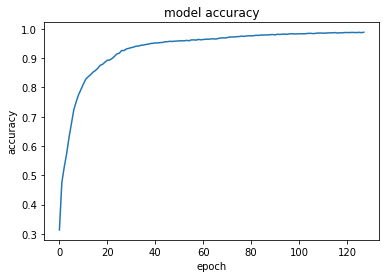

In [87]:
# melihat plot akurasi pada epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

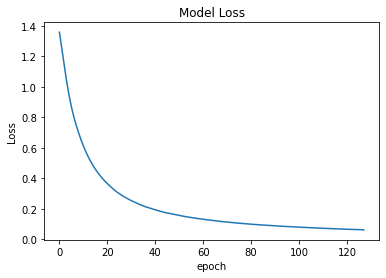

In [88]:
# melihat plot loss pada epoch
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

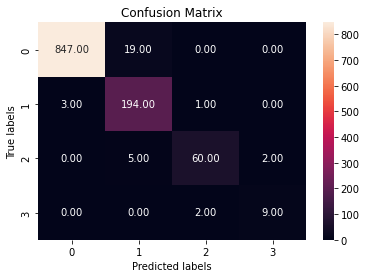

In [89]:
# melihat hasil tabel kebenaran confussion matrix

ax= plt.subplot()
y_predht = model.predict(normed_test_data)

y_predht = y_predht.argmax(axis = 1)
# y_predht = (y_predht > 0.5)

cm = confusion_matrix(y_test, y_predht)

sns.heatmap(cm, annot=True, fmt='.2f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [90]:
# hasil pengujian menggunakan data test setelah menggunakan parameter terbaik
print(classification_report(y_test,y_predht))

print('Accuracy : {:.4f}'.format(accuracy_score(y_test, y_predht)))
print('Precision : {:.4f}'.format(precision_score(y_test, y_predht, average='weighted')))
print('Recall : {:.4f}'.format(recall_score(y_test, y_predht, average='weighted')))
print('F1-score : {:.4f}'.format(f1_score(y_test, y_predht, average='weighted')))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       866
           1       0.89      0.98      0.93       198
           2       0.95      0.90      0.92        67
           3       0.82      0.82      0.82        11

    accuracy                           0.97      1142
   macro avg       0.91      0.92      0.92      1142
weighted avg       0.97      0.97      0.97      1142

Accuracy : 0.9720
Precision : 0.9737
Recall : 0.9720
F1-score : 0.9723


In [91]:
X_test

waktu  hari  jlh_motor  jlh_mobil  jlh_truck  headway    gap  speed>85  \
2808      0     0        873        853        136     0.81   3.94     44.50   
2377      2     5        597        922         97     0.43   1.56     53.75   
796       2     6        525       1066         81     0.14   1.40     42.50   
3414      2     1       1048        270        362     0.56   1.80    108.75   
2356      2     0        611        915         53     0.13   1.98     41.25   
...     ...   ...        ...        ...        ...      ...    ...       ...   
1110      0     4        327        154         29     0.44   7.76     54.25   
3771      1     4        169         60         78     3.96  10.66     79.25   
2373      2     5        697        197         16     0.75   1.68     37.50   
1642      2     4        921        797        181     0.03   2.31     36.75   
1571      1     1        385        867        563     5.24   8.11     31.00   

      avgSpeed  lebar_jln  pjg_antrian  
2808     22.25        7.2          260  
2377     32.19       14.0          320  
796      19.81       21.0          510  
3414     92.50        9.5          100  
2356     26.62       14.0          330  
...        ...        ...          ...  
1110     21.25       21.0          470  
3771     58.62        6.0           15  
2373     31.00       14.0          320  
1642     16.56       12.5          410  
1571     15.75       21.0          420  

[1142 rows x 11 columns]

In [92]:
y_predht

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
test_dataset_akhir['kemacetan'] = y_predht
test_dataset_akhir

nama_jalan  Latitude  Longtitude        lajur  waktu    hari  \
2808     SP. GEDE BAGE -6.937128  107.692583  LURUS KANAN   PAGI   SENIN   
2377  SP. ISTANA PLAZA -6.906442  107.597545   Lurus kiri   SORE   SABTU   
796      SP. BUAH BATU -6.947987  107.633434  LURUS KANAN   SORE  MINGGU   
3414      SP. CIBEREUM -6.917224  107.574382   BELOK KIRI   SORE  SELASA   
2356  SP. PASIR KALIKI -6.900525  107.597353  LURUS KANAN   SORE   SENIN   
...                ...       ...         ...          ...    ...     ...   
1110     SP. BUAH BATU -6.947987  107.633434  Lurus kanan   PAGI   JUMAT   
3771  SP. UJUNG BERUNG -6.914068  107.699412   BELOK KIRI  SIANG   JUMAT   
2373  SP. ISTANA PLAZA -6.906442  107.597545   BELOK KIRI   SORE   SABTU   
1642        SP. M TOHA -6.948332  107.609386  LURUS KANAN   SORE   JUMAT   
1571        SP. SAMSAT -6.945438  107.641889  BELOK KANAN  SIANG  SELASA   

               tanggal  jlh_motor  jlh_mobil  jlh_truck  jumlah  headway  \
2808  18-04-2022 07:00        873        853        136    1862     0.81   
2377  23-04-2022 16:00        597        922         97    1616     0.43   
796   17-04-2022 16:00        525       1066         81    1672     0.14   
3414  05-04-2022 16:00       1048        270        362    1680     0.56   
2356  25-04-2022 16:00        611        915         53    1579     0.13   
...                ...        ...        ...        ...     ...      ...   
1110  22-04-2022 07:00        327        154         29     510     0.44   
3771  29-04-2022 12:00        169         60         78     307     3.96   
2373  02-04-2022 16:00        697        197         16     910     0.75   
1642  08-04-2022 16:00        921        797        181    1899     0.03   
1571  12-04-2022 12:00        385        867        563    1815     5.24   

        gap  speed>85  avgSpeed  occupancy  lebar_jln  pjg_antrian  kemacetan  
2808   3.94     44.50     22.25      36.16        7.2          260          0  
2377   1.56     53.75     32.19      42.73       14.0          320          0  
796    1.40     42.50     19.81      61.15       21.0          510          1  
3414   1.80    108.75     92.50      19.98        9.5          100          0  
2356   1.98     41.25     26.62      42.89       14.0          330          0  
...     ...       ...       ...        ...        ...          ...        ...  
1110   7.76     54.25     21.25      57.45       21.0          470          0  
3771  10.66     79.25     58.62       2.65        6.0           15          0  
2373   1.68     37.50     31.00      42.77       14.0          320          0  
1642   2.31     36.75     16.56      51.41       12.5          410          0  
1571   8.11     31.00     15.75      52.42       21.0          420          0  

[1142 rows x 19 columns]

In [94]:
# test_dataset_akhir.to_csv('ANN baru.csv', index=False)